This notebook has been used to analyze pre-processed neuroimaging data in the article "Obesity accelerates brain ageing: a multimodal imaging study". In particular, Grey Matter (GM) measures and White Matter (WM) measures, have been used to predict age and the obesity status following a machine learning approach.

In [1]:
import matplotlib.pyplot as plt  # plotting library
import numpy as np  # this module is useful to work with numerical arrays
import pandas as pd  # this module is useful to work with tabular data
import scipy  #thid module is useful to work with mathematical and statistical computations
from scipy import stats
import seaborn as sns  # plotting library
import sklearn  #this module allows to leverage models and techniques from the machine learning framework
from sklearn.model_selection import GridSearchCV, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.linear_model import ElasticNetCV
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn import metrics
import plotly.express as px  #plotting library
import plotly.graph_objects as go
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


# BRAIN RELATED DATA

In [2]:
brain_values = pd.ExcelFile('/content/drive/MyDrive/SC/CCO/WM_values.xlsx')
wm = pd.read_excel(brain_values, header=[0, 1])
gm = pd.read_excel(brain_values, 'GM_Pure')
glob_meas = pd.read_excel(brain_values, 'Global_Measures')

In [3]:
wm

Subjects Fractional Anysotropy (FA)                                    \
     Subjects                   Body_CC     Fornix   Genu_CC L_Ant_Cor_Rad   
0    CC110045                   0.814325  0.637251  0.835634      0.595523   
1    CC110069                   0.790589  0.623583  0.795406      0.541869   
2    CC110101                   0.825606  0.518415  0.836832      0.572077   
3    CC110187                   0.802544  0.546115  0.832048      0.553619   
4    CC110319                   0.827607  0.620511  0.846815      0.608742   
..        ...                        ...       ...       ...           ...   
530  CC722542                   0.718321  0.288346  0.740697      0.447570   
531  CC722651                   0.757914  0.278458  0.755473      0.496135   
532  CC722891                   0.766340  0.181183  0.762226      0.458749   
533  CC723197                   0.726466  0.287153  0.715600      0.403615   
534  CC723395                   0.802903  0.465190  0.811268      0.534051   

                                                                      ...  \
    L_Ant_Limb_Inter_Cap L_Cereb_Ped L_Cing_Hipp    L_Cing     L_CST  ...   
0               0.651053    0.809512    0.650254  0.705529  0.727232  ...   
1               0.652176    0.834385    0.590712  0.713626  0.681640  ...   
2               0.640604    0.796912    0.587068  0.721470  0.687734  ...   
3               0.690804    0.843346    0.564802  0.706909  0.713817  ...   
4               0.681399    0.829788    0.629604  0.755576  0.797379  ...   
..                   ...         ...         ...       ...       ...  ...   
530             0.612258    0.720094    0.514259  0.653632  0.652662  ...   
531             0.663692    0.799258    0.575097  0.672443  0.759497  ...   
532             0.629829    0.808772    0.569585  0.677044  0.706099  ...   
533             0.575925    0.761030    0.531030  0.650542  0.763233  ...   
534             0.650975    0.780948    0.552760  0.742935  0.678157  ...   

    Radial Diffusivity (RD)                                           \
            R_Post_Thal_Rad R_Retrol_Inter_Cap R_Sag_Strat    R_SFOF   
0                  0.000281           0.000261    0.000280  0.000299   
1                  0.000270           0.000239    0.000268  0.000312   
2                  0.000270           0.000261    0.000281  0.000291   
3                  0.000259           0.000255    0.000281  0.000318   
4                  0.000261           0.000249    0.000303  0.000286   
..                      ...                ...         ...       ...   
530                0.000416           0.000322    0.000370  0.000396   
531                0.000317           0.000284    0.000349  0.000368   
532                0.000338           0.000304    0.000369  0.000358   
533                0.000404           0.000379    0.000420  0.000432   
534                0.000309           0.000290    0.000327  0.000413   

                                                                              
        R_SLF R_Sup_Cereb_Ped R_Sup_Cor_Rad   R_Tapet R_Unc_Fasc Splenium_CC  
0    0.000311        0.000227      0.000296  0.000327   0.000380    0.000121  
1    0.000304        0.000231      0.000304  0.000303   0.000349    0.000137  
2    0.000311        0.000232      0.000300  0.000338   0.000317    0.000137  
3    0.000308        0.000201      0.000314  0.000281   0.000321    0.000130  
4    0.000302        0.000204      0.000290  0.000305   0.000333    0.000126  
..        ...             ...           ...       ...        ...         ...  
530  0.000407        0.000216      0.000448  0.000554   0.000444    0.000194  
531  0.000342        0.000199      0.000352  0.000402   0.000403    0.000166  
532  0.000319        0.000185      0.000316  0.000610   0.000442    0.000183  
533  0.000366        0.000194      0.000397  0.000735   0.000366    0.000197  
534  0.000305        0.000147      0.000342  0.000348   0.000388    0.000124  

[535 rows x 196 columns

In [4]:
gm

Subjects     Ang_Gyrus    Cent_Operc      Cing_Ant     Cing_Post  \
0    CC110045  11534.008250   8268.005914  10733.007677   9075.006491   
1    CC110069   8279.003948   7803.003721   8714.004155   9382.004474   
2    CC110101  12618.006017  10942.005218   9518.004539  11043.005266   
3    CC110187   9517.006807   6149.004398  10235.007321   9977.007136   
4    CC110319  10258.004891  10641.005074  11367.005420  13101.006247   
..        ...           ...           ...           ...           ...   
530  CC722542   6936.993798   5920.994706  10716.990418   7255.993513   
531  CC722651   6629.995258   5419.996123   9011.993554   6103.995634   
532  CC722891   5494.000655   4262.000508   9545.001138   7054.000841   
533  CC723197   7345.005254   6377.004561   7950.005686   6960.004978   
534  CC723395   5342.999363   5742.999315   8076.999037   8011.999045   

          Cuneus  Frontal_Pole  Front_Operc  Heschl_Gyrus     IFG_Oper  ...  \
0    4434.003171  52137.037291  4035.002886   2440.001745  5966.004267  ...   
1    3534.001685  57204.027277  2831.001350   2691.001283  4351.002075  ...   
2    4394.002095  57135.027244  3451.001646   3146.001500  4831.002304  ...   
3    5904.004223  58015.041496  3546.002536   1986.001420  4868.003482  ...   
4    5161.002461  69014.032908  3623.001728   4011.001913  5582.002662  ...   
..           ...           ...          ...           ...          ...  ...   
530  3151.997182  42334.962150  2471.997790   1554.998610  2801.997495  ...   
531  2301.998353  37997.972822  2108.998492   1683.998796  2958.997884  ...   
532  2700.000322  34399.004101  2076.000247   1024.000122  3195.000381  ...   
533  2700.001931  37346.026712  1998.001429   1196.000855  3246.002322  ...   
534  2094.999750  39288.995316  1916.999771   1283.999847  3129.999627  ...   

              SPL      STA_Ant     STS_Post  Subcallosal  Sup_Front_Gyrus  \
0     9679.006923  2423.001733  8098.005792  5111.003656     22453.016060   
1     7047.003360  2841.001355  7908.003771  4263.002033     17222.008212   
2     7501.003577  2385.001137  9365.004466  4039.001926     17526.008357   
3    10330.007389  1887.001350  7282.005208  4647.003324     20415.014602   
4    11005.005248  2747.001310  9632.004593  5840.002785     24957.011900   
..            ...          ...          ...          ...              ...   
530   8011.992837  1912.998290  4947.995576  4747.995755     13609.987832   
531   6627.995259  1688.998792  4380.996866  3443.997537     12892.990778   
532   6195.000739  1432.000171  3424.000408  3896.000464     12184.001452   
533   5467.003910  1556.001113  5165.003694  3278.002345     15990.011437   
534   7651.999088  1646.999804  4241.999494  3464.999587     11356.998646   

       Supracalc     Temp_Pole      TFC_Ant     TFC_Post          TOF  
0    1131.000809  16052.011481  2432.001740  7244.005181  7694.005503  
1    1185.000565  17918.008544  2470.001178  6828.003256  7587.003618  
2    1456.000694  16986.008100  1807.000862  7414.003535  6680.003185  
3    1246.000891  19795.014158  2814.002013  6875.004917  5369.003840  
4    1351.000644  18663.008899  2839.001354  8696.004147  6049.002884  
..           ...           ...          ...          ...          ...  
530   591.999471  15501.986140  2078.998141  5639.994957  5117.995424  
531   549.999607  14031.989964  1787.998721  4687.996647  3918.997197  
532   587.000070  11202.001335  1425.000170  4176.000498  4843.000577  
533   809.000579  14199.010156  1589.001137  5030.003598  4405.003151  
534   423.999949  11920.998579  1361.999838  4994.999405  4691.999441  

[535 rows x 49 columns]

In [5]:
glob_meas

Subjects    Tot_Brain       CSF    Unnamed: 3      Gray    Unnamed: 5  \
0    CC110045  1624748.125  0.740164  471354.34375  0.748789  9.448517e+05   
1    CC110069  1623859.750  0.747043  557124.25000  0.714856  9.097974e+05   
2    CC110101  1810440.750  0.718994  509974.25000  0.704939  1.041026e+06   
3    CC110187  1528032.125  0.709024  435071.31250  0.742676  9.102016e+05   
4    CC110319  1815117.750  0.738380  527219.25000  0.749730  1.050794e+06   
..        ...          ...       ...           ...       ...           ...   
530  CC722542  1706577.375  0.791380  671252.43750  0.688105  8.516582e+05   
531  CC722651  1572468.875  0.798651  657687.56250  0.674530  7.704074e+05   
532  CC722891  1607608.250  0.785513  652404.12500  0.641553  7.854191e+05   
533  CC723197  1636085.125  0.768728  624695.43750  0.677153  8.533846e+05   
534  CC723395  1550659.875  0.783495  595213.93750  0.662664  7.634729e+05   

        White   Unnamed: 7     CSF_Corr    Gray_Corr   White_Corr  
0    0.805832  705326.5000  348879.5165  707494.5502  568374.6641  
1    0.820771  678983.3750  416195.7711  650374.1123  557289.8637  
2    0.794156  893920.3750  366668.4259  733860.1799  709912.2293  
3    0.821005  662079.5000  308476.0023  675984.9020  543570.5799  
4    0.827891  770655.3750  389288.1498  787811.4108  638018.6491  
..        ...          ...          ...          ...          ...  
530  0.812365  725451.3125  531215.7540  586030.3001  589331.2555  
531  0.808975  652112.5625  525262.8295  519662.9288  527542.7602  
532  0.821886  719380.0625  512471.9214  503887.9558  591248.4020  
533  0.797230  725000.5625  480220.8743  577871.9590  577992.1984  
534  0.810029  714031.9375  466347.1440  505926.0307  578386.5763  

[535 rows x 11 columns]

In [6]:
tot_brain = glob_meas.Tot_Brain
tot_brain

0      1624748.125
1      1623859.750
2      1810440.750
3      1528032.125
4      1815117.750
          ...     
530    1706577.375
531    1572468.875
532    1607608.250
533    1636085.125
534    1550659.875
Name: Tot_Brain, Length: 535, dtype: float64

##Measures of WM

### Data used

In [7]:
data_types = ['Fractional Anysotropy (FA)', 'Mean Diffusivity (MD)', 'Axial Diffusivity (L1)',
              'Radial Diffusivity (RD)']
wm_type = data_types[0]
wm[wm_type]

Body_CC     Fornix   Genu_CC  L_Ant_Cor_Rad  L_Ant_Limb_Inter_Cap  \
0    0.814325  0.637251  0.835634       0.595523              0.651053   
1    0.790589  0.623583  0.795406       0.541869              0.652176   
2    0.825606  0.518415  0.836832       0.572077              0.640604   
3    0.802544  0.546115  0.832048       0.553619              0.690804   
4    0.827607  0.620511  0.846815       0.608742              0.681399   
..        ...       ...       ...            ...                   ...   
530  0.718321  0.288346  0.740697       0.447570              0.612258   
531  0.757914  0.278458  0.755473       0.496135              0.663692   
532  0.766340  0.181183  0.762226       0.458749              0.629829   
533  0.726466  0.287153  0.715600       0.403615              0.575925   
534  0.802903  0.465190  0.811268       0.534051              0.650975   

     L_Cereb_Ped  L_Cing_Hipp    L_Cing     L_CST  L_Ext_Cap  ...  \
0       0.809512     0.650254  0.705529  0.727232   0.509496  ...   
1       0.834385     0.590712  0.713626  0.681640   0.537587  ...   
2       0.796912     0.587068  0.721470  0.687734   0.522364  ...   
3       0.843346     0.564802  0.706909  0.713817   0.568547  ...   
4       0.829788     0.629604  0.755576  0.797379   0.522422  ...   
..           ...          ...       ...       ...        ...  ...   
530     0.720094     0.514259  0.653632  0.652662   0.473072  ...   
531     0.799258     0.575097  0.672443  0.759497   0.494968  ...   
532     0.808772     0.569585  0.677044  0.706099   0.491257  ...   
533     0.761030     0.531030  0.650542  0.763233   0.484108  ...   
534     0.780948     0.552760  0.742935  0.678157   0.504551  ...   

     R_Retrol_Inter_Cap  R_Sag_Strat    R_SFOF     R_SLF  R_Sup_Cereb_Ped  \
0              0.685546     0.671573  0.574164  0.601784         0.734931   
1              0.726512     0.698504  0.568906  0.619200         0.742266   
2              0.685873     0.679480  0.578421  0.605158         0.722013   
3              0.692628     0.663883  0.570451  0.604128         0.769561   
4              0.701167     0.649057  0.619917  0.615675         0.750472   
..                  ...          ...       ...       ...              ...   
530            0.627883     0.581721  0.492354  0.516825         0.738032   
531            0.676944     0.612193  0.513711  0.585360         0.785865   
532            0.663833     0.616930  0.557981  0.615323         0.797622   
533            0.601333     0.578612  0.489186  0.584216         0.794497   
534            0.674598     0.654351  0.497263  0.627916         0.847231   

     R_Sup_Cor_Rad   R_Tapet  R_Unc_Fasc  Splenium_CC  Splenium_CC.1  
0         0.602587  0.673611    0.564048     0.875898            NaN  
1         0.569911  0.680808    0.594092     0.864956            NaN  
2         0.592789  0.639964    0.635357     0.857631            NaN  
3         0.567197  0.720531    0.637246     0.869043            NaN  
4         0.603624  0.694742    0.617324     0.868982            NaN  
..             ...       ...         ...          ...            ...  
530       0.454040  0.486848    0.480121     0.806981            NaN  
531       0.583914  0.643419    0.529639     0.842114            NaN  
532       0.626589  0.440394    0.519358     0.828918            NaN  
533       0.553051  0.493394    0.610413     0.814529            NaN  
534       0.551077  0.693902    0.604800     0.879137            NaN  

[535 rows x 49 columns]

Let's create an array for each specific WM measure containing values for all brain regions of the whole sample. N.B. the last values has to been removed.

In [8]:
if wm_type == data_types[3]:
    wm_values = np.array([wm[wm_type].iloc[s].values for s in range(wm[wm_type].shape[0])])
else:
    wm_values = np.array([wm[wm_type].iloc[s].values[0:-1] for s in range(wm[wm_type].shape[0])])
print('The white matter measure that is gonna be used is: ' + wm_type)
print(wm_values.shape)

The white matter measure that is gonna be used is: Fractional Anysotropy (FA)
(535, 48)


##Measure of GM

Let's create an array containing all the GM volumes for all brain regions of the whole sample standardized.

In [9]:
gm.iloc[0].values

array(['CC110045', 11534.00825, 8268.005914, 10733.007677, 9075.006491,
       4434.003171, 52137.037291, 4035.002886, 2440.001745, 5966.004267,
       5466.00391, 11048.007902, 3315.002371, 2973.002126, 7184.005138,
       5340.003819, 14981.010715, 33446.023922, 9556.006835, 4332.003098,
       17504.01252, 3223.002305, 10653.00762, 9209.006587, 7768.005556,
       13877.009926, 11999.008582, 13149.009405, 5145.00368, 2986.002136,
       3931.002812, 3102.002219, 3100.002217, 22561.016137, 28501.020386,
       22052.015773, 6218.004447, 5754.004116, 8916.006377, 9679.006923,
       2423.001733, 8098.005792, 5111.003656, 22453.01606, 1131.000809,
       16052.011481, 2432.00174, 7244.005181, 7694.005503], dtype=object)

In [10]:
gm_values = np.array([gm.iloc[s].values[1:] / tot_brain[s] for s in
                      range(gm.shape[0])])  #the 1st value is taken out because it's the subject's ID
print(gm_values.shape)

(535, 48)


# OTHER DATA

Other variables are stored in the next dataframe:

In [11]:
data = pd.read_excel('drive/MyDrive/SC/CCO/For_Marco.xlsx')
data

ID    Age  Handedness  Education  Sex  BP_Systolic  BP_Diastolic  \
0    CC110045  24.50         100          4    1         90.5          63.5   
1    CC110069  28.67         -58          4    1         94.5          61.5   
2    CC110101  23.33          63          4    0        108.5          63.0   
3    CC110187  25.25        -100          4    1        116.0          71.5   
4    CC110319  28.42         100          4    1        104.0          50.5   
..        ...    ...         ...        ...  ...          ...           ...   
530  CC722542  79.33         100          4    0        149.5          72.0   
531  CC722651  79.83         100          1    1        122.5          63.5   
532  CC722891  84.42          89          0    1        136.5          73.0   
533  CC723197  80.08         100          4    1        186.0          94.0   
534  CC723395  86.08          90          3    1        102.0          50.5   

     Heart_Rate    BMI  MMSE  Group  Unnamed: 11 Unnamed: 12  \
0          61.5  21.66    30      1          NaN         Sex   
1          62.0  22.09    28      1          NaN       Group   
2          78.5  20.39    30      1          NaN         NaN   
3          79.0  21.52    30      1          NaN         NaN   
4          48.5  24.23    30      1          NaN         NaN   
..          ...    ...   ...    ...          ...         ...   
530        51.0  30.96    30      3          NaN         NaN   
531        60.5  22.46    28      1          NaN         NaN   
532        76.0  26.11    26      2          NaN         NaN   
533        64.0  22.72    29      1          NaN         NaN   
534        68.0  30.85    28      3          NaN         NaN   

          Unnamed: 13 Unnamed: 14            Unnamed: 15  Unnamed: 16  \
0              0=Male    1=Female                    NaN          NaN   
1    1= Normal weight         NaN  2=Slightly overweight          NaN   
2                 NaN         NaN                    NaN          NaN   
3                 NaN         NaN                    NaN          NaN   
4                 NaN         NaN                    NaN          NaN   
..                ...         ...                    ...          ...   
530               NaN         NaN                    NaN          NaN   
531               NaN         NaN                    NaN          NaN   
532               NaN         NaN                    NaN          NaN   
533               NaN         NaN                    NaN          NaN   
534               NaN         NaN                    NaN          NaN   

    Unnamed: 17  
0           NaN  
1       3=Obese  
2           NaN  
3           NaN  
4           NaN  
..          ...  
530         NaN  
531         NaN  
532         NaN  
533         NaN  
534         NaN  

[535 rows x 18 columns]

The sample will be split in 3 groups:


1.   Normal weight
2.   Sligtly overweight
3.   Obese

Only the first and the last ones will be taken into account within this study.



In [12]:
norm_weight_ss = data[data['Group'] == 1]
slight_overweight_ss = data[data['Group'] == 2]
obese_ss = data[data['Group'] == 3]

print('there are', len(norm_weight_ss), 'normal weight subjects ')
print('there are', len(slight_overweight_ss), 'slight overweight subjects ')
print('there are', len(obese_ss), 'obese subjects ')

there are 261 normal weight subjects 
there are 183 slight overweight subjects 
there are 91 obese subjects 


In [13]:
print('NW min BMI', norm_weight_ss.BMI.min())
print('NW max BMI', norm_weight_ss.BMI.max())
print('OB min BMI', obese_ss.BMI.min())
print('OB max BMI', obese_ss.BMI.max())

NW min BMI 18.55
NW max BMI 24.98
OB min BMI 30.01
OB max BMI 48.32


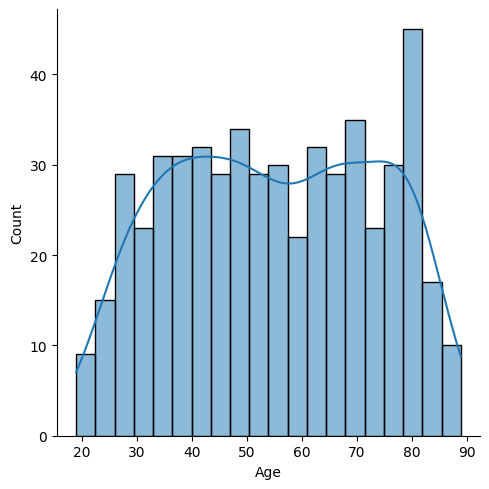

In [14]:
sns.displot(data=data, x='Age', bins=20, kde=True)

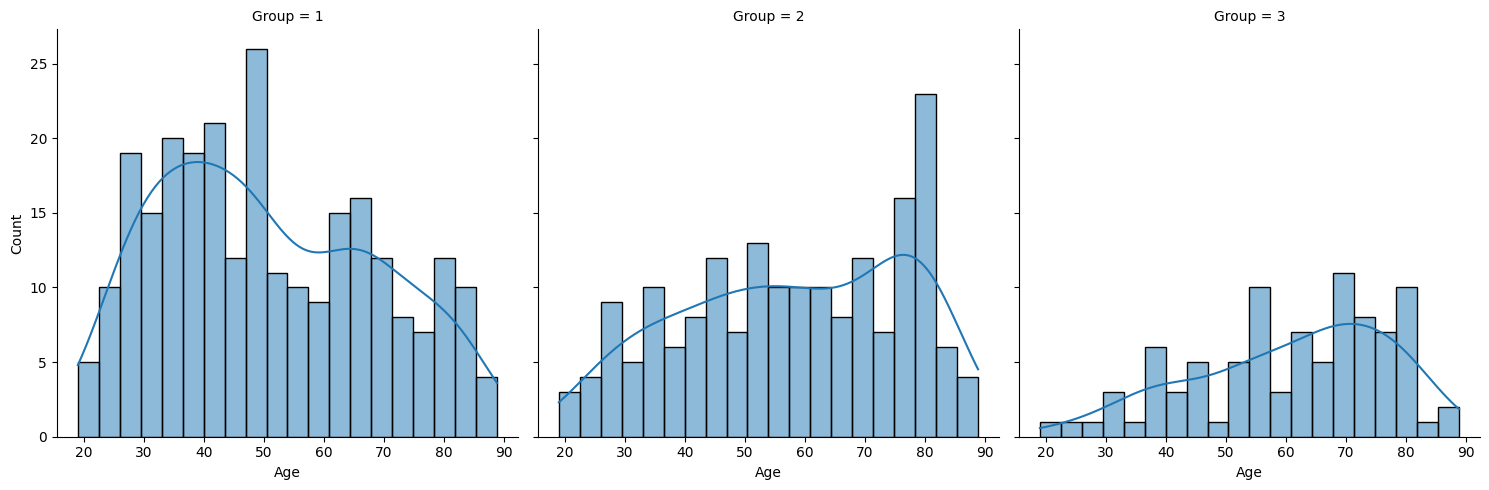

In [15]:
sns.displot(data=data, x='Age', col='Group', bins=20, kde=True)

In [16]:
print('###### NORM WEIGHT ######')
print('\n#### AGE #####')
print(norm_weight_ss.Age.mean())
print(norm_weight_ss.Age.std())

print('\n#### EDUCATION #####')
print(norm_weight_ss.Education.mean())
print(norm_weight_ss.Education.std())
print('\n#### MMSE #####')
print(norm_weight_ss.MMSE.mean())
print(norm_weight_ss.MMSE.std())
print('\n#### GENDER #####\n')
print(norm_weight_ss.Sex.mean())
print(norm_weight_ss.Sex.std())
print(norm_weight_ss.Sex.sum())
print('\n')
print('\n###### OBESE ######')
print('\n#### AGE #####')
print(obese_ss.Age.mean())
print(obese_ss.Age.std())
print('\n#### EDUCATION #####')
print(obese_ss.Education.mean())
print(obese_ss.Education.std())
print('\n#### MMSE #####')
print(obese_ss.MMSE.mean())
print(obese_ss.MMSE.std())
print('\n#### GENDER #####\n')
print(obese_ss.Sex.mean())
print(obese_ss.Sex.std())
print(obese_ss.Sex.sum())

print('\n#####################')
print(stats.ttest_ind(norm_weight_ss.Age, obese_ss.Age))
print(stats.ttest_ind(norm_weight_ss.Education, obese_ss.Education))
print(stats.ttest_ind(norm_weight_ss.MMSE, obese_ss.MMSE))

###### NORM WEIGHT ######

#### AGE #####
50.58030651340996
18.019438305029517

#### EDUCATION #####
3.5134099616858236
0.9946067354528006

#### MMSE #####
29.011494252873565
1.2724378740182474

#### GENDER #####

0.5210727969348659
0.5005155020148199
136



###### OBESE ######

#### AGE #####
60.94241758241758
16.113082768749635

#### EDUCATION #####
2.8241758241758244
1.442169712569737

#### MMSE #####
28.373626373626372
1.4579159528309327

#### GENDER #####

0.5824175824175825
0.4958927766258002
53

#####################
TtestResult(statistic=-4.8502589277338615, pvalue=1.8587174495148842e-06, df=350.0)
TtestResult(statistic=5.024447824134182, pvalue=8.067896531728956e-07, df=350.0)
TtestResult(statistic=3.9615545668603778, pvalue=9.02524197613552e-05, df=350.0)


# OBESE-MATCHED SPLIT

In this section the obese group (O) and a control sample of norm-weight (NWc) subjects matched by age, gender and education with O will be used as test groups. The remaining norm-weighted subjects and the entire set of slight overweigt individuals (SOW) will be used for training the model. Therefore, in this section an out-of-sample prediction is conducted.

In [17]:
#MATCH AGE GENDER & EDUCATION
if True:  #False True
    obese_ss = data[data.Group == 3]
    ob_indexes = []
    match_indexes = []
    norm_sample = norm_weight_ss
    ob_excluded = []
    for i in range(obese_ss.shape[0]):
        norm_match = (np.abs(norm_sample[(norm_sample.Sex == obese_ss.iloc[i]['Sex'])
                                         & (np.abs(norm_sample.Education - obese_ss.iloc[i]['Education']) <= 1)].Age -
                             obese_ss.iloc[i]['Age']).sort_values())
        if np.abs(norm_match.iloc[0]) <= 5:
            match_ind = norm_match.index[0]
            ob_indexes.append(i)
            match_indexes.append(match_ind)
            norm_sample = norm_sample.drop(match_ind)
        else:
            ob_excluded.append(i)
    norm_test = norm_weight_ss.loc[match_indexes]
    obese_ss_df = obese_ss
    obese_ss = obese_ss.iloc[ob_indexes]
    excluded_obese = obese_ss.iloc[ob_excluded]
    ob_age = obese_ss.Age

In [18]:
excluded_obese

ID    Age  Handedness  Education  Sex  BP_Systolic  BP_Diastolic  \
62   CC220198  37.42         100          4    1        116.5          81.5   
179  CC320621  46.08         100          4    1        118.0          72.5   
243  CC420061  57.17         100          4    0        157.0          99.5   
255  CC420162  52.00         100          3    1        111.5          82.0   
268  CC420231  54.67          68          4    0        140.0          94.0   
303  CC510258  59.58         100          4    0        102.0          61.0   
443  CC620549  73.67         100          4    1        115.0          67.0   
445  CC620560  72.50          88          4    0        129.0          76.0   

     Heart_Rate    BMI  MMSE  Group  Unnamed: 11 Unnamed: 12 Unnamed: 13  \
62         59.0  31.82    26      3          NaN         NaN         NaN   
179        54.0  34.44    28      3          NaN         NaN         NaN   
243        78.0  32.28    26      3          NaN         NaN         NaN   
255        69.5  30.65    28      3          NaN         NaN         NaN   
268        77.5  34.60    29      3          NaN         NaN         NaN   
303        60.0  38.34    30      3          NaN         NaN         NaN   
443        61.0  31.43    29      3          NaN         NaN         NaN   
445        70.5  30.72    28      3          NaN         NaN         NaN   

    Unnamed: 14 Unnamed: 15  Unnamed: 16 Unnamed: 17  
62          NaN         NaN          NaN         NaN  
179         NaN         NaN          NaN         NaN  
243         NaN         NaN          NaN         NaN  
255         NaN         NaN          NaN         NaN  
268         NaN         NaN          NaN         NaN  
303         NaN         NaN          NaN         NaN  
443         NaN         NaN          NaN         NaN  
445         NaN         NaN          NaN         NaN

In [19]:
print('NWc group has size:', norm_test.shape)
print('O group has size:', obese_ss.shape)

NWc group has size: (83, 18)
O group has size: (83, 18)


##Data distribution (NWc vs O)

Let's plot the distributions of the other variables in the O vs NWc sample.

In [20]:
n_bins = 10
bins_sample = pd.cut(data.Age, bins=n_bins, retbins=True)[1]
bins_sample

array([18.93008, 25.992  , 32.984  , 39.976  , 46.968  , 53.96   ,
       60.952  , 67.944  , 74.936  , 81.928  , 88.92   ])

(0.0, 21.0)

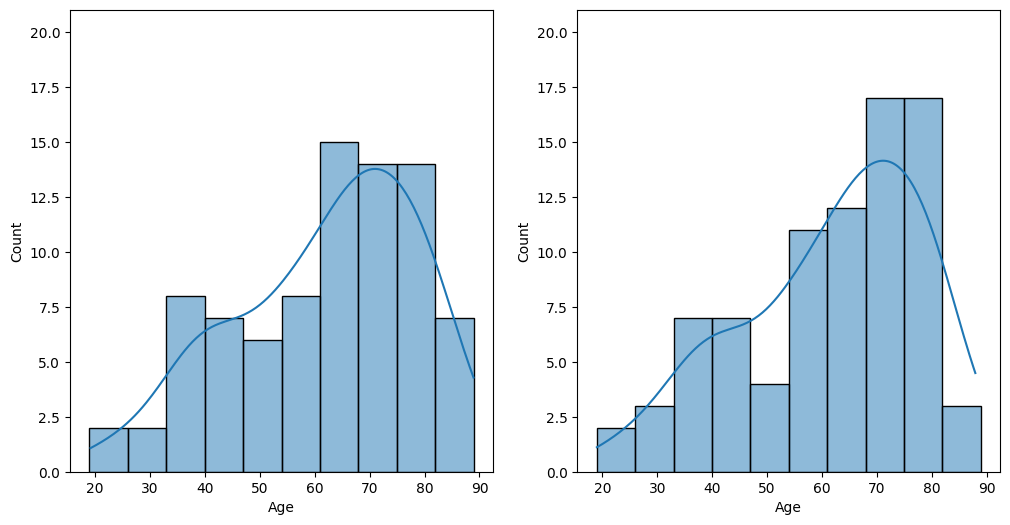

In [21]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 6))
sns.histplot(data=norm_test, x='Age', bins=bins_sample, kde=True, ax=axes[0])
sns.histplot(data=obese_ss, x='Age', bins=bins_sample, kde=True, ax=axes[1])
axes[0].set_ylim([0, 21])
axes[1].set_ylim([0, 21])

(0.0, 70.0)

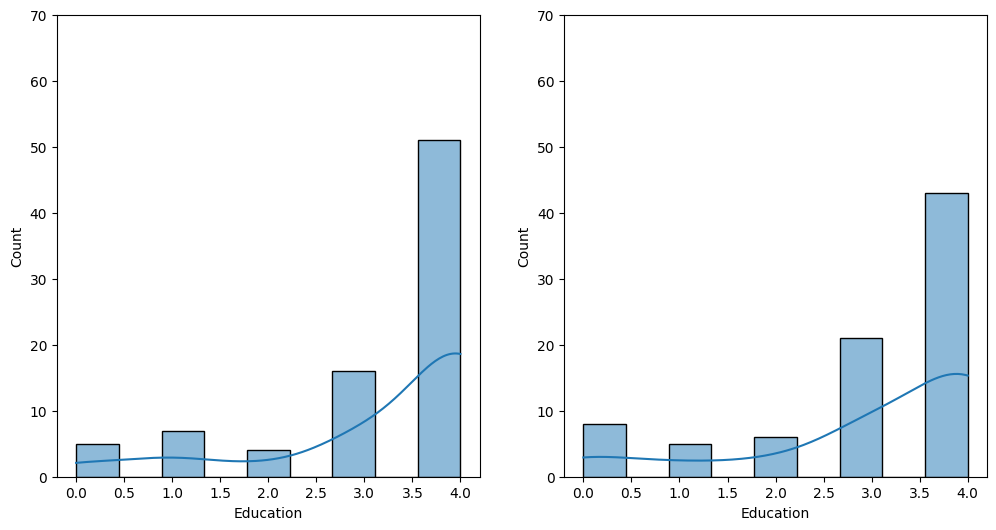

In [22]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 6))
sns.histplot(data=norm_test, x='Education', kde=True, ax=axes[0])
sns.histplot(data=obese_ss, x='Education', kde=True, ax=axes[1])
axes[0].set_ylim([0, 70])
axes[1].set_ylim([0, 70])

(0.0, 45.0)

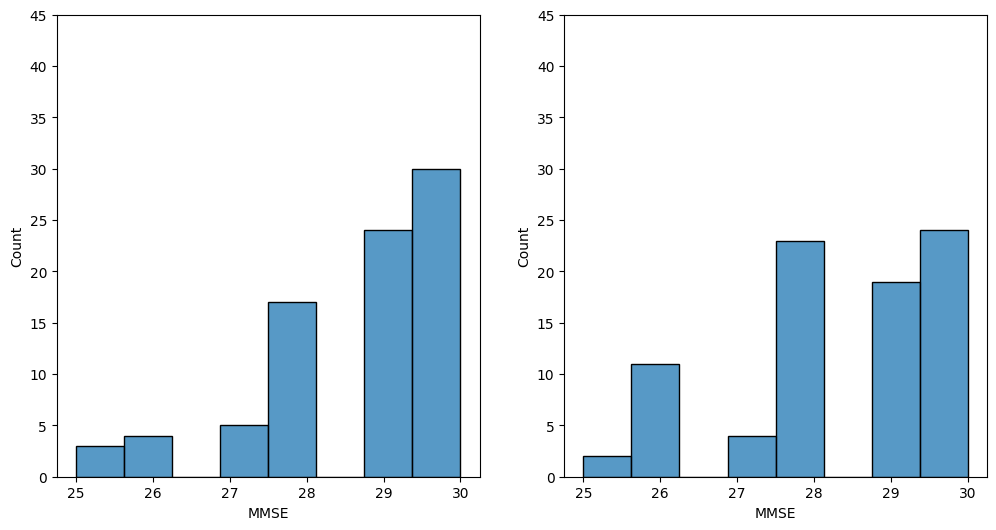

In [23]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 6))
sns.histplot(data=norm_test, x='MMSE', ax=axes[0])
sns.histplot(data=obese_ss, x='MMSE', ax=axes[1])
axes[0].set_ylim([0, 45])
axes[1].set_ylim([0, 45])

The two groups showed no significant differences in age, gender, and education, scores, as we anticipated, and also in MMSE score.

In [24]:
print('###### NORM WEIGHT ######')
print('\n#### AGE #####')
print('mean', norm_test.Age.mean())
print('std', norm_test.Age.std())

print('\n#### EDUCATION #####')
print('mean', norm_test.Education.mean())
print('std', norm_test.Education.std())
print('\n#### MMSE #####')
print('mean', norm_test.MMSE.mean())
print('std', norm_test.MMSE.std())
print('\n#### GENDER #####')
print('mean', norm_test.Sex.mean())
print('std', norm_test.Sex.std())
print(norm_test.Sex.sum())
print('\n')
print('\n###### OBESE ######')
print('#### AGE #####')
print('mean', obese_ss.Age.mean())
print('std', obese_ss.Age.std())
print('\n#### EDUCATION #####')
print('mean', obese_ss.Education.mean())
print('std', obese_ss.Education.std())
print('\n#### MMSE #####')
print('mean', obese_ss.MMSE.mean())
print('std', obese_ss.MMSE.std())
print('\n#### GENDER #####')
print('mean', obese_ss.Sex.mean())
print('std', obese_ss.Sex.std())
print(obese_ss.Sex.sum())
print('\n')
print('\n#########  P-VALUES   ############')
tt_age = stats.ttest_ind(norm_test.Age, obese_ss.Age)
tt_ed = stats.ttest_ind(norm_test.Education, obese_ss.Education)
tt_mmse = stats.ttest_ind(norm_test.MMSE, obese_ss.MMSE)
print('norm test-obese (age):', tt_age.pvalue)
print('norm test-obese (education)', tt_ed.pvalue)
print('norm test-obese (mmse)', tt_mmse.pvalue)
print('norm test-obese (gender)', stats.chi2_contingency(
    pd.crosstab(index=[np.concatenate([norm_test.Group.values, obese_ss.Group.values])],
                columns=[np.concatenate([norm_test.Sex.values, obese_ss.Sex.values])])).pvalue)

###### NORM WEIGHT ######

#### AGE #####
mean 61.930240963855425
std 16.385125540123845

#### EDUCATION #####
mean 3.216867469879518
std 1.2301912678085067

#### MMSE #####
mean 28.746987951807228
std 1.3329169689798888

#### GENDER #####
mean 0.5783132530120482
std 0.49683097993894615
48



###### OBESE ######
#### AGE #####
mean 61.66566265060241
std 16.25371283608697

#### EDUCATION #####
mean 3.036144578313253
std 1.3107974033010343

#### MMSE #####
mean 28.42168674698795
std 1.4238429785285809

#### GENDER #####
mean 0.5783132530120482
std 0.49683097993894615
48



#########  P-VALUES   ############
norm test-obese (age): 0.9169471865162
norm test-obese (education) 0.3610663258094693
norm test-obese (mmse) 0.13055873030279086
norm test-obese (gender) 1.0


### Data Organization


First, it is important to standardize the variables used.

In [25]:
norm_train = norm_weight_ss.drop(index=norm_test.index)
norm_train

ID    Age  Handedness  Education  Sex  BP_Systolic  BP_Diastolic  \
0    CC110045  24.50         100          4    1         90.5          63.5   
1    CC110069  28.67         -58          4    1         94.5          61.5   
2    CC110101  23.33          63          4    0        108.5          63.0   
4    CC110319  28.42         100          4    1        104.0          50.5   
5    CC110411  25.25         100          4    0         92.5          54.0   
..        ...    ...         ...        ...  ...          ...           ...   
507  CC721107  79.33         100          4    1        128.0          67.5   
516  CC721434  84.92         100          0    0        113.5          73.0   
524  CC721888  78.92          62          4    1        134.0          75.0   
529  CC722536  80.00         -56          4    1        134.0          59.0   
533  CC723197  80.08         100          4    1        186.0          94.0   

     Heart_Rate    BMI  MMSE  Group  Unnamed: 11 Unnamed: 12  \
0          61.5  21.66    30      1          NaN         Sex   
1          62.0  22.09    28      1          NaN       Group   
2          78.5  20.39    30      1          NaN         NaN   
4          48.5  24.23    30      1          NaN         NaN   
5          61.5  19.40    30      1          NaN         NaN   
..          ...    ...   ...    ...          ...         ...   
507        56.0  24.36    28      1          NaN         NaN   
516        98.5  21.17    25      1          NaN         NaN   
524        77.5  23.01    27      1          NaN         NaN   
529        68.0  20.48    30      1          NaN         NaN   
533        64.0  22.72    29      1          NaN         NaN   

          Unnamed: 13 Unnamed: 14            Unnamed: 15  Unnamed: 16  \
0              0=Male    1=Female                    NaN          NaN   
1    1= Normal weight         NaN  2=Slightly overweight          NaN   
2                 NaN         NaN                    NaN          NaN   
4                 NaN         NaN                    NaN          NaN   
5                 NaN         NaN                    NaN          NaN   
..                ...         ...                    ...          ...   
507               NaN         NaN                    NaN          NaN   
516               NaN         NaN                    NaN          NaN   
524               NaN         NaN                    NaN          NaN   
529               NaN         NaN                    NaN          NaN   
533               NaN         NaN                    NaN          NaN   

    Unnamed: 17  
0           NaN  
1       3=Obese  
2           NaN  
4           NaN  
5           NaN  
..          ...  
507         NaN  
516         NaN  
524         NaN  
529         NaN  
533         NaN  

[178 rows x 18 columns]

In [26]:
nw_sow_train_index = np.concatenate((norm_train.index, slight_overweight_ss.index))
#nw_sow_train_index = np.concatenate((norm_train.index, slight_overweight_ss.index, excluded_obese.index))
train_sample = wm_values[nw_sow_train_index]
x_test = (wm_values[norm_test.index] - np.mean(train_sample)) / np.std(train_sample)
x_train = (train_sample - np.mean(train_sample)) / np.std(train_sample)
print(x_train.shape)
print(x_test.shape)

gm_train_sample = gm_values[nw_sow_train_index]
x_gm_test = (gm_values[norm_test.index] - np.mean(gm_train_sample)) / np.std(gm_train_sample)
x_gm_train = (gm_train_sample - np.mean(gm_train_sample)) / np.std(gm_train_sample)
print(x_gm_train.shape)
print(x_gm_test.shape)

train_age = data.Age[nw_sow_train_index]
y_test = (data.Age[norm_test.index] - np.mean(train_age)) / np.std(train_age)
y_train = (train_age - np.mean(train_age)) / np.std(train_age)
print(y_train.shape)
print(y_test.shape)
norm_ob_age = (ob_age - np.mean(train_age)) / np.std(train_age)

(361, 48)
(83, 48)
(361, 48)
(83, 48)
(361,)
(83,)


In [27]:
train_set = data.iloc[nw_sow_train_index]

<Axes: xlabel='Age', ylabel='Count'>

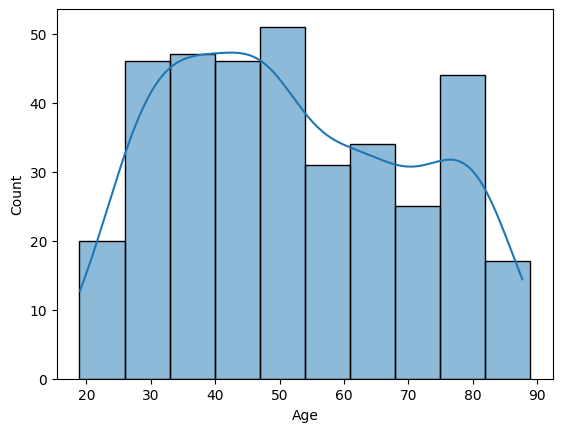

In [28]:
sns.histplot(data=train_set, x='Age', bins=bins_sample, kde=True)

<Axes: xlabel='Age', ylabel='Count'>

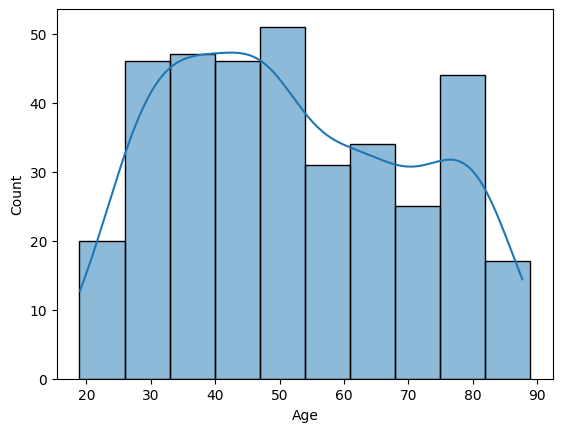

In [29]:
sns.histplot(data=data.iloc[nw_sow_train_index], x='Age', bins=bins_sample, kde=True)

##WM

ElasticNetCV from the scikit-learn library was employed to fit the model. This estimator integrates cross-validation to automatically identify the best α and λ from a specified list of values.

In [30]:
l1_ratio = [0.001, 0.25, 0.5, 0.75, 0.99]
alpha = np.logspace(-5, 5, 100)

In [31]:
n_folds = 10
nw_cat = pd.cut(y_train, bins=5, labels=range(5))
kf = StratifiedKFold(n_splits=n_folds, shuffle=True).split(x_train, nw_cat)

In [32]:
el_reg = ElasticNetCV(alphas=alpha, l1_ratio=l1_ratio, cv=kf, random_state=10)
el_reg.fit(x_train, y_train)

ElasticNetCV(alphas=array([1.00000000e-05, 1.26185688e-05, 1.59228279e-05, 2.00923300e-05,
       2.53536449e-05, 3.19926714e-05, 4.03701726e-05, 5.09413801e-05,
       6.42807312e-05, 8.11130831e-05, 1.02353102e-04, 1.29154967e-04,
       1.62975083e-04, 2.05651231e-04, 2.59502421e-04, 3.27454916e-04,
       4.13201240e-04, 5.21400829e-04, 6.57933225e-04, 8.30217568e-04,
       1.04761575e-03, 1.321941...
       1.20450354e+03, 1.51991108e+03, 1.91791026e+03, 2.42012826e+03,
       3.05385551e+03, 3.85352859e+03, 4.86260158e+03, 6.13590727e+03,
       7.74263683e+03, 9.77009957e+03, 1.23284674e+04, 1.55567614e+04,
       1.96304065e+04, 2.47707636e+04, 3.12571585e+04, 3.94420606e+04,
       4.97702356e+04, 6.28029144e+04, 7.92482898e+04, 1.00000000e+05]),
             cv=<generator object _BaseKFold.split at 0x7857167490e0>,
             l1_ratio=[0.001, 0.25, 0.5, 0.75, 0.99], random_state=10)

In [33]:
print('best alpha:', el_reg.alpha_)
print('best l1 ratio:', el_reg.l1_ratio_)

best alpha: 0.006734150657750821
best l1 ratio: 0.25


In [34]:
dataframes = []
comparisons = [[y_train, el_reg.predict(x_train)]]
print('score of the model computed on the train dataset:', el_reg.score(x_train, y_train))
comparisons.append([y_test, el_reg.predict(x_test)])
print('score of the model computed on the test dataset:', el_reg.score(x_test, y_test))
for comp in comparisons:
    comp[0] = comp[0] * np.std(train_age) + np.mean(train_age)
    comp[1] = comp[1] * np.std(train_age) + np.mean(train_age)
print('number of comparisons (true age vs prediction):', len(comparisons))
for comp, sample in zip(comparisons, ['train', 'test']):
    print('\nmean absolute error (in years) of the model predictions on the', sample, 'dataset',
          np.mean(np.abs(comp[0] - comp[1])))
    df = pd.DataFrame({sample + ' true age': comp[0], 'prediction': comp[1], 'error': np.abs(comp[1] - comp[0])})
    dataframes.append(df)
    print(df)

score of the model computed on the train dataset: 0.8196708000637856
score of the model computed on the test dataset: 0.679700063158071
number of comparisons (true age vs prediction): 2

mean absolute error (in years) of the model predictions on the train dataset 6.29533007811343
     train true age  prediction      error
0             24.50   23.603728   0.896272
1             28.67   34.875022   6.205022
2             23.33   31.040293   7.710293
4             28.42   26.464972   1.955028
5             25.25   33.476240   8.226240
..              ...         ...        ...
518           79.25   75.811664   3.438336
519           81.83   70.458568  11.371432
520           80.75   70.130139  10.619861
528           79.42   80.606459   1.186459
532           84.42   74.707155   9.712845

[361 rows x 3 columns]

mean absolute error (in years) of the model predictions on the test dataset 7.444098993592328
     test true age  prediction      error
10           19.17   29.915340  10.745340


In [35]:
train_df = dataframes[0]
train_df['error'] = train_df['prediction'] - train_df['train true age']
test_df = dataframes[1]
test_df['error'] = test_df['prediction'] - test_df['test true age']
print('MEAN ERROR (NW):', test_df['error'].mean())
print('STD ERROR (NW):', test_df['error'].std())

MEAN ERROR (NW): -4.229424772491023
STD ERROR (NW): 8.239265292086348


### OB

In [36]:
norm_ob_values = (wm_values[obese_ss.index] - np.mean(train_sample)) / np.std(train_sample)
print('O WM dataset has size', norm_ob_values.shape)
ob_predictions = (el_reg.predict(norm_ob_values) * np.std(train_age)) + train_age.mean()
error_ob = ob_predictions - ob_age
print('\nbrain age delta (O):\n')
print(error_ob)
print('\nMEAN ERROR (O): ', error_ob.mean())
print('STD ERROR (O): ', error_ob.std())
print('\n')
ob_score = el_reg.score(norm_ob_values, norm_ob_age)
print('R-squared (O):', ob_score)
abs_err_ob = np.abs(error_ob)
mae_ob = abs_err_ob.mean()
print('Mean Absolute Error (O):', mae_ob)

O WM dataset has size (83, 48)

brain age delta (O):

23     11.773992
37     22.827369
38      6.348023
62     -0.699968
66     11.758192
         ...    
515    -8.689520
523     2.204448
526    -6.310801
530    -4.861954
534    -9.506605
Name: Age, Length: 83, dtype: float64

MEAN ERROR (O):  -2.0351541595140983
STD ERROR (O):  9.967864119602385


R-squared (O): 0.6080345554924507
Mean Absolute Error (O): 7.678902996219492


In [37]:
err_nw_test = test_df['error']
tt_ob = stats.ttest_ind(error_ob, err_nw_test, equal_var=False)
print('norm test and obese:', tt_ob.pvalue)

norm test and obese: 0.12414777427670802


In [38]:
norm_ss_df = dataframes[0].rename(columns={'train true age': "true age", 'error': "absolute error"})
norm_ss_df['error'] = (norm_ss_df['prediction'] - norm_ss_df['true age']).values
norm_ss_df['group'] = np.repeat('TR', len(norm_ss_df))
norm_ss_df

true age  prediction  absolute error      error group
0       24.50   23.603728       -0.896272  -0.896272    TR
1       28.67   34.875022        6.205022   6.205022    TR
2       23.33   31.040293        7.710293   7.710293    TR
4       28.42   26.464972       -1.955028  -1.955028    TR
5       25.25   33.476240        8.226240   8.226240    TR
..        ...         ...             ...        ...   ...
518     79.25   75.811664       -3.438336  -3.438336    TR
519     81.83   70.458568      -11.371432 -11.371432    TR
520     80.75   70.130139      -10.619861 -10.619861    TR
528     79.42   80.606459        1.186459   1.186459    TR
532     84.42   74.707155       -9.712845  -9.712845    TR

[361 rows x 5 columns]

In [39]:
test_ss_df = test_df.rename(columns={'test true age': "true age"})
test_ss_df['group'] = np.repeat('NWc', len(test_df))
ob_df = pd.DataFrame({'true age': ob_age, 'prediction': ob_predictions,
                      'absolute error': np.abs(error_ob), 'error': error_ob,
                      'group': np.repeat('ob', len(ob_age))})
tot_ss_df = pd.concat([norm_ss_df, ob_df, test_ss_df], ignore_index=True)
tot_ss_df

true age  prediction  absolute error     error group
0       24.50   23.603728       -0.896272 -0.896272    TR
1       28.67   34.875022        6.205022  6.205022    TR
2       23.33   31.040293        7.710293  7.710293    TR
3       28.42   26.464972       -1.955028 -1.955028    TR
4       25.25   33.476240        8.226240  8.226240    TR
..        ...         ...             ...       ...   ...
522     79.50   79.076360             NaN -0.423640   NWc
523     83.75   84.435398             NaN  0.685398   NWc
524     84.08   90.203401             NaN  6.123401   NWc
525     82.58   74.981307             NaN -7.598693   NWc
526     86.67   76.967007             NaN -9.702993   NWc

[527 rows x 5 columns]

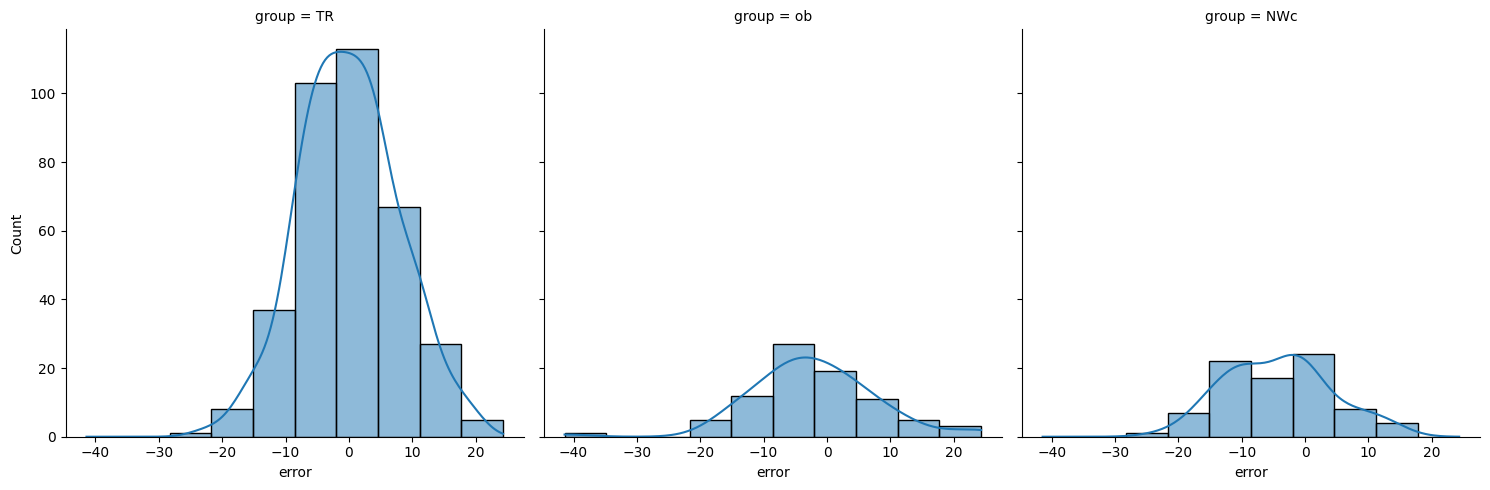

In [40]:
sns.displot(data=tot_ss_df, x='error', col='group', bins=10, kde=True)

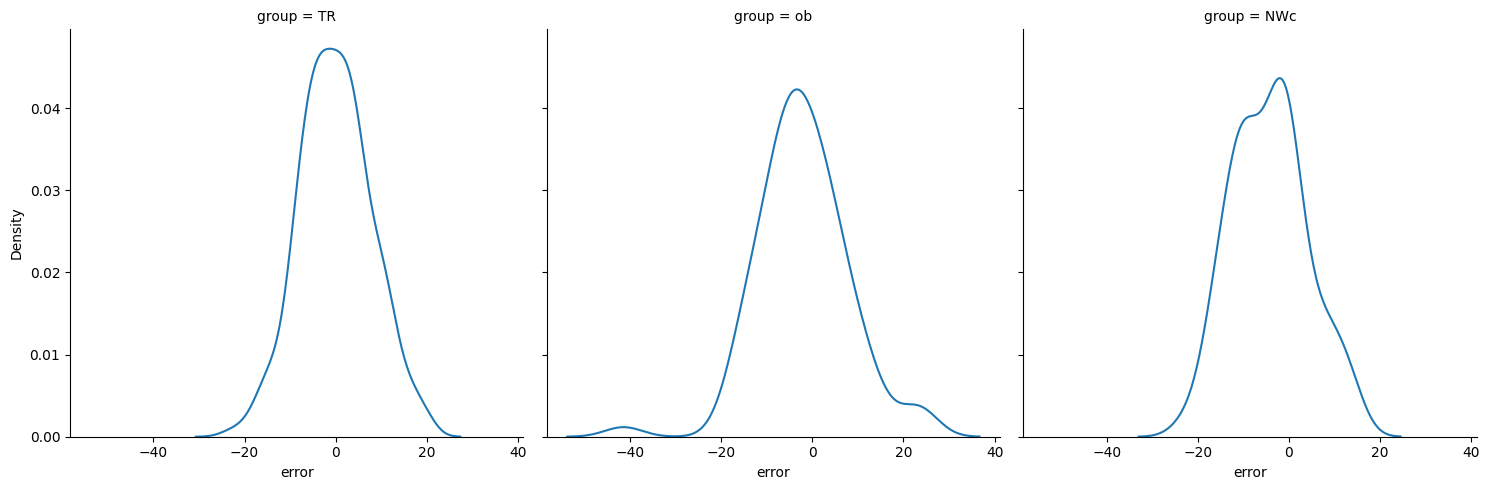

In [41]:
sns.displot(data=tot_ss_df, x='error', col='group', kind='kde', common_norm=False)

In [42]:
fig7 = px.scatter(tot_ss_df, x='true age', y='prediction', labels={'x': 'true age', 'y': 'prediction'}, height=600,
                  facet_col='group')
trace = go.Scatter(x=[18, 100], y=[18, 100], mode='lines', line_color='red', name='optimal prediction')
trace.update(showlegend=False)
fig7.add_trace(trace, row='all', col='all')
fig7.update_traces(selector=-1, showlegend=True)
fig7.show()

In [43]:
fig6 = px.scatter(tot_ss_df, x='true age', y='error', labels={'x': 'true age', 'y': 'prediction error'},
                  trendline="ols", height=600, facet_col='group')
fig6.show()

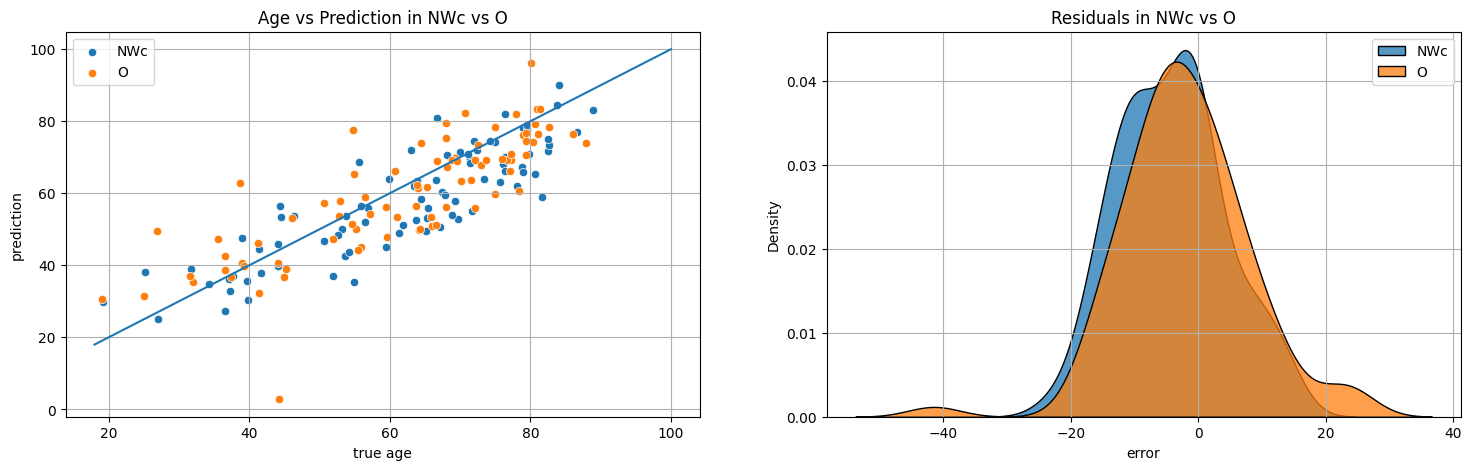

In [44]:
fig, axes = plt.subplots(ncols=2, figsize=(18, 5))
sc1 = sns.scatterplot(test_ss_df, x='true age', y='prediction', ax=axes[0], label='NWc')
sc2 = sns.scatterplot(ob_df, x='true age', y='prediction', ax=axes[0], label='O')
sns.lineplot(x=[18, 100], y=[18, 100], ax=axes[0])
kd1 = sns.kdeplot(test_ss_df, x='error', ax=axes[1], multiple='stack', label='NWc')
kd2 = sns.kdeplot(ob_df, x='error', ax=axes[1], multiple='stack', label='O')
axes[0].title.set_text('Age vs Prediction in NWc vs O')
axes[1].title.set_text('Residuals in NWc vs O')
axes[0].legend()
axes[1].legend()
axes[0].grid()
axes[1].grid()


(-40.0, 40.0)

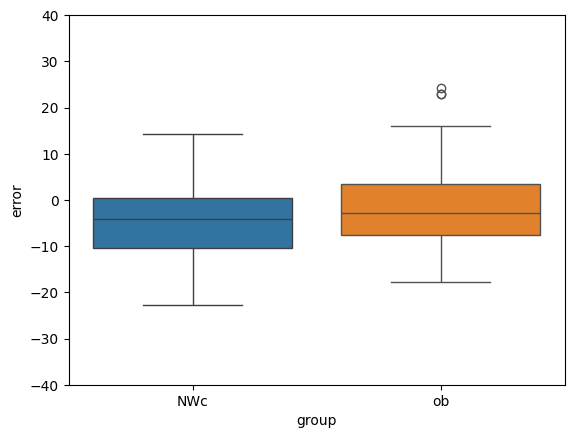

In [45]:
sns.boxplot(data=test_ss_df, x='group', y='error')
sns.boxplot(data=ob_df, x='group', y='error')
plt.ylim(-40, 40)

<Figure size 2000x1200 with 0 Axes>

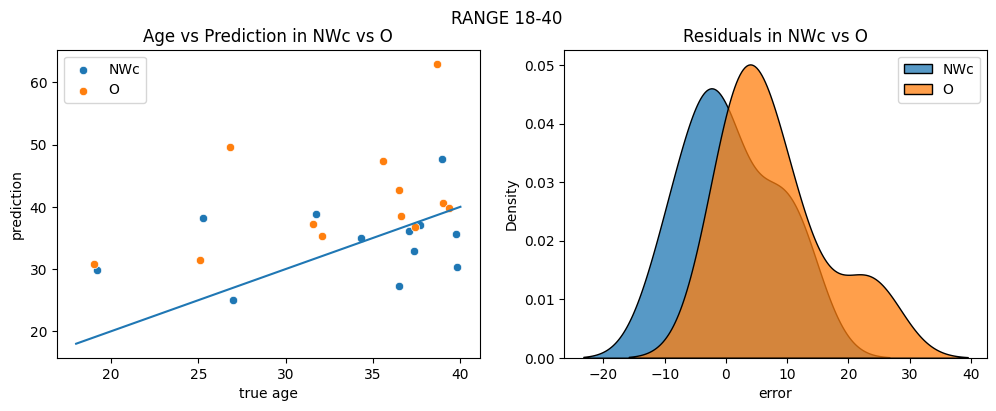

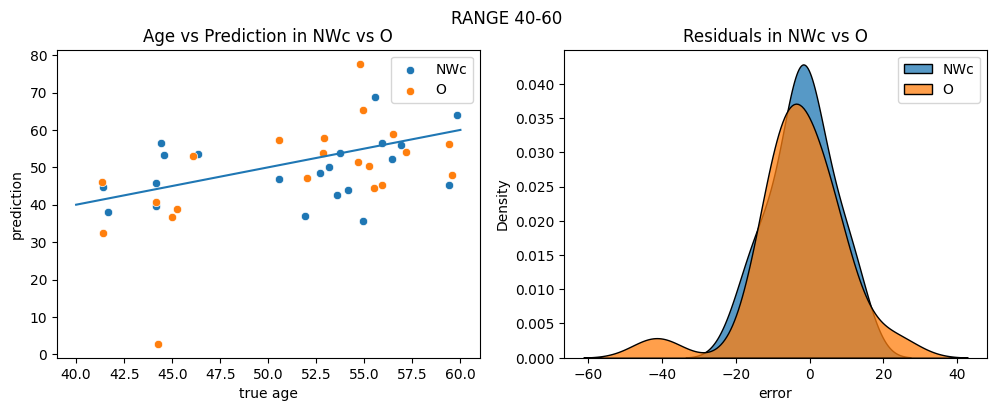

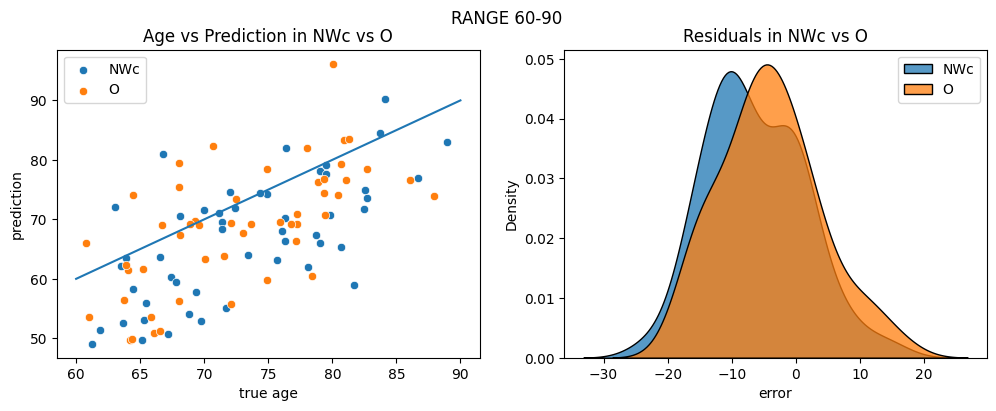

In [46]:
bins = [18, 40, 60, 90]
fig11 = plt.figure(layout='constrained', figsize=(20, 12))
subfig = fig11.subfigures(len(bins) - 1, 1)
for bin_id in range(len(bins) - 1):
    subfig[bin_id], axes = plt.subplots(ncols=2, figsize=(12, 4))
    subfig[bin_id].suptitle('RANGE ' + str(bins[bin_id]) + '-' + str(bins[bin_id + 1]))
    test_bin_df = test_ss_df[(bins[bin_id] < test_ss_df['true age']) & (test_ss_df['true age'] < bins[bin_id + 1])]
    ob_bin = ob_df[(bins[bin_id] <= ob_df['true age']) & (ob_df['true age'] < bins[bin_id + 1])]
    sc1 = sns.scatterplot(test_bin_df, x='true age', y='prediction', ax=axes[0], label='NWc')
    sc2 = sns.scatterplot(ob_bin, x='true age', y='prediction', ax=axes[0], label='O')
    sns.lineplot(x=[bins[bin_id], bins[bin_id + 1]], y=[bins[bin_id], bins[bin_id + 1]], ax=axes[0])
    kd1 = sns.kdeplot(test_bin_df, x='error', ax=axes[1], multiple='stack', label='NWc')
    kd2 = sns.kdeplot(ob_bin, x='error', ax=axes[1], multiple='stack', label='O')
    axes[0].title.set_text('Age vs Prediction in NWc vs O')
    axes[1].title.set_text('Residuals in NWc vs O')
    axes[0].legend()
    axes[1].legend()

In [47]:
intervals = []
small_df = [test_ss_df, ob_df]
dataf_means = [[], []]
errors_df = [[], []]
for bin_id in range(len(bins) - 1):
    intervals.append(str(bins[bin_id]) + '-' + str(bins[bin_id + 1]))
    for dfi in range(len(small_df)):
        dataf_bin = small_df[dfi]
        dfi_bin = dataf_bin[(bins[bin_id] <= dataf_bin['true age']) & (dataf_bin['true age'] < bins[bin_id + 1])]
        errors_df[dfi].append(dfi_bin['error'].values)
        dataf_means[dfi].append(dfi_bin['error'].mean())
print(intervals)
print(dataf_means)

['18-40', '40-60', '60-90']
[[0.7853356142962946, -2.069251386521364, -6.340240087427235], [7.945714736471625, -2.9004584791184302, -4.067134880316853]]


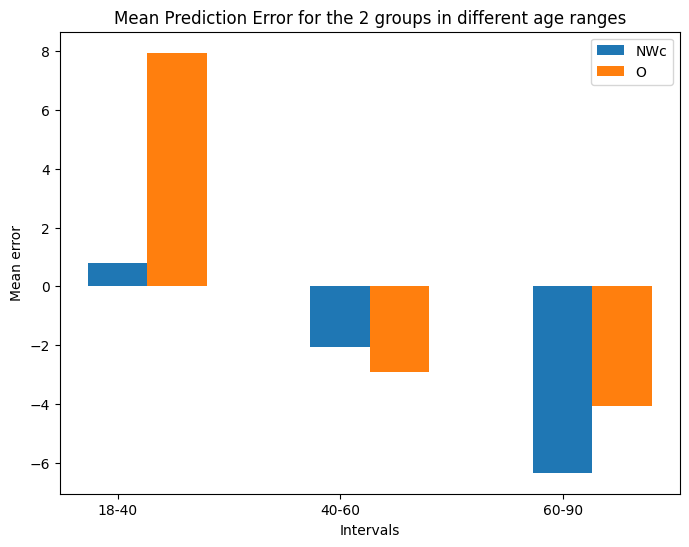

In [48]:
barfig = plt.figure(figsize=(8, 6))
labels_df = ['NWc', 'O']
inter = np.arange(len(intervals)) * 3
for lab in range(len(labels_df)):
    plt.bar(inter + lab * 0.8, dataf_means[lab], label=labels_df[lab])
plt.xticks(inter, intervals)
plt.xlabel("Intervals")
plt.ylabel("Mean error")
plt.title("Mean Prediction Error for the 2 groups in different age ranges")
plt.legend()
plt.show()

In [49]:
for bin_i in range(len(errors_df[0])):
    print('#### BIN [', bins[bin_i], '-', bins[bin_i + 1], '] ####')
    print('####### t-test #######')
    ob_nw_tt = stats.ttest_ind(errors_df[0][bin_i], errors_df[1][bin_i], equal_var=False)
    print('norm test and obese:', ob_nw_tt.pvalue)

#### BIN [ 18 - 40 ] ####
####### t-test #######
norm test and obese: 0.0374977564940806
#### BIN [ 40 - 60 ] ####
####### t-test #######
norm test and obese: 0.8007440334293143
#### BIN [ 60 - 90 ] ####
####### t-test #######
norm test and obese: 0.14299046727537035


<Figure size 800x600 with 0 Axes>

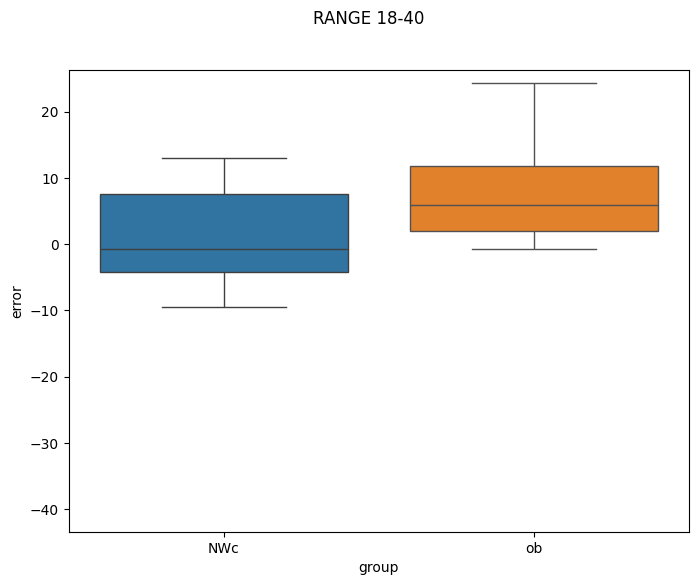

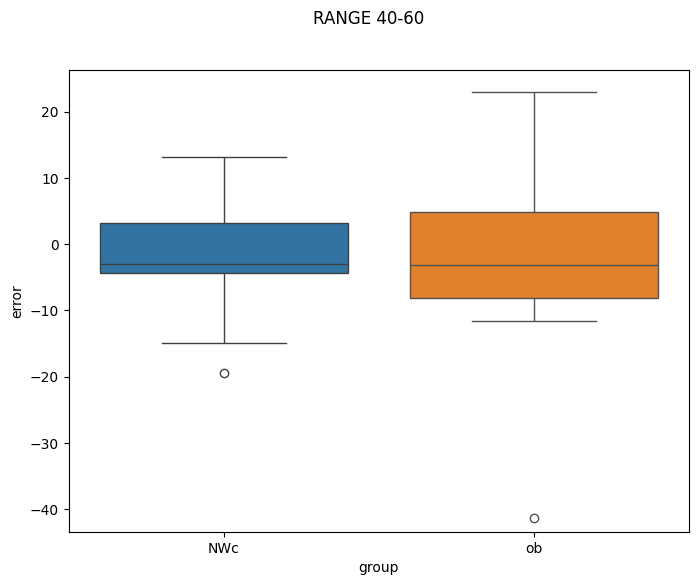

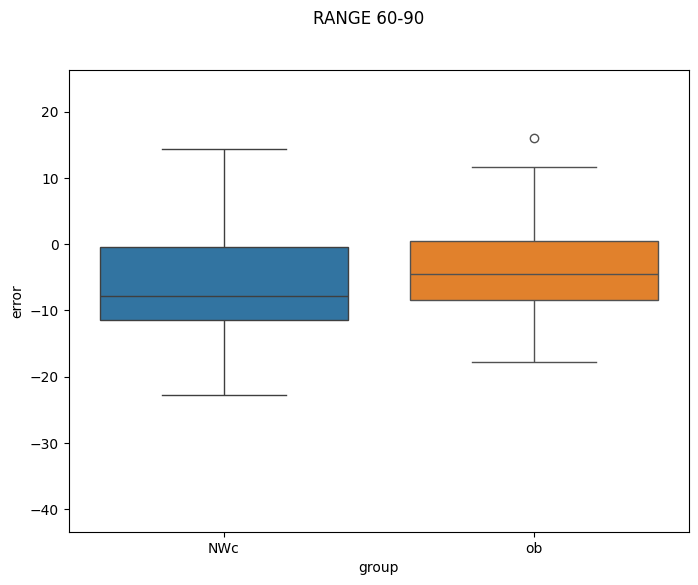

In [50]:
fig11 = plt.figure(layout='constrained', figsize=(8, 6))
subfig = fig11.subfigures(len(bins) - 1, 1)
for bin_id in range(len(bins) - 1):
    subfig[bin_id] = plt.figure(figsize=(8, 6))
    subfig[bin_id].suptitle('RANGE ' + str(bins[bin_id]) + '-' + str(bins[bin_id + 1]))
    test_bin_df = test_ss_df[(bins[bin_id] < test_ss_df['true age']) & (test_ss_df['true age'] < bins[bin_id + 1])]
    ob_bin = ob_df[(bins[bin_id] <= ob_df['true age']) & (ob_df['true age'] < bins[bin_id + 1])]
    sc1 = sns.boxplot(test_bin_df, x='group', y='error')
    sc2 = sns.boxplot(ob_bin, x='group', y='error')
    plt.ylim([np.min(np.concatenate((ob_df['error'], test_ss_df['error']))) - 2,
              np.max(np.concatenate((ob_df['error'], test_ss_df['error']))) + 2])

###CORRECTIONS


Predicted brain age (as well as brain age delta) typically shows overestimation in younger individuals and underestimation in older individuals. For this reason, it is important to Remove this age-bias to ensure that any further analyses are not influenced by the age-dependence of the predictions.

This correction is typically done by fitting a regression model on predicted age as a function of chronological age. The slope and intercept of the regression model are then used to compute the corrected predicted age, that is used to derive corrected delta values (i.e., corrected brain age delta = corrected predicted age – chronological age)

In [51]:
reg_figure = px.scatter(norm_ss_df, x='true age', y='error', labels={'x': 'true age', 'y': 'prediction error'},
                        trendline="ols", height=600, width=800)
#trace = go.Scatter(x=[18,100],y=[0,0], mode='lines', line_color='black', name='no prediction error')
#trace.update(showlegend=False)
#fig6.add_trace(trace, row='all', col='all')
#fig6.update_traces(selector=-1, showlegend=True)
reg_figure.show()

In [52]:
b0, b1 = px.get_trendline_results(reg_figure).px_fit_results.iloc[0].params
print('intercept:', b0)
print('slope:', b1)

intercept: 10.425474105477601
slope: -0.20147051529190454


In [53]:
corr_tr = norm_ss_df['prediction'] - (b1 * norm_ss_df['true age'] + b0)
corr_nw = test_df['prediction'] - (b1 * test_df['test true age'] + b0)
corr_ob = ob_predictions - (b1 * ob_age + b0)
corr_err_tr = corr_tr - norm_ss_df['true age']
corr_err_ob = corr_ob - ob_age
#N.B. This is the same as doing residuals (prediction-true age) - correction
corr_err_nw = corr_nw - test_df['test true age']
correction_train = pd.DataFrame({'true age': norm_ss_df['true age'], 'corr_pred': corr_tr, 'corr_res': corr_err_tr,
                                 'group': np.repeat('TR', len(norm_ss_df['true age']))})
correction_nw_df = pd.DataFrame({'true age': test_df['test true age'], 'corr_pred': corr_nw, 'corr_res': corr_err_nw,
                                 'group': np.repeat('NW', len(test_df['test true age']))})
correction_ob_df = pd.DataFrame(
    {'true age': ob_age, 'corr_pred': corr_ob, 'corr_res': corr_err_ob, 'group': np.repeat('O', len(ob_age))})
tot_corr = pd.concat([correction_train, correction_nw_df, correction_ob_df])

In [54]:
fig92 = px.scatter(tot_corr, x='true age', y='corr_pred', labels={'x': 'true age', 'y': 'corr_pred_error'}, height=600,
                   facet_col='group')
fig92.update_xaxes(showgrid=False)
fig92.update_yaxes(showline=True, linecolor='black', showgrid=False)
fig92.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
)
fig92.for_each_yaxis(lambda yax: yax.update(showticklabels=True))
trace = go.Scatter(x=[18, 90], y=[18, 90], mode='lines', line_color='red', name='optimal prediction')
trace.update(showlegend=False)
fig92.add_trace(trace, row='all', col='all')
fig92.show()

In [55]:
fig93 = px.scatter(tot_corr, x='true age', y='corr_res', labels={'x': 'true age', 'y': 'corr_pred_error'},
                   trendline="ols", height=600, facet_col='group')
fig93.update_xaxes(showgrid=False)
fig93.update_yaxes(showline=True, linecolor='black', showgrid=False)
fig93.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
)
fig93.for_each_yaxis(lambda yax: yax.update(showticklabels=True))
fig93.show()

####Statistics (corrections)

In [56]:
print('R2 TRAIN:', metrics.r2_score(norm_ss_df['true age'], corr_tr))
print('R2 NW:', metrics.r2_score(test_df['test true age'], corr_nw))
print('R2 OB:', metrics.r2_score(ob_age, corr_ob))

R2 TRAIN: 0.8602611685957711
R2 NW: 0.7663449922748133
R2 OB: 0.6649730634539643


In [57]:
print('MAE TR:', np.abs(corr_err_tr).mean())
print('MAE NW:', np.abs(corr_err_nw).mean())
print('MAE OB:', np.abs(corr_err_ob).mean())


MAE TR: 5.62849403193178
MAE NW: 6.561054014907446
MAE OB: 6.6515668312428184


In [58]:
print('MEAN ERROR TR:', corr_err_tr.mean())
print('MEAN ERROR NW:', corr_err_nw.mean())
print('MEAN ERROR OB:', corr_err_ob.mean())

MEAN ERROR TR: -5.333991174265572e-15
MEAN ERROR NW: -2.177781318828858
MEAN ERROR OB: -0.036815434958080005


In [59]:
print('NW mean residuals:', round(corr_err_nw.mean(), 2), 'std', round(corr_err_nw.std(), 2))
print('O mean residuals:', round(corr_err_ob.mean(), 2), 'std:', round(corr_err_ob.std(), 2))
print('O-NW:', round(corr_err_ob.mean() - corr_err_nw.mean(), 2))

NW mean residuals: -2.18 std 7.61
O mean residuals: -0.04 std: 9.41
O-NW: 2.14


In [60]:
print('NW mean residuals:', round(corr_err_nw.mean(), 2), 'std', round(corr_err_nw.std(), 2))
print('O mean residuals:', round(corr_err_ob.mean(), 2), 'std:', round(corr_err_ob.std(), 2))
print('O-NW:', round(corr_err_ob.mean() - corr_err_nw.mean(), 2))

NW mean residuals: -2.18 std 7.61
O mean residuals: -0.04 std: 9.41
O-NW: 2.14


In [61]:
stats.ttest_ind(correction_ob_df['corr_res'], correction_nw_df['corr_res'], equal_var=False)

TtestResult(statistic=1.611848435624581, pvalue=0.10900150560139915, df=157.14792670878097)

In [62]:
intervals = []
small_df = [correction_nw_df, correction_ob_df]
corr_dataf_means = [[], []]
corr_errors_df = [[], []]
corr_std_devs = [[], []]
for bin_id in range(len(bins) - 1):
    intervals.append(str(bins[bin_id]) + '-' + str(bins[bin_id + 1]))
    for dfi in range(len(small_df)):
        dataf_bin = small_df[dfi]
        dfi_bin = dataf_bin[(bins[bin_id] <= dataf_bin['true age']) & (dataf_bin['true age'] < bins[bin_id + 1])]
        errors = dfi_bin['corr_res'].values
        corr_errors_df[dfi].append(errors)
        corr_dataf_means[dfi].append(errors.mean())
        corr_std_devs[dfi].append(errors.std())
print(intervals)
print(corr_dataf_means)
print(corr_std_devs)

['18-40', '40-60', '60-90']
[[-2.8475600681147455, -2.1755016370882294, -2.0179918853313086], [4.196469831479511, -2.969292776845371, 0.17883658468956057]]
[[6.440226873555123, 8.165067609187828, 7.5442593457116764], [7.676950602408376, 12.184706705962626, 7.790488954216492]]


In [63]:
for bin_i in range(len(corr_errors_df[0])):
    print('\n#### BIN [', bins[bin_i], '-', bins[bin_i + 1], '] ####\n')
    print('####### t-test #######')
    ob_nw_tt = stats.ttest_ind(corr_errors_df[1][bin_i], corr_errors_df[0][bin_i], equal_var=False)
    print('norm test and obese (pvalue):', round(ob_nw_tt.pvalue, 3))
    print('norm test and obese (t):', round(ob_nw_tt.statistic, 3))
    print('NW: ', round(corr_dataf_means[0][bin_i], 2),
          '(' + u"\u00B1" + ' ' + str(round(corr_std_devs[0][bin_i], 2)) + ')')
    print('O: ', round(corr_dataf_means[1][bin_i], 2),
          '(' + u"\u00B1" + ' ' + str(round(corr_std_devs[1][bin_i], 2)) + ')')
    print('O-NW: ', round(corr_dataf_means[1][bin_i] - corr_dataf_means[0][bin_i], 2))


#### BIN [ 18 - 40 ] ####

####### t-test #######
norm test and obese (pvalue): 0.03
norm test and obese (t): 2.331
NW:  -2.85 (± 6.44)
O:  4.2 (± 7.68)
O-NW:  7.04

#### BIN [ 40 - 60 ] ####

####### t-test #######
norm test and obese (pvalue): 0.81
norm test and obese (t): -0.242
NW:  -2.18 (± 8.17)
O:  -2.97 (± 12.18)
O-NW:  -0.79

#### BIN [ 60 - 90 ] ####

####### t-test #######
norm test and obese (pvalue): 0.159
norm test and obese (t): 1.418
NW:  -2.02 (± 7.54)
O:  0.18 (± 7.79)
O-NW:  2.2


##GM

The procedure utilized for GM volumes analysis is the same as the one for WM measures.

In [64]:
l1_ratio = [0.001, 0.25, 0.5, 0, 75, 0.99]
alpha = np.logspace(-5, 5, 100)

In [65]:
n_folds = 10
nw_cat = pd.cut(y_train, bins=5, labels=range(5))
kf = StratifiedKFold(n_splits=n_folds, shuffle=True).split(x_gm_train, nw_cat)

In [66]:
gm_reg = ElasticNetCV(alphas=alpha, l1_ratio=l1_ratio, cv=kf, random_state=3)
gm_reg.fit(x_gm_train, y_train)

Output streaming troncato alle ultime 5000 righe.
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 53.219506563466695, tolerance: 0.032283367735668984

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: UserWarning:

Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 50.826322906959874, tolerance: 0.032283367735668984

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: UserWarning:

Coordinate descent without L1 regularization may lead to unexpected results and is discour

ElasticNetCV(alphas=array([1.00000000e-05, 1.26185688e-05, 1.59228279e-05, 2.00923300e-05,
       2.53536449e-05, 3.19926714e-05, 4.03701726e-05, 5.09413801e-05,
       6.42807312e-05, 8.11130831e-05, 1.02353102e-04, 1.29154967e-04,
       1.62975083e-04, 2.05651231e-04, 2.59502421e-04, 3.27454916e-04,
       4.13201240e-04, 5.21400829e-04, 6.57933225e-04, 8.30217568e-04,
       1.04761575e-03, 1.321941...
       1.20450354e+03, 1.51991108e+03, 1.91791026e+03, 2.42012826e+03,
       3.05385551e+03, 3.85352859e+03, 4.86260158e+03, 6.13590727e+03,
       7.74263683e+03, 9.77009957e+03, 1.23284674e+04, 1.55567614e+04,
       1.96304065e+04, 2.47707636e+04, 3.12571585e+04, 3.94420606e+04,
       4.97702356e+04, 6.28029144e+04, 7.92482898e+04, 1.00000000e+05]),
             cv=<generator object _BaseKFold.split at 0x78570dcb9230>,
             l1_ratio=[0.001, 0.25, 0.5, 0, 75, 0.99], random_state=3)

In [67]:
x_gm_train.shape

(361, 48)

In [68]:
print('best alpha:', gm_reg.alpha_)
print('best l1 ratio:', gm_reg.l1_ratio_)

best alpha: 0.001047615752789665
best l1 ratio: 0.99


###Model coefficients

In [69]:
weight_areas = {
    gm.loc[0].index[i + 1]: gm_reg.coef_[i] for i in range(len(gm_reg.coef_))
}

In [70]:
gm_coefs = pd.DataFrame.from_dict(weight_areas, orient='index', columns=['coef'])
gm_coefs.sort_values(by='coef')

coef
MTG_Ant         -1.295996
Heschl_Gyrus    -1.236362
Front_Operc     -1.016589
TOF             -0.943007
STS_Post        -0.684782
Cing_Post       -0.507621
Paracing        -0.474115
MTG_Post        -0.436542
OFC             -0.331005
STA_Ant         -0.316371
Intracalc       -0.312079
IFG_Oper        -0.307928
Temp_Pole       -0.243146
Cent_Operc      -0.217986
Lat_Occip_Inf   -0.156970
Frontal_Pole    -0.138548
Occip_Pole      -0.132577
Sup_Front_Gyrus -0.118566
Prec_Gyrus      -0.115998
MTG_TempOccip   -0.097334
Cing_Ant        -0.095214
Lat_Occip_Sup   -0.065175
SPL              0.000000
TFC_Ant         -0.000000
PostCent        -0.000000
Subcallosal      0.000000
Supracalc        0.000000
SMG_Ant         -0.000000
Planum_Polare   -0.000000
Ang_Gyrus       -0.000000
Parahipp_Post    0.000000
Cuneus           0.000000
IFG_Tri         -0.000000
ITG_Ant          0.000000
Pariet_Operc     0.000000
MFG             -0.000000
TFC_Post        -0.000000
Occip_Fusiform   0.000000
Mid_Front_gyrus  0.000613
SMA              0.037254
Lingual          0.040140
Precuneus        0.049225
ITG_Post         0.077787
Planum_Temp      0.136912
SMG_Post         0.161913
Parahipp_Ant     0.327578
ITG_TempOccip    0.476522
Insular_pole     0.478821

###Results

In [71]:
dataframes_gm = []
comparisons_gm = [[y_train, gm_reg.predict(x_gm_train)]]
print('score of the model computed on the train dataset:', gm_reg.score(x_gm_train, y_train))
comparisons_gm.append([y_test, gm_reg.predict(x_gm_test)])
print('score of the model computed on the test dataset:', gm_reg.score(x_gm_test, y_test))
for comp1 in comparisons_gm:
    comp1[0] = comp1[0] * np.std(train_age) + np.mean(train_age)
    comp1[1] = comp1[1] * np.std(train_age) + np.mean(train_age)
print('number of comparisons (true age vs prediction):', len(comparisons_gm))
for comp1, sample in zip(comparisons_gm, ['train', 'test']):
    print('mean absolute error (in years) of the model predictions on the', sample, 'dataset',
          np.mean(np.abs(comp1[0] - comp1[1])))
    df1 = pd.DataFrame({sample + ' true age': comp1[0], 'prediction': comp1[1], 'error': np.abs(comp1[1] - comp1[0])})
    dataframes_gm.append(df1)
    print(df1)

score of the model computed on the train dataset: 0.8092367545675583
score of the model computed on the test dataset: 0.7088432965712985
number of comparisons (true age vs prediction): 2
mean absolute error (in years) of the model predictions on the train dataset 6.539505046198363
     train true age  prediction      error
0             24.50   29.750233   5.250233
1             28.67   35.564535   6.894535
2             23.33   41.764205  18.434205
4             28.42   23.266172   5.153828
5             25.25   41.166496  15.916496
..              ...         ...        ...
518           79.25   82.796066   3.546066
519           81.83   71.272220  10.557780
520           80.75   72.898589   7.851411
528           79.42   78.131065   1.288935
532           84.42   89.925778   5.505778

[361 rows x 3 columns]
mean absolute error (in years) of the model predictions on the test dataset 7.02415087945646
     test true age  prediction      error
10           19.17   22.186902   3.016902
4

In [72]:
error_norm_gm = dataframes_gm[1]['prediction'] - dataframes_gm[1]['test true age']
gm_train_df = dataframes_gm[0]
gm_train_df['error'] = gm_train_df['prediction'] - gm_train_df['train true age']
gm_test_df = dataframes_gm[1]
gm_test_df['error'] = gm_test_df['prediction'] - gm_test_df['test true age']
print('MEAN BRAIN AGE DELTA (NW):', gm_test_df['error'].mean())
print('STD ERROR NW', gm_test_df['error'].std())

MEAN BRAIN AGE DELTA (NW): -3.752485654130566
STD ERROR NW 7.9946639245415465


##Obese

In [73]:
ob_gm = gm_values[obese_ss.index]
norm_ob_gm = (ob_gm - np.mean(gm_train_sample)) / np.std(gm_train_sample)
print(norm_ob_gm.shape)
ob_gm_pred = (gm_reg.predict(norm_ob_gm) * np.std(train_age)) + train_age.mean()
error_ob_gm = ob_gm_pred - ob_age
error_ob_gm

(83, 48)


23      3.853776
37      9.230541
38     12.303531
62     -3.172292
66     10.141322
         ...    
515    -1.712349
523     8.690653
526    -2.000236
530    -4.844998
534    -5.151952
Name: Age, Length: 83, dtype: float64

In [74]:
print('MEAN BRAIN AGE DELTA (O):', error_ob_gm.mean())
print('STD ERROR O', error_ob_gm.std())
print('MEAN ABSOLUTE ERROR (O):', np.abs(error_ob_gm).mean())
print('R-squared (O):', gm_reg.score(norm_ob_gm, norm_ob_age))

MEAN BRAIN AGE DELTA (O): -0.60359699718525
STD ERROR O 7.640577702953401
MEAN ABSOLUTE ERROR (O): 6.4744401430558485
R-squared (O): 0.777627024561056


###Results

###Stats (Entire Group)

In [75]:
norm_gm_df = dataframes_gm[0].rename(columns={'train true age': "true age"})
norm_gm_df['group'] = np.repeat('TR', len(norm_gm_df))
test_gm_df = gm_test_df.rename(columns={'test true age': "true age"})
test_gm_df['group'] = np.repeat('NWc', len(gm_test_df))
err_pred_test = test_gm_df['error']
ob_gm_df = pd.DataFrame(
    {'true age': ob_age, 'prediction': ob_gm_pred, 'error': error_ob_gm, 'group': np.repeat('O', len(ob_age))})
tot_gm_df = pd.concat([norm_gm_df, ob_gm_df, test_gm_df], ignore_index=True)
tot_gm_df

true age  prediction      error group
0       24.50   29.750233   5.250233    TR
1       28.67   35.564535   6.894535    TR
2       23.33   41.764205  18.434205    TR
3       28.42   23.266172  -5.153828    TR
4       25.25   41.166496  15.916496    TR
..        ...         ...        ...   ...
522     79.50   73.468176  -6.031824   NWc
523     83.75   99.164503  15.414503   NWc
524     84.08   81.611982  -2.468018   NWc
525     82.58   71.112071 -11.467929   NWc
526     86.67   79.630057  -7.039943   NWc

[527 rows x 4 columns]

In [76]:
print('########## MEAN ABSOLUTE ERROR ##########\n')
print('MAE TR:', np.abs(norm_gm_df['error']).mean())
print('MAE NW:', np.abs(test_gm_df['error']).mean())
print('MAE OB:', np.abs(ob_gm_df['error']).mean())
print('\n')
print('########## MEAN ERROR ##########\n')
print('MEAN ERROR TR:', norm_gm_df['error'].mean())
print('MEAN ERROR NW:', test_gm_df['error'].mean())
print('MEAN ERROR OB:', ob_gm_df['error'].mean())
print('\n')
print('########## STD ERROR ##########\n')
print('STD ERROR TR:', norm_gm_df['error'].std())
print('STD ERROR NW:', test_gm_df['error'].std())
print('STD ERROR OB:', ob_gm_df['error'].std())
print('\n')
print('########## T-TEST ##########\n')
t_ob = stats.ttest_ind(error_ob_gm, error_norm_gm, equal_var=False)
print('norm test and obese:', t_ob)

########## MEAN ABSOLUTE ERROR ##########

MAE TR: 6.539505046198363
MAE NW: 7.02415087945646
MAE OB: 6.4744401430558485


########## MEAN ERROR ##########

MEAN ERROR TR: 9.605120638529886e-15
MEAN ERROR NW: -3.752485654130566
MEAN ERROR OB: -0.60359699718525


########## STD ERROR ##########

STD ERROR TR: 8.081725248021545
STD ERROR NW: 7.9946639245415465
STD ERROR OB: 7.640577702953401


########## T-TEST ##########

norm test and obese: TtestResult(statistic=2.5941519513859777, pvalue=0.010342688052494064, df=163.66458829544507)


## Representation

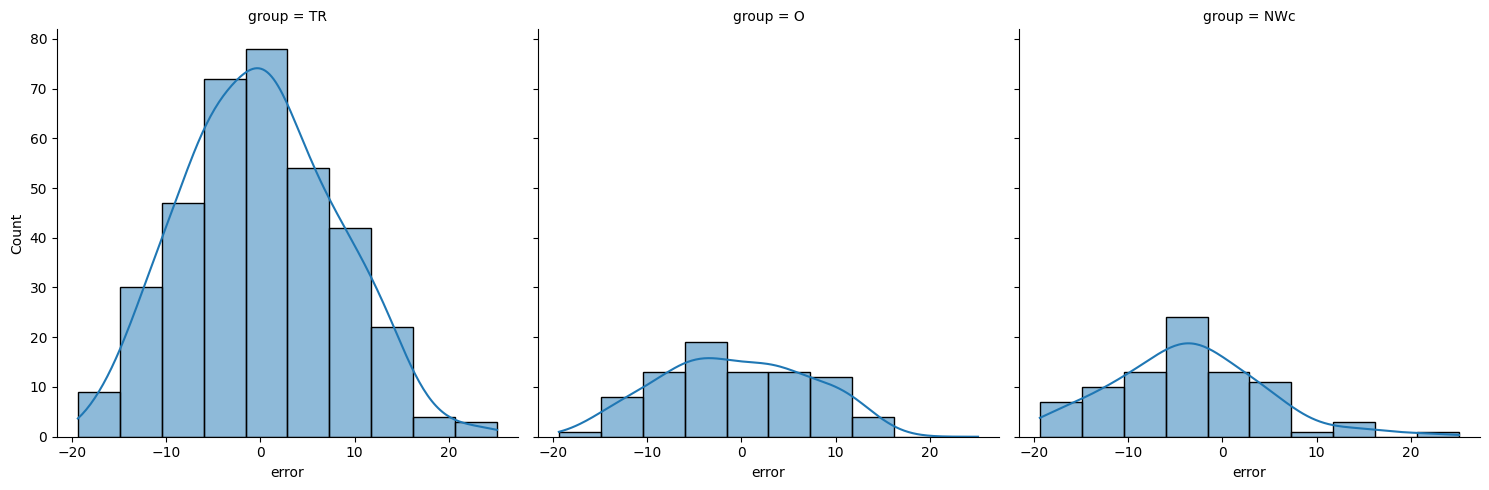

In [77]:
sns.displot(data=tot_gm_df, x='error', col='group', bins=10, kde=True)

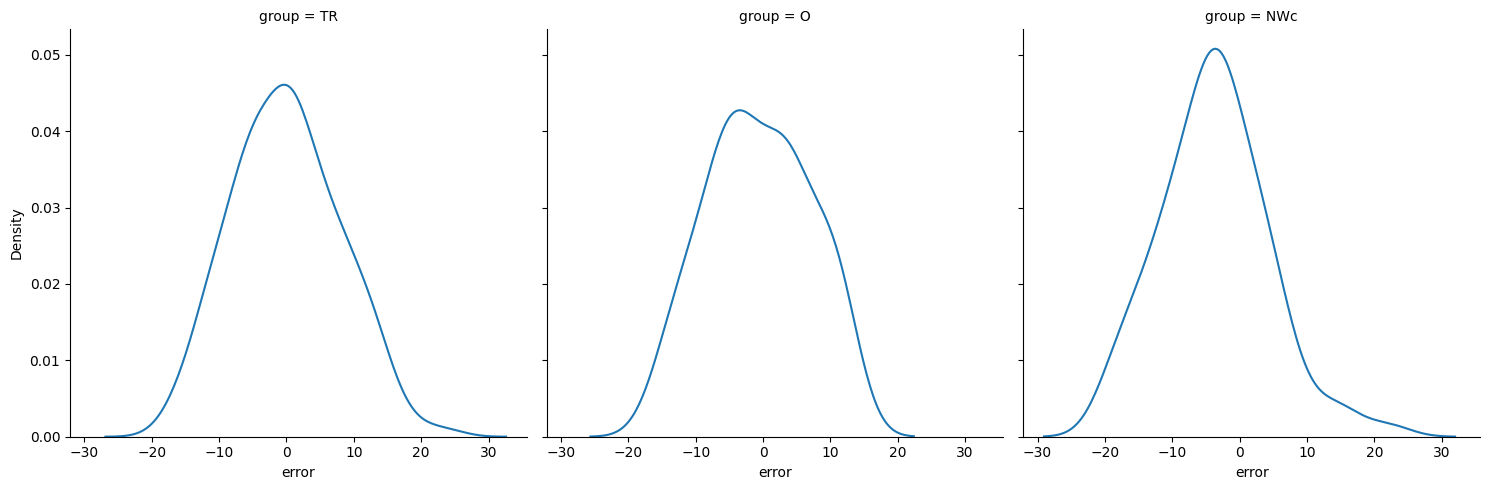

In [78]:
sns.displot(data=tot_gm_df, x='error', col='group', kind='kde', common_norm=False)

In [79]:
fig7 = px.scatter(tot_gm_df, x='true age', y='prediction', labels={'x': 'true age', 'y': 'prediction'}, height=600,
                  facet_col='group')
trace = go.Scatter(x=[18, 90], y=[18, 90], mode='lines', line_color='red', name='optimal prediction')
trace.update(showlegend=False)
fig7.add_trace(trace, row='all', col='all')
fig7.update_traces(selector=-1, showlegend=True)
fig7.show()

In [80]:
fig6 = px.scatter(tot_gm_df, x='true age', y='error', labels={'x': 'true age', 'y': 'prediction error'},
                  trendline="ols", height=600, facet_col='group')
fig6.show()

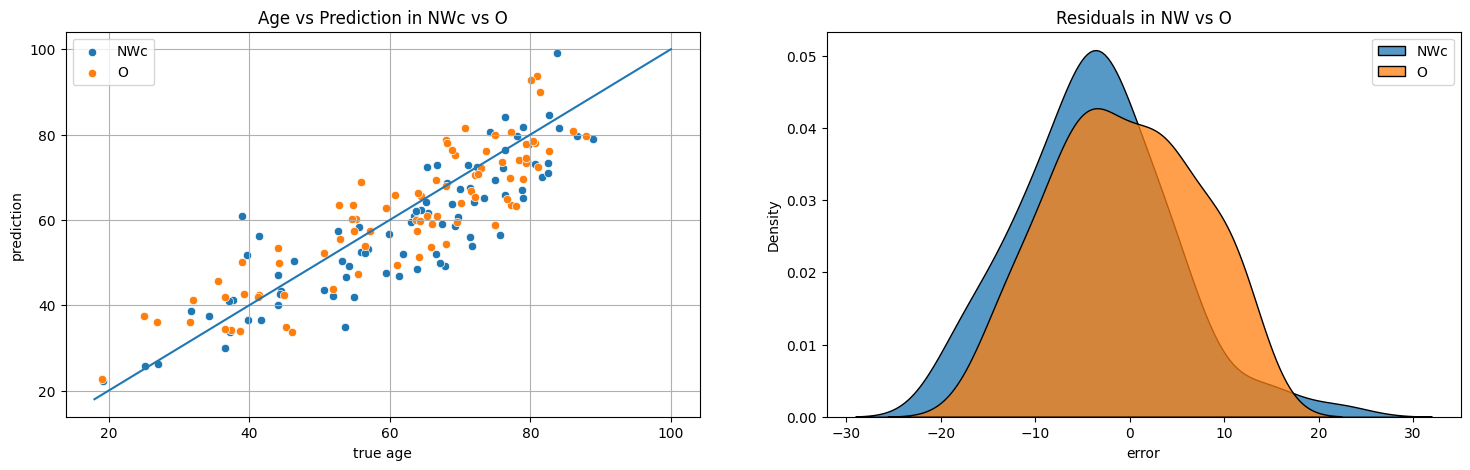

In [81]:
fig, axes = plt.subplots(ncols=2, figsize=(18, 5))
small_gm_df = [ob_gm_df]
labels_df = ['O']
sc1 = sns.scatterplot(test_gm_df, x='true age', y='prediction', ax=axes[0], label='NWc')
sc2 = sns.scatterplot(ob_gm_df, x='true age', y='prediction', ax=axes[0], label='O')
sns.lineplot(x=[18, 100], y=[18, 100], ax=axes[0])
kd1 = sns.kdeplot(test_gm_df, x='error', ax=axes[1], multiple='stack', label='NWc')
kd2 = sns.kdeplot(ob_gm_df, x='error', ax=axes[1], multiple='stack', label='O')
axes[0].title.set_text('Age vs Prediction in NWc vs O')
axes[1].title.set_text('Residuals in NW vs O')
axes[0].legend()
axes[1].legend()
axes[0].grid()


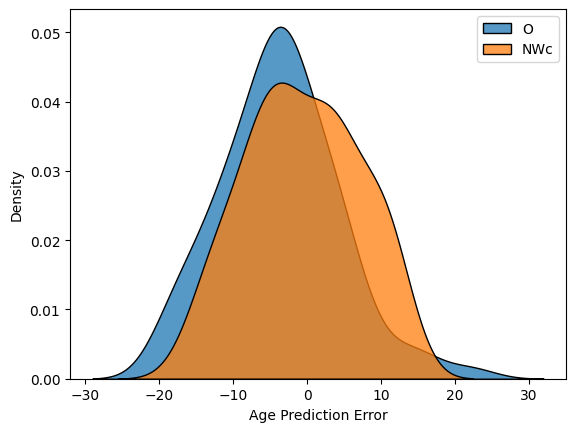

In [82]:
kd1 = sns.kdeplot(test_gm_df, x='error', multiple='stack', label='O')
kd2 = sns.kdeplot(ob_gm_df, x='error', multiple='stack', label='NWc')
plt.xlabel('Age Prediction Error')
plt.legend()

(-40.0, 40.0)

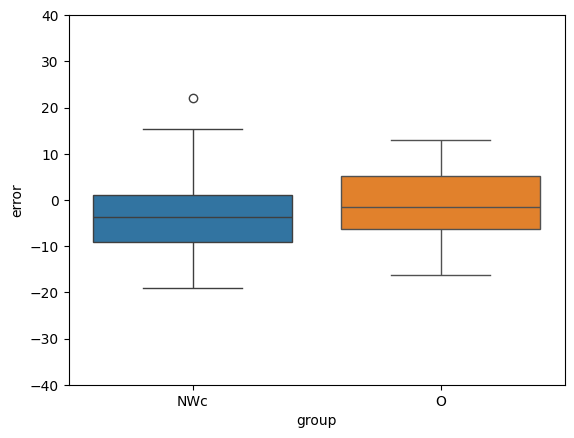

In [83]:
sns.boxplot(data=test_gm_df, x='group', y='error')
sns.boxplot(data=ob_gm_df, x='group', y='error')
plt.ylim(-40, 40)

###Comparisons in different age bins

<Figure size 1800x500 with 0 Axes>

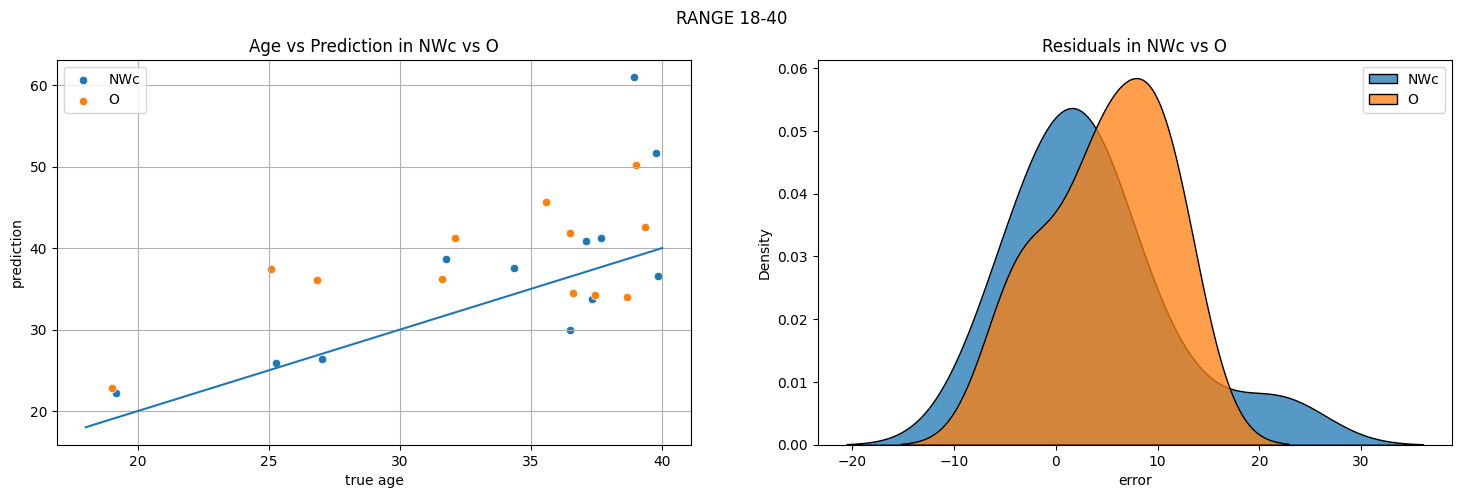

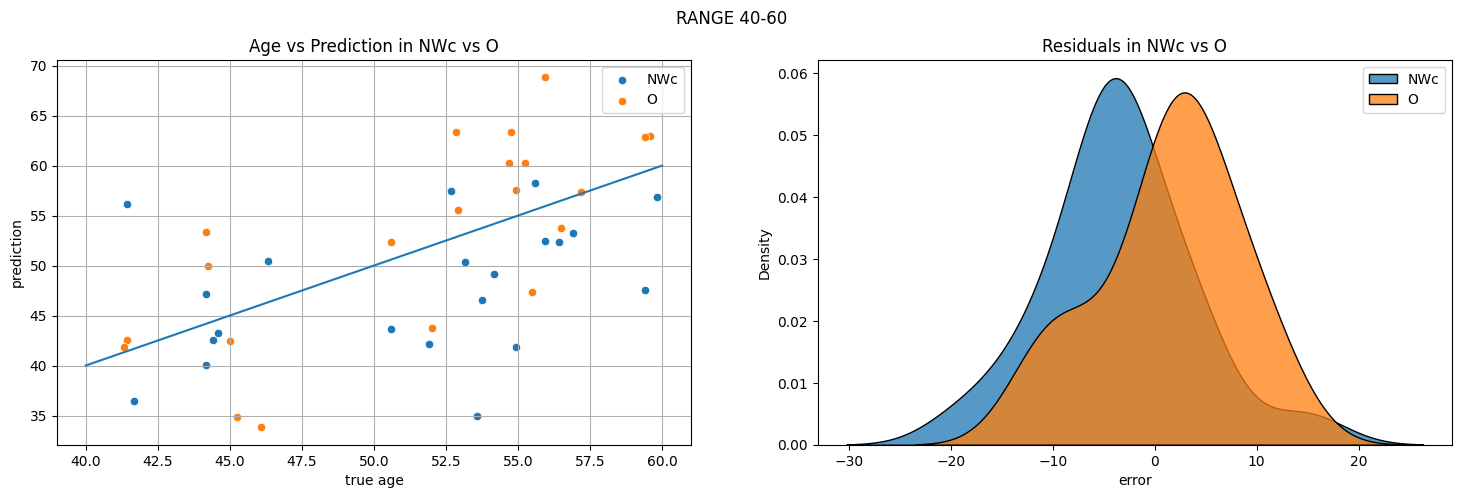

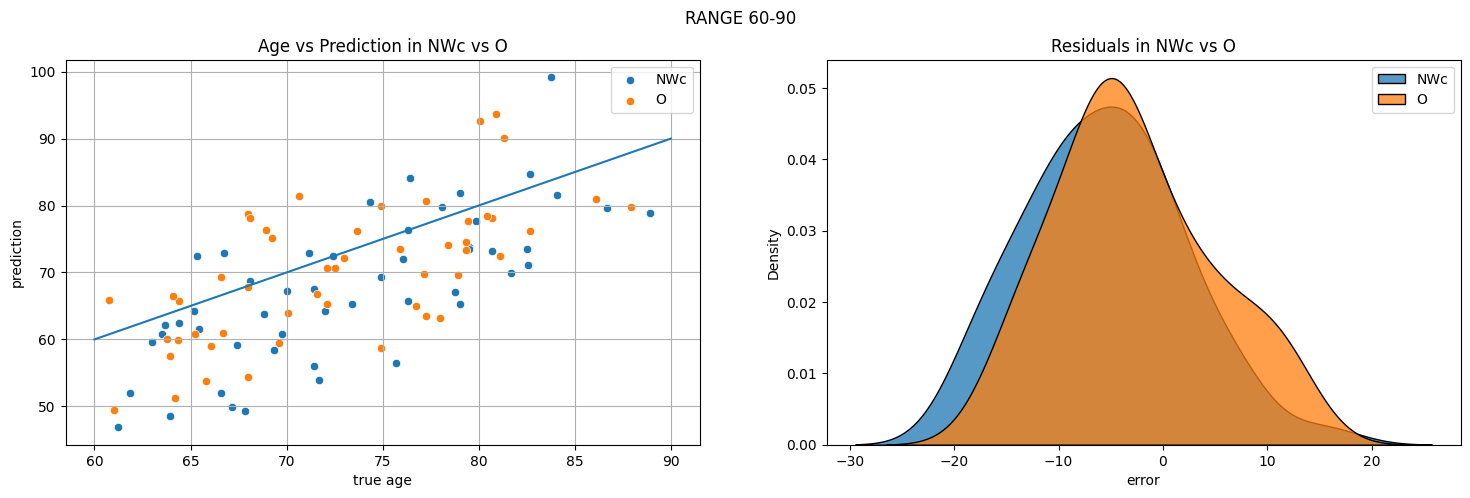

In [84]:
fig11 = plt.figure(layout='constrained', figsize=(18, 5))
subfig = fig11.subfigures(len(bins) - 1, 1)
bins = [18, 40, 60, 90]
for bin_id in range(len(bins) - 1):
    subfig[bin_id], axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))
    subfig[bin_id].suptitle('RANGE ' + str(bins[bin_id]) + '-' + str(bins[bin_id + 1]))
    gm_test_bin_df = test_gm_df[(bins[bin_id] < test_gm_df['true age']) & (test_gm_df['true age'] < bins[bin_id + 1])]
    ob_bin = ob_gm_df[(bins[bin_id] <= ob_gm_df['true age']) & (ob_gm_df['true age'] < bins[bin_id + 1])]
    sc1 = sns.scatterplot(gm_test_bin_df, x='true age', y='prediction', ax=axes[0], label='NWc')
    sc2 = sns.scatterplot(ob_bin, x='true age', y='prediction', ax=axes[0], label='O')
    sns.lineplot(x=[bins[bin_id], bins[bin_id + 1]], y=[bins[bin_id], bins[bin_id + 1]], ax=axes[0])
    kd1 = sns.kdeplot(gm_test_bin_df, x='error', ax=axes[1], multiple='stack', label='NWc')
    kd2 = sns.kdeplot(ob_bin, x='error', ax=axes[1], multiple='stack', label='O')
    axes[0].title.set_text('Age vs Prediction in NWc vs O')
    axes[1].title.set_text('Residuals in NWc vs O')
    axes[0].legend()
    axes[1].legend()
    axes[0].grid()

<Figure size 800x600 with 0 Axes>

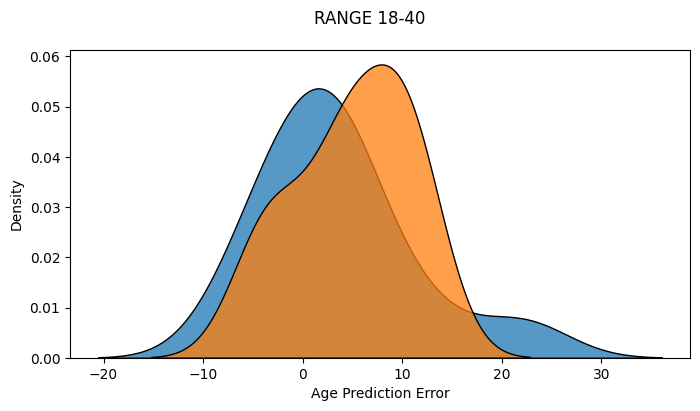

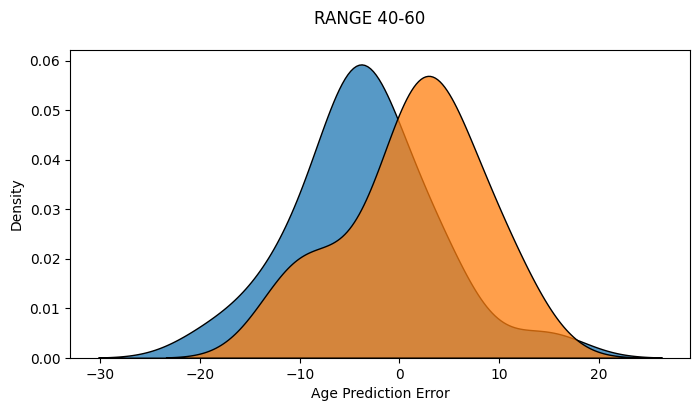

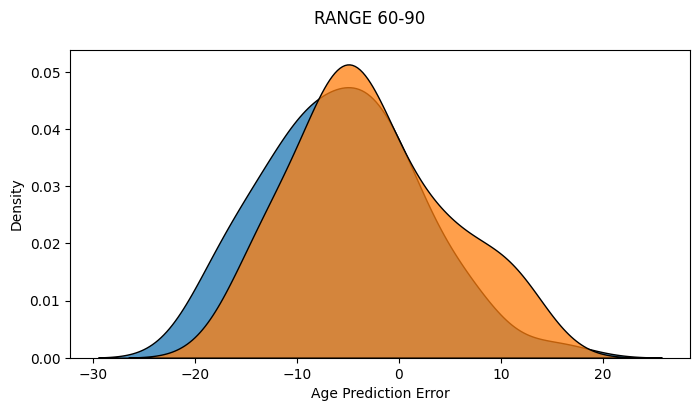

In [85]:
fig11 = plt.figure(layout='constrained', figsize=(8, 6))
subfig = fig11.subfigures(len(bins) - 1, 1)
for bin_id in range(len(bins) - 1):
    subfig[bin_id] = plt.figure(figsize=(8, 4))
    subfig[bin_id].suptitle('RANGE ' + str(bins[bin_id]) + '-' + str(bins[bin_id + 1]))
    dataf_bin = small_df[0]
    test_bin_df = test_gm_df[(bins[bin_id] < test_gm_df['true age']) & (test_gm_df['true age'] < bins[bin_id + 1])]
    ob_bin = ob_gm_df[(bins[bin_id] <= ob_gm_df['true age']) & (ob_gm_df['true age'] < bins[bin_id + 1])]
    kd1 = sns.kdeplot(test_bin_df, x='error', multiple='stack', label='NWc')
    kd2 = sns.kdeplot(ob_bin, x='error', multiple='stack', label='O')
    plt.xlabel('Age Prediction Error')

<Figure size 800x600 with 0 Axes>

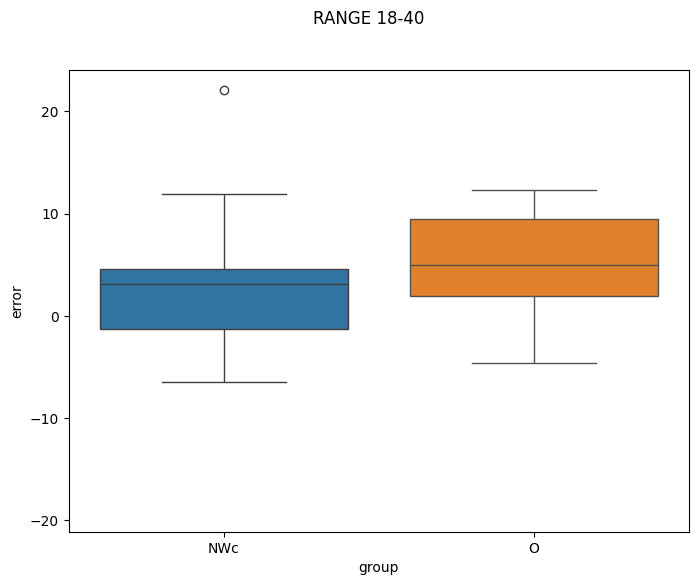

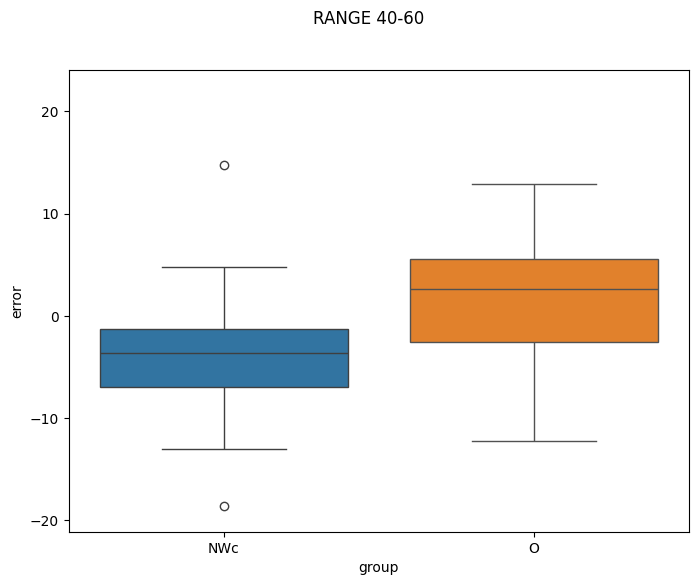

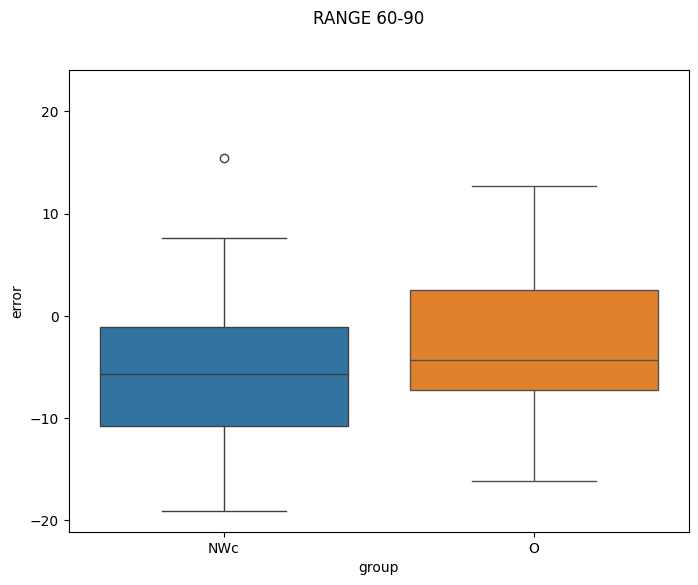

In [86]:
fig11 = plt.figure(layout='constrained', figsize=(8, 6))
subfig = fig11.subfigures(len(bins) - 1, 1)
for bin_id in range(len(bins) - 1):
    subfig[bin_id] = plt.figure(figsize=(8, 6))
    subfig[bin_id].suptitle('RANGE ' + str(bins[bin_id]) + '-' + str(bins[bin_id + 1]))
    test_bin_df = test_gm_df[(bins[bin_id] < test_gm_df['true age']) & (test_gm_df['true age'] < bins[bin_id + 1])]
    ob_bin = ob_gm_df[(bins[bin_id] <= ob_gm_df['true age']) & (ob_gm_df['true age'] < bins[bin_id + 1])]
    sc1 = sns.boxplot(test_bin_df, x='group', y='error')
    sc2 = sns.boxplot(ob_bin, x='group', y='error')
    plt.ylim([np.min(np.concatenate((ob_gm_df['error'], test_gm_df['error']))) - 2,
              np.max(np.concatenate((ob_gm_df['error'], test_gm_df['error']))) + 2])

In [87]:
intervals = []
small_gm_df = [test_gm_df, ob_gm_df]
dataf_means = [[], []]
errors_df = [[], []]
std_devs = [[], []]
for bin_id in range(len(bins) - 1):
    intervals.append(str(bins[bin_id]) + '-' + str(bins[bin_id + 1]))
    for dfi in range(len(small_gm_df)):
        dataf_bin = small_gm_df[dfi]
        dfi_bin = dataf_bin[(bins[bin_id] <= dataf_bin['true age']) & (dataf_bin['true age'] < bins[bin_id + 1])]
        errors_df[dfi].append(dfi_bin['error'].values)
        dataf_means[dfi].append(dfi_bin['error'].mean())
        std_devs[dfi].append(dfi_bin['error'].std())
print(intervals)
print(dataf_means)
print(std_devs)

['18-40', '40-60', '60-90']
[[3.4373890382841075, -3.4641935205274734, -5.599138276423386], [4.938901311084499, 1.3785116121749315, -2.766282207101266]]
[[7.67911993915244, 7.100621918959572, 7.547649756861424], [5.781600474126372, 6.841107977215493, 7.557027130255352]]


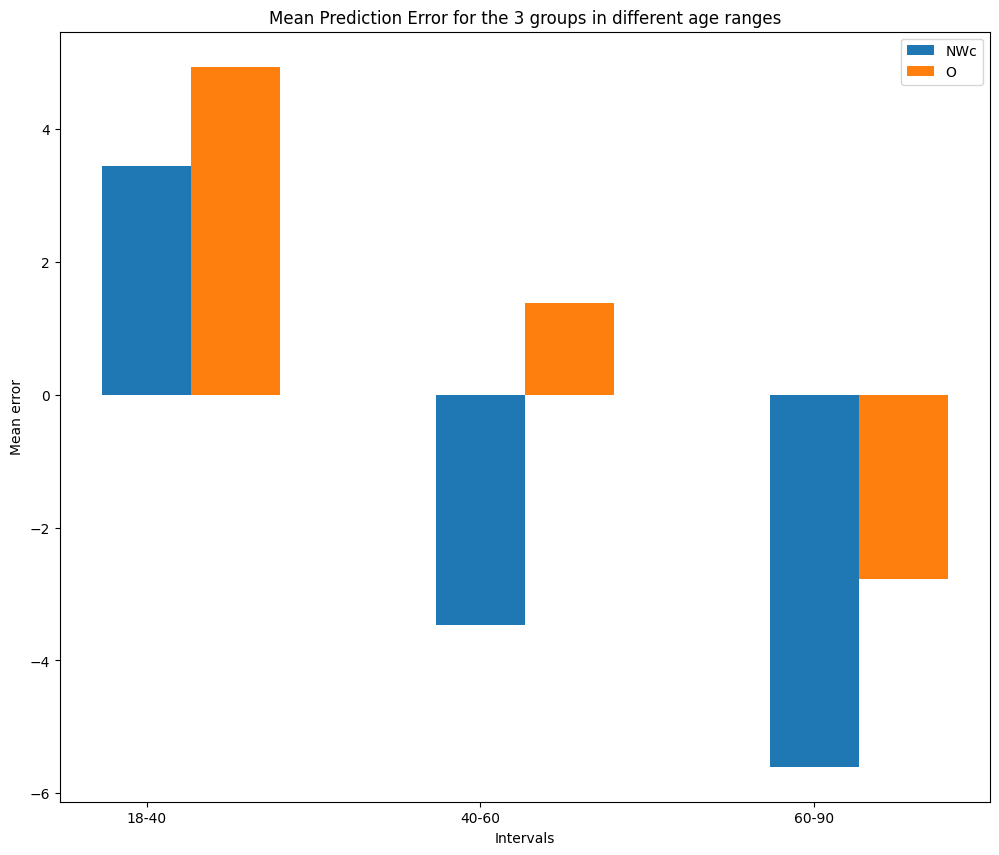

In [88]:
barfig = plt.figure(figsize=(12, 10))
labels_df = ['NWc', 'O']
inter = np.arange(len(intervals)) * 3
for lab in range(len(labels_df)):
    plt.bar(inter + lab * 0.8, dataf_means[lab], label=labels_df[lab])
plt.xticks(inter, intervals)
plt.xlabel("Intervals")
plt.ylabel("Mean error")
plt.title("Mean Prediction Error for the 3 groups in different age ranges")
plt.legend()
plt.show()

###Stats (Age Group)

In [89]:
for bin_i in range(len(errors_df[0])):
    print('\n#### BIN [', bins[bin_i], '-', bins[bin_i + 1], '] ####\n')
    print('####### t-test #######')
    ob_nw_tt = stats.ttest_ind(errors_df[0][bin_i], errors_df[1][bin_i], equal_var=False)
    print('norm test and obese:', ob_nw_tt.pvalue)


#### BIN [ 18 - 40 ] ####

####### t-test #######
norm test and obese: 0.5942746516029856

#### BIN [ 40 - 60 ] ####

####### t-test #######
norm test and obese: 0.02997727961384341

#### BIN [ 60 - 90 ] ####

####### t-test #######
norm test and obese: 0.06370328056219078


##CORRECTIONS


Correction on Residuals

In [90]:
fig_reg_gm = px.scatter(norm_gm_df, x='true age', y='error', labels={'x': 'true age', 'y': 'prediction error'},
                        trendline="ols", height=600, width=800)
#trace = go.Scatter(x=[18,100],y=[0,0], mode='lines', line_color='black', name='no prediction error')
#trace.update(showlegend=False)
#fig6.add_trace(trace, row='all', col='all')
#fig6.update_traces(selector=-1, showlegend=True)
fig_reg_gm.show()

In [91]:
b0, b1 = px.get_trendline_results(fig_reg_gm).px_fit_results.iloc[0].params
print('intercept:', b0)
print('slope:', b1)

intercept: 10.46751854406374
slope: -0.20228301692218112


In [92]:
corr_tr = norm_gm_df['prediction'] - (b1 * norm_gm_df['true age'] + b0)
corr_nw = gm_test_df['prediction'] - (b1 * gm_test_df['test true age'] + b0)
corr_ob = ob_gm_pred - (b1 * ob_age + b0)

In [93]:
corr_err_tr = corr_tr - norm_gm_df['true age']
corr_err_ob = corr_ob - ob_age
corr_err_nw = corr_nw - gm_test_df['test true age']
correction_train = pd.DataFrame({'true age': norm_gm_df['true age'], 'corr_pred': corr_tr, 'corr_res': corr_err_tr,
                                 'group': np.repeat('TR', len(norm_gm_df['true age']))})
correction_nw_df = pd.DataFrame({'true age': gm_test_df['test true age'], 'corr_pred': corr_nw, 'corr_res': corr_err_nw,
                                 'group': np.repeat('NWc', len(gm_test_df['test true age']))})
correction_ob_df = pd.DataFrame(
    {'true age': ob_age, 'corr_pred': corr_ob, 'corr_res': corr_err_ob, 'group': np.repeat('O', len(ob_age))})
tot_corr = pd.concat([correction_train, correction_nw_df, correction_ob_df])

In [94]:
alt_fig = px.scatter(tot_corr, x='true age', y='corr_res', labels={'x': 'true age', 'y': 'corr_pred_error'},
                     trendline="ols", height=600, facet_col='group')
alt_fig.update_xaxes(showgrid=False)
alt_fig.update_yaxes(showline=True, linecolor='black', showgrid=False)
alt_fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
)
alt_fig.for_each_yaxis(lambda yax: yax.update(showticklabels=True))
alt_fig.show()

In [95]:
fig93 = px.scatter(tot_corr, x='true age', y='corr_pred', labels={'x': 'true age', 'y': 'corr_pred_error'}, height=600,
                   facet_col='group')
fig93.update_xaxes(showgrid=False)
fig93.update_yaxes(showline=True, linecolor='black', showgrid=False)
fig93.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
)
fig93.for_each_yaxis(lambda yax: yax.update(showticklabels=True))
trace = go.Scatter(x=[18, 90], y=[18, 90], mode='lines', line_color='red', name='optimal prediction')
trace.update(showlegend=False)
fig93.add_trace(trace, row='all', col='all')
fig93.show()

####Statistics (Corrections)

In [96]:
print('R2 TRAIN:', metrics.r2_score(norm_gm_df['true age'], corr_tr))
print('R2 NW:', metrics.r2_score(gm_test_df['test true age'], corr_nw))
print('R2 OB:', metrics.r2_score(ob_age, corr_ob))

R2 TRAIN: 0.8501551735026976
R2 NW: 0.7756328704560617
R2 OB: 0.7971096631045749


In [97]:
print('MAE TR:', np.abs(corr_err_tr).mean())
print('MAE NW:', np.abs(corr_err_nw).mean())
print('MAE OB:', np.abs(corr_err_ob).mean())


MAE TR: 5.724728797243596
MAE NW: 5.988843228244455
MAE OB: 5.850201871505076


In [98]:
print('MEAN ERROR TR:', corr_err_tr.mean())
print('MEAN ERROR NW:', corr_err_nw.mean())
print('MEAN ERROR OB:', corr_err_ob.mean())

MEAN ERROR TR: -6.298439762970417e-15
MEAN ERROR NW: -1.6925682173079843
MEAN ERROR OB: 1.4028007402203289


In [99]:
print('NW mean residuals:', round(corr_err_nw.mean(), 2), 'std', round(corr_err_nw.std(), 2))
print('O mean residuals:', round(corr_err_ob.mean(), 2), 'std:', round(corr_err_ob.std(), 2))
print('O-NW:', round(corr_err_ob.mean() - corr_err_nw.mean(), 2))

NW mean residuals: -1.69 std 7.57
O mean residuals: 1.4 std: 7.18
O-NW: 3.1


In [100]:
stats.ttest_ind(corr_err_ob, corr_err_nw, equal_var=False)

TtestResult(statistic=2.7017663953848894, pvalue=0.0076245113382968875, df=163.54785438455272)

In [101]:
intervals = []
small_gm_df = [correction_nw_df, correction_ob_df]
corr_dataf_means = [[], []]
corr_errors_df = [[], []]
corr_std_devs = [[], []]
for bin_id in range(len(bins) - 1):
    intervals.append(str(bins[bin_id]) + '-' + str(bins[bin_id + 1]))
    for dfi in range(len(small_gm_df)):
        dataf_bin = small_gm_df[dfi]
        dfi_bin = dataf_bin[(bins[bin_id] <= dataf_bin['true age']) & (dataf_bin['true age'] < bins[bin_id + 1])]
        errors = dfi_bin['corr_res'].values
        corr_errors_df[dfi].append(errors)
        corr_dataf_means[dfi].append(errors.mean())
        corr_std_devs[dfi].append(errors.std())
print(intervals)
print(corr_dataf_means)
print(corr_std_devs)

['18-40', '40-60', '60-90']
[[-0.21015759024829617, -3.5708722630832495, -1.2594590685766986], [1.1745362402795365, 1.3093997156189883, 1.496812650538682]]
[[7.700818660506982, 6.4808054874476175, 7.7435362645798875], [5.221184079691176, 7.023995058222776, 7.572898902829771]]


In [102]:
for bin_i in range(len(corr_errors_df[0])):
    print('\n#### BIN [', bins[bin_i], '-', bins[bin_i + 1], '] ####\n')
    print('####### t-test #######')
    ob_nw_tt = stats.ttest_ind(corr_errors_df[1][bin_i], corr_errors_df[0][bin_i], equal_var=False)
    print('norm test and obese (pvalue):', round(ob_nw_tt.pvalue, 3))
    print('norm test and obese (t):', round(ob_nw_tt.statistic, 3))
    print('rel t-test:', round(stats.ttest_rel(corr_errors_df[1][bin_i], corr_errors_df[0][bin_i]).pvalue, 3))
    print('NW: ', round(corr_dataf_means[0][bin_i], 2),
          '(' + u"\u00B1" + ' ' + str(round(corr_std_devs[0][bin_i], 2)) + ')')
    print('O: ', round(corr_dataf_means[1][bin_i], 2),
          '(' + u"\u00B1" + ' ' + str(round(corr_std_devs[1][bin_i], 2)) + ')')
    print('O-NW: ', round(corr_dataf_means[1][bin_i] - corr_dataf_means[0][bin_i], 2))


#### BIN [ 18 - 40 ] ####

####### t-test #######
norm test and obese (pvalue): 0.627
norm test and obese (t): 0.494
rel t-test: 0.676
NW:  -0.21 (± 7.7)
O:  1.17 (± 5.22)
O-NW:  1.38

#### BIN [ 40 - 60 ] ####

####### t-test #######
norm test and obese (pvalue): 0.028
norm test and obese (t): 2.284
rel t-test: 0.045
NW:  -3.57 (± 6.48)
O:  1.31 (± 7.02)
O-NW:  4.88

#### BIN [ 60 - 90 ] ####

####### t-test #######
norm test and obese (pvalue): 0.078
norm test and obese (t): 1.781
rel t-test: 0.064
NW:  -1.26 (± 7.74)
O:  1.5 (± 7.57)
O-NW:  2.76


## Representations (entire datasets)

In [103]:
fig6 = px.scatter(tot_corr, x='true age', y='corr_res', labels={'x': 'true age', 'y': 'z (prediction error)'},
                  trendline="ols", height=600, facet_col='group')
fig6.update_traces(selector=-1, showlegend=True)
fig6.update_xaxes(showgrid=False)
fig6.update_yaxes(showline=True, linecolor='black', showgrid=False)
fig6.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
)
fig6.for_each_yaxis(lambda yax: yax.update(showticklabels=True))
fig6.show()

Text(0.5, 0, 'Corrected Brain Age Delta')

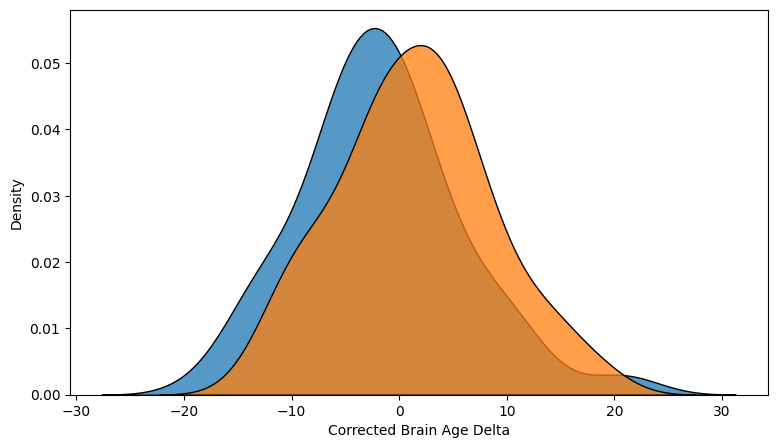

In [104]:
fig_corr = plt.figure(figsize=(9, 5))
kd1 = sns.kdeplot(correction_nw_df, x='corr_res', multiple='stack', label='NWc')
kd2 = sns.kdeplot(correction_ob_df, x='corr_res', multiple='stack', label='O')
plt.xlabel('Corrected Brain Age Delta')

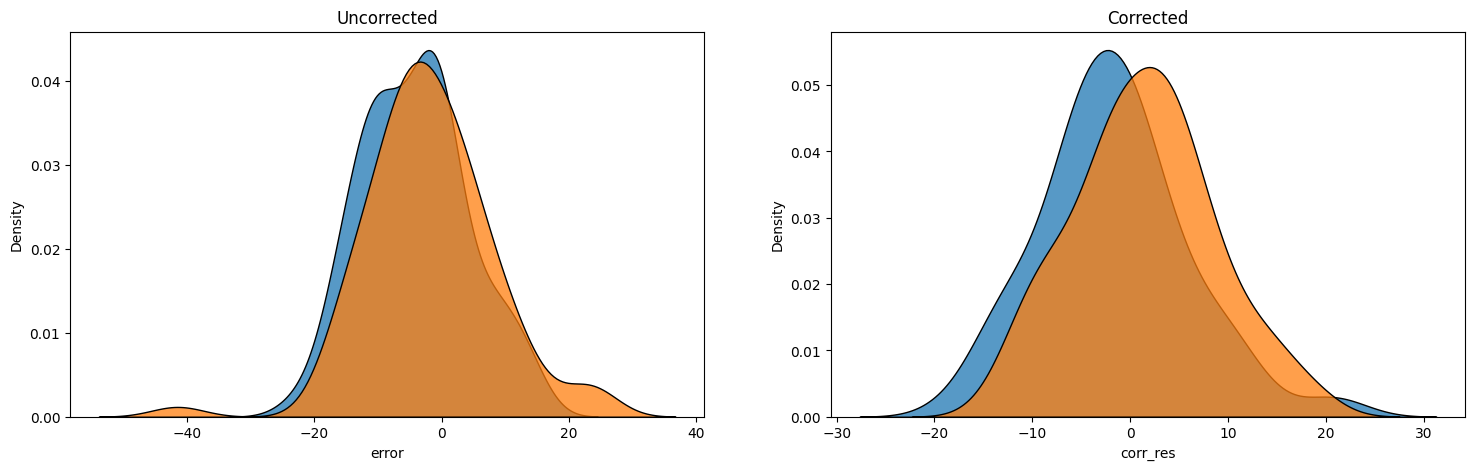

In [105]:
fig10, axes = plt.subplots(ncols=2, figsize=(18, 5))
kd1 = sns.kdeplot(test_ss_df, x='error', multiple='stack', label='NWc', ax=axes[0])
kd2 = sns.kdeplot(ob_df, x='error', multiple='stack', label='O', ax=axes[0])
kd1 = sns.kdeplot(correction_nw_df, x='corr_res', multiple='stack', label='NWc', ax=axes[1])
kd2 = sns.kdeplot(correction_ob_df, x='corr_res', multiple='stack', label='O', ax=axes[1])
axes[0].title.set_text('Uncorrected')
axes[1].title.set_text('Corrected')

Text(0, 0.5, 'Corrected Brain Age Delta')

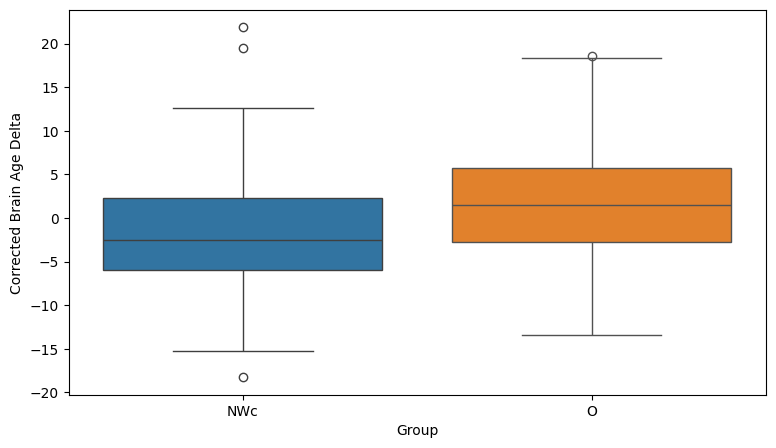

In [106]:
fig_cor2 = plt.figure(figsize=(9, 5))
sns.boxplot(data=correction_nw_df, x='group', y='corr_res')
sns.boxplot(data=correction_ob_df, x='group', y='corr_res')
plt.xlabel('Group')
plt.ylabel('Corrected Brain Age Delta')

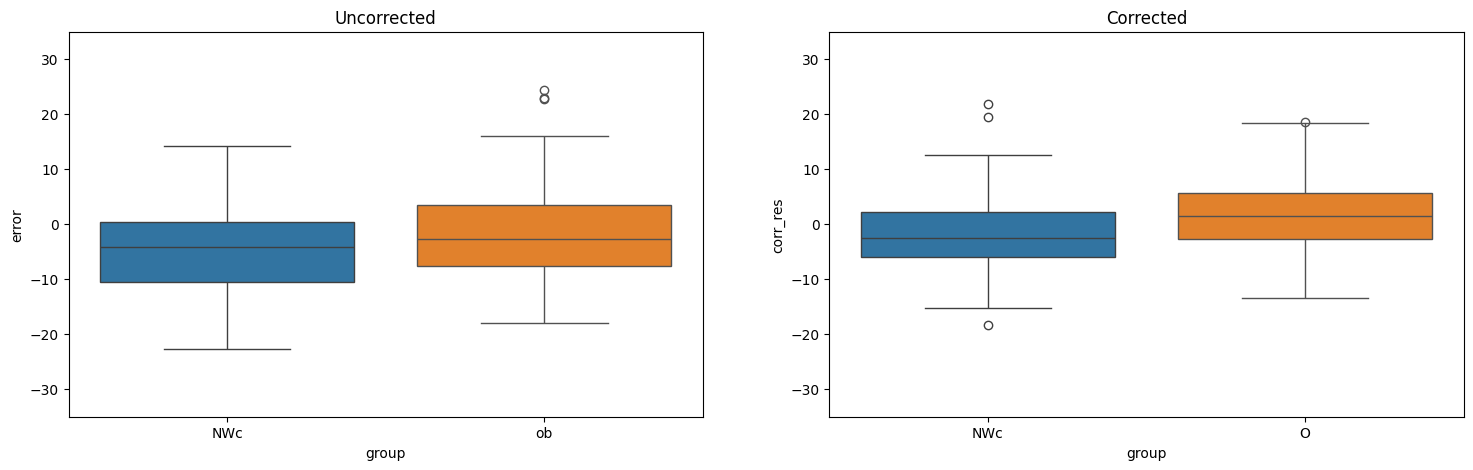

In [107]:
fig11, axes = plt.subplots(ncols=2, figsize=(18, 5))
sns.boxplot(data=test_ss_df, x='group', y='error', ax=axes[0])
sns.boxplot(data=ob_df, x='group', y='error', ax=axes[0])
sns.boxplot(data=correction_nw_df, x='group', y='corr_res', ax=axes[1])
sns.boxplot(data=correction_ob_df, x='group', y='corr_res', ax=axes[1])
axes[0].set_ylim(-35, 35)
axes[1].set_ylim(-35, 35)
axes[0].title.set_text('Uncorrected')
axes[1].title.set_text('Corrected')

In [108]:
bins = [18, 40, 60, 90]

<Figure size 1800x500 with 0 Axes>

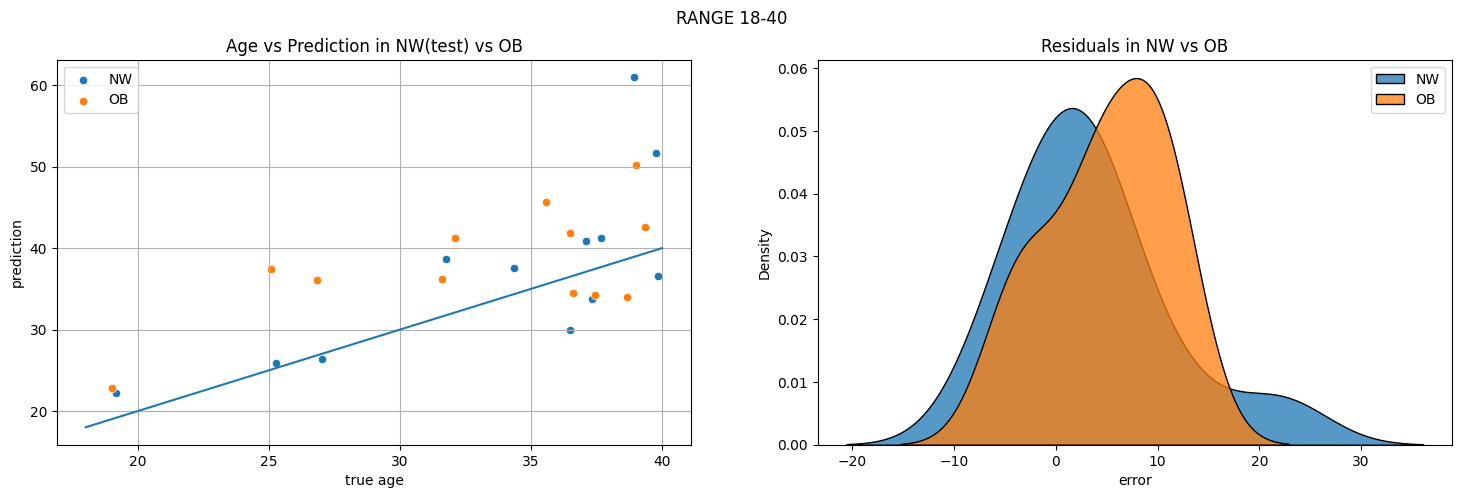

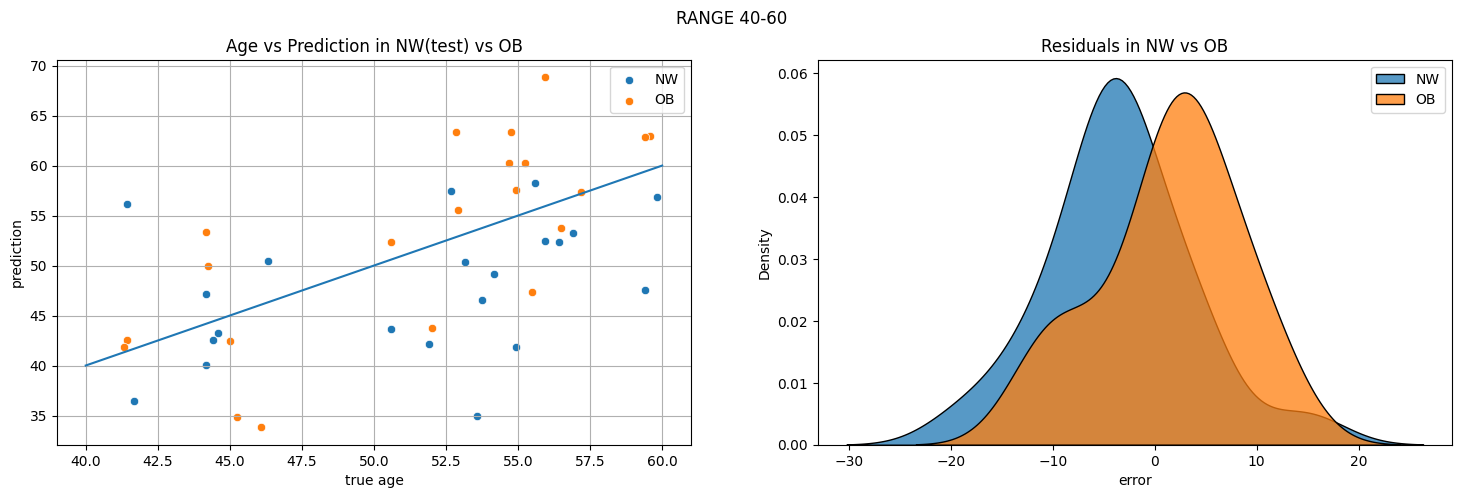

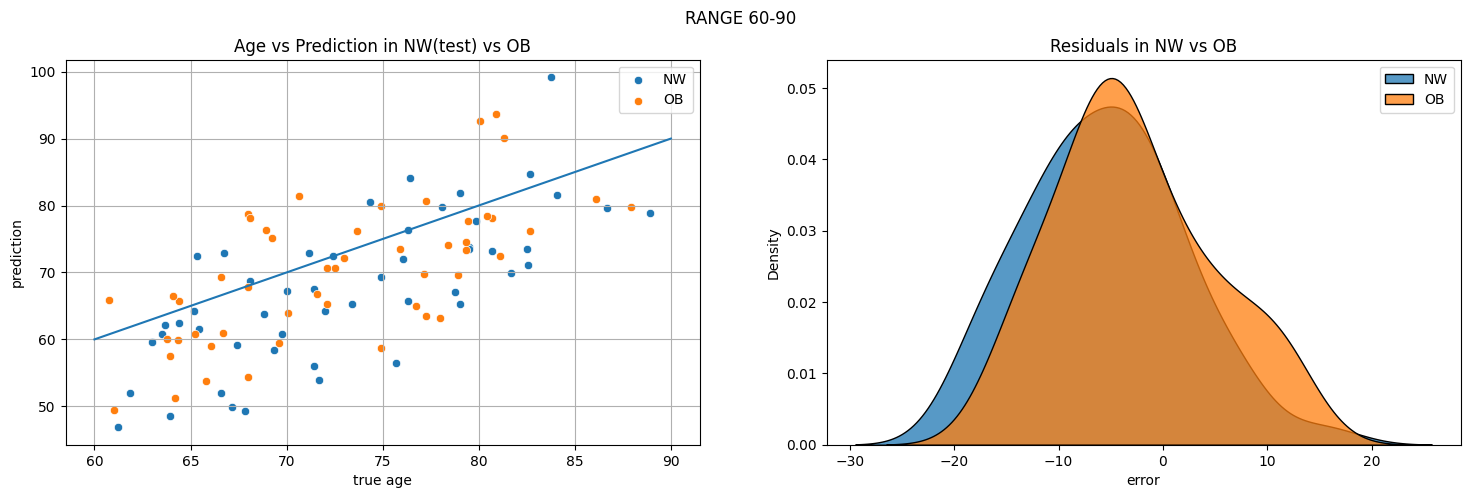

In [109]:
fig11 = plt.figure(layout='constrained', figsize=(18, 5))
subfig = fig11.subfigures(len(bins) - 1, 1)
small_df = [ob_gm_df]
labels_df = ['OB']
for bin_id in range(len(bins) - 1):
    subfig[bin_id], axes = plt.subplots(ncols=2, figsize=(18, 5))
    subfig[bin_id].suptitle('RANGE ' + str(bins[bin_id]) + '-' + str(bins[bin_id + 1]))
    dataf_bin = small_df[0]
    test_bin_df = test_gm_df[(bins[bin_id] < test_gm_df['true age']) & (test_gm_df['true age'] < bins[bin_id + 1])]
    dfi_bin = dataf_bin[(bins[bin_id] <= dataf_bin['true age']) & (dataf_bin['true age'] < bins[bin_id + 1])]
    sc1 = sns.scatterplot(test_bin_df, x='true age', y='prediction', ax=axes[0], label='NW')
    sc2 = sns.scatterplot(dfi_bin, x='true age', y='prediction', ax=axes[0], label=labels_df[0])
    sns.lineplot(x=[bins[bin_id], bins[bin_id + 1]], y=[bins[bin_id], bins[bin_id + 1]], ax=axes[0])
    kd1 = sns.kdeplot(test_bin_df, x='error', ax=axes[1], multiple='stack', label='NW')
    kd2 = sns.kdeplot(dfi_bin, x='error', ax=axes[1], multiple='stack', label=labels_df[0])
    axes[0].title.set_text('Age vs Prediction in NW(test) vs ' + labels_df[0])
    axes[1].title.set_text('Residuals in NW vs ' + labels_df[0])
    axes[0].legend()
    axes[1].legend()
    axes[0].grid()

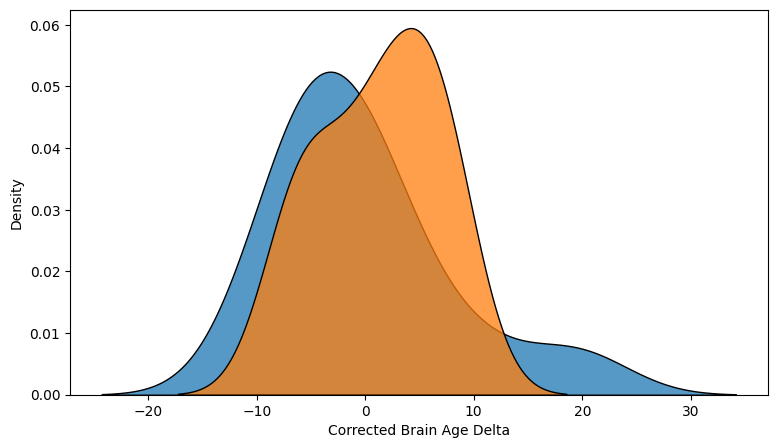

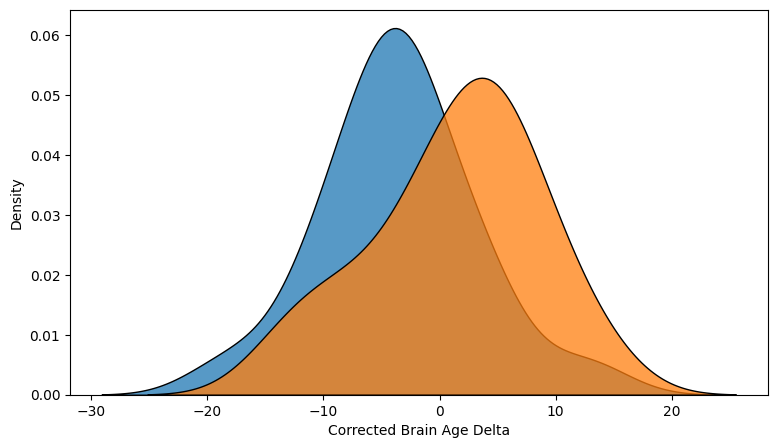

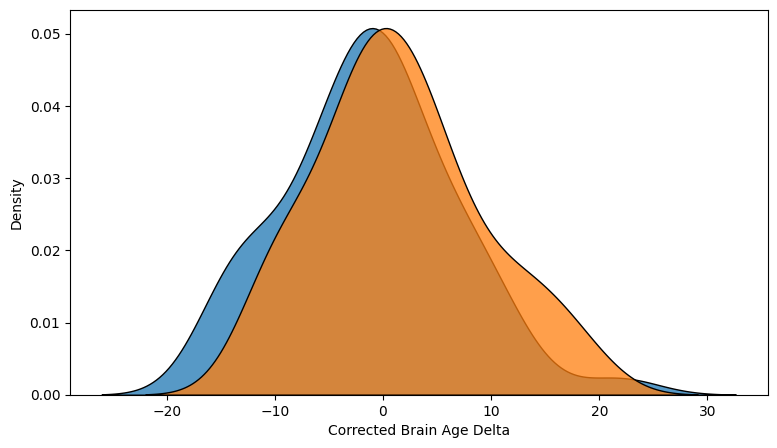

In [110]:
for bin_id in range(len(bins) - 1):
    corr_fig3 = plt.figure(figsize=(9, 5))
    corr_test_bin_df = correction_nw_df[
        (bins[bin_id] < correction_nw_df['true age']) & (correction_nw_df['true age'] < bins[bin_id + 1])]
    corr_ob_bin = correction_ob_df[
        (bins[bin_id] <= correction_ob_df['true age']) & (correction_ob_df['true age'] < bins[bin_id + 1])]
    kd1 = sns.kdeplot(corr_test_bin_df, x='corr_res', multiple='stack', label='NW')
    kd2 = sns.kdeplot(corr_ob_bin, x='corr_res', multiple='stack', label='O')
    plt.xlabel('Corrected Brain Age Delta')

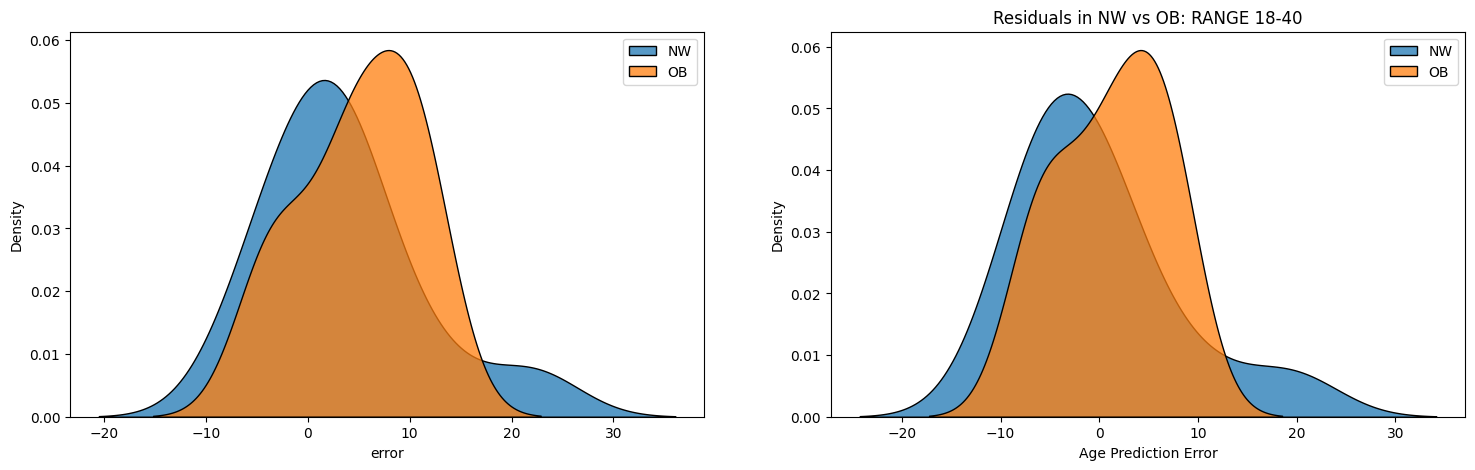

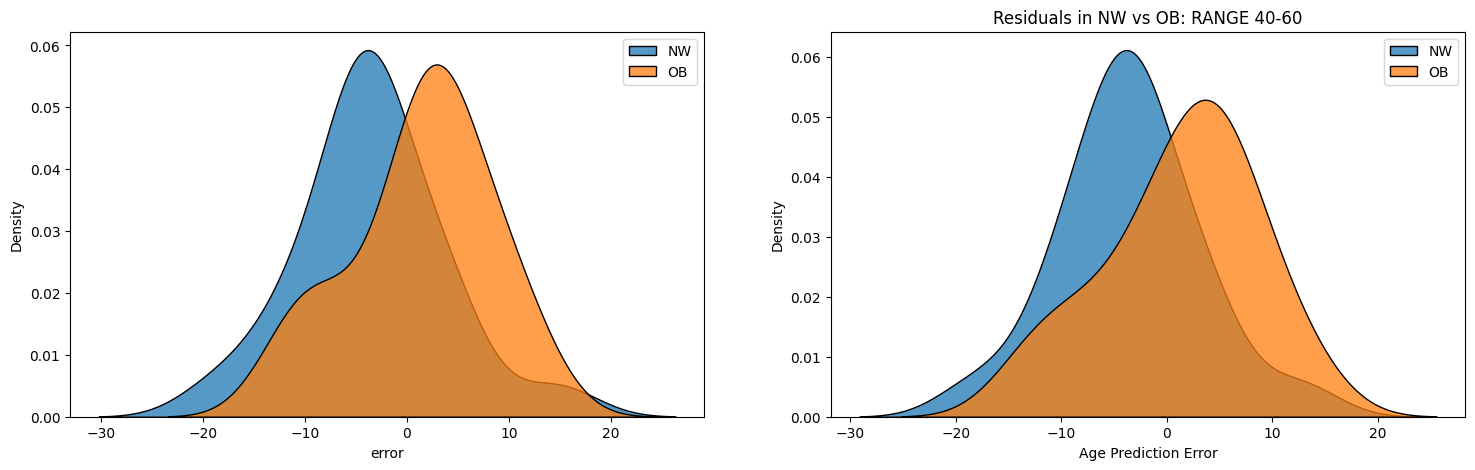

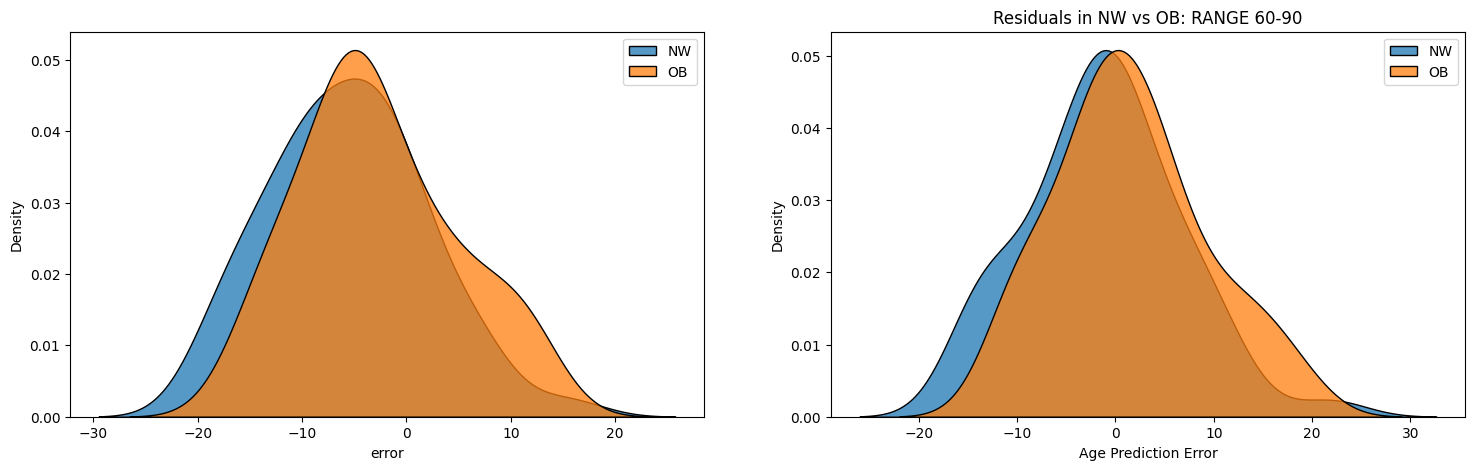

In [111]:

small_df = [ob_gm_df]
labels_df = ['OB']
for bin_id in range(len(bins) - 1):
    fig1, axes = plt.subplots(ncols=2, figsize=(18, 5))
    plt.title('Residuals in NW vs ' + labels_df[0] + ': RANGE ' + str(bins[bin_id]) + '-' + str(bins[bin_id + 1]))
    dataf_bin = small_df[0]
    test_bin_df = test_gm_df[(bins[bin_id] < test_gm_df['true age']) & (test_gm_df['true age'] < bins[bin_id + 1])]
    corr_test_bin_df = correction_nw_df[
        (bins[bin_id] < correction_nw_df['true age']) & (correction_nw_df['true age'] < bins[bin_id + 1])]
    dfi_bin = dataf_bin[(bins[bin_id] <= dataf_bin['true age']) & (dataf_bin['true age'] < bins[bin_id + 1])]
    corr_ob_bin = correction_ob_df[
        (bins[bin_id] <= correction_ob_df['true age']) & (correction_ob_df['true age'] < bins[bin_id + 1])]
    kd1 = sns.kdeplot(test_bin_df, x='error', multiple='stack', label='NW', ax=axes[0])
    kd2 = sns.kdeplot(dfi_bin, x='error', multiple='stack', label=labels_df[0], ax=axes[0])
    kd1 = sns.kdeplot(corr_test_bin_df, x='corr_res', multiple='stack', label='NW', ax=axes[1])
    kd2 = sns.kdeplot(corr_ob_bin, x='corr_res', multiple='stack', label=labels_df[0], ax=axes[1])
    plt.xlabel('Age Prediction Error')
    axes[0].legend()
    axes[1].legend()
    plt.show()

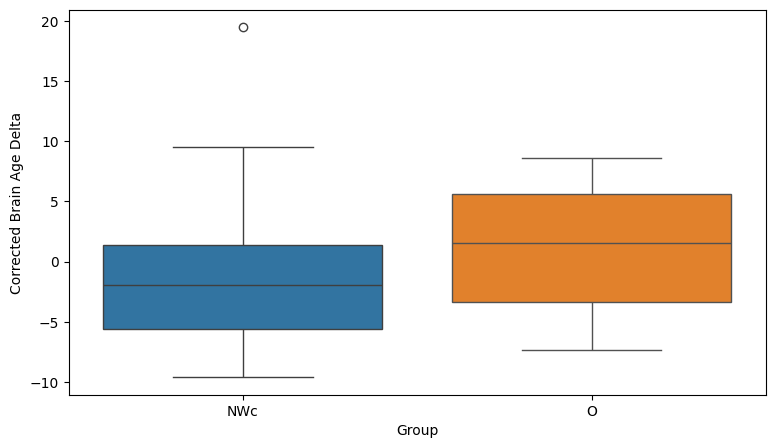

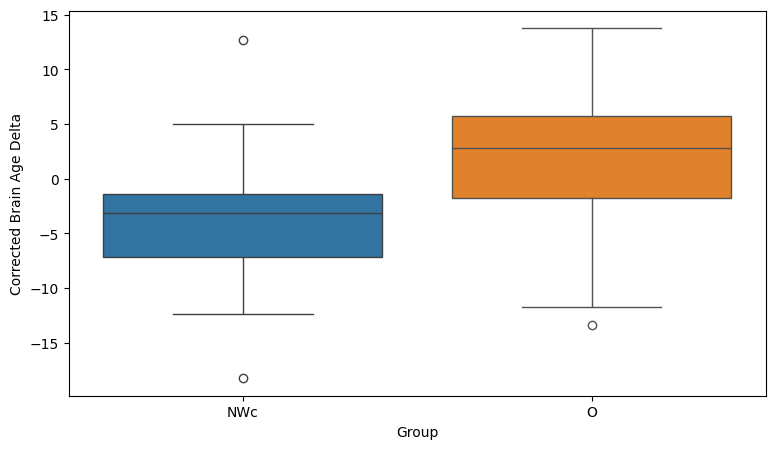

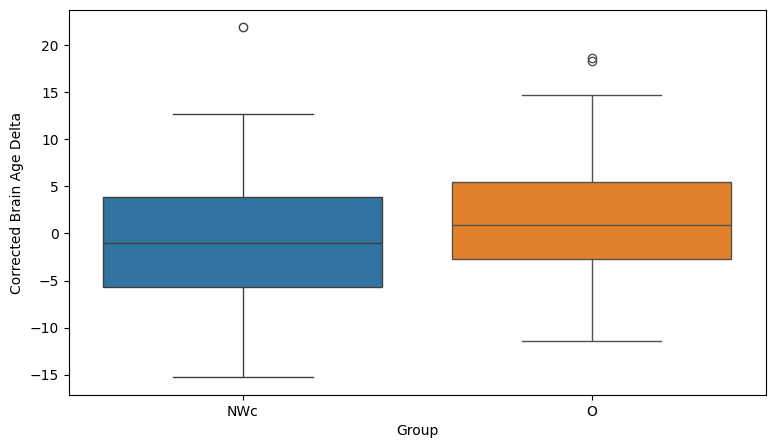

In [112]:
for bin_id in range(len(bins) - 1):
    corr_fig3 = plt.figure(figsize=(9, 5))
    corr_test_bin_df = correction_nw_df[
        (bins[bin_id] < correction_nw_df['true age']) & (correction_nw_df['true age'] < bins[bin_id + 1])]
    corr_ob_bin = correction_ob_df[
        (bins[bin_id] <= correction_ob_df['true age']) & (correction_ob_df['true age'] < bins[bin_id + 1])]
    kd1 = sns.boxplot(corr_test_bin_df, x='group', y='corr_res')
    kd2 = sns.boxplot(corr_ob_bin, x='group', y='corr_res')
    plt.xlabel('Group')
    plt.ylabel('Corrected Brain Age Delta')

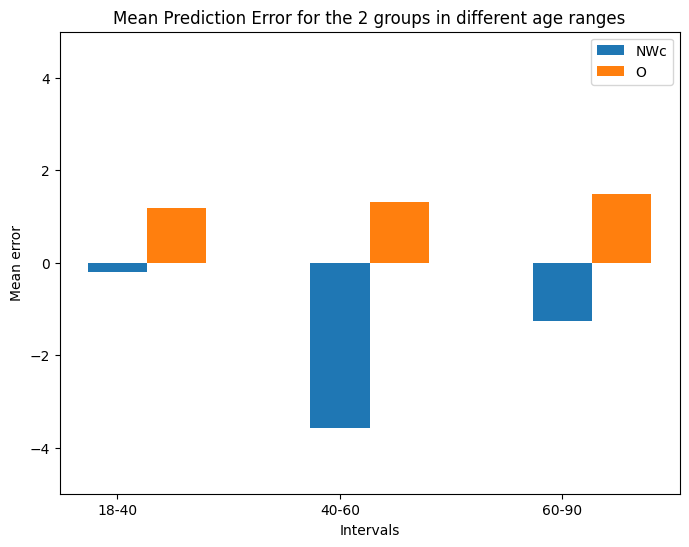

In [113]:
barfig = plt.figure(figsize=(8, 6))
labels_df = ['NWc', 'O']
inter = np.arange(len(intervals)) * 3
for lab in range(len(labels_df)):
    plt.bar(inter + lab * 0.8, corr_dataf_means[lab], label=labels_df[lab])
plt.xticks(inter, intervals)
plt.xlabel("Intervals")
plt.ylabel("Mean error")
plt.title("Mean Prediction Error for the 2 groups in different age ranges")
plt.legend()
plt.ylim(-5, 5)
plt.show()

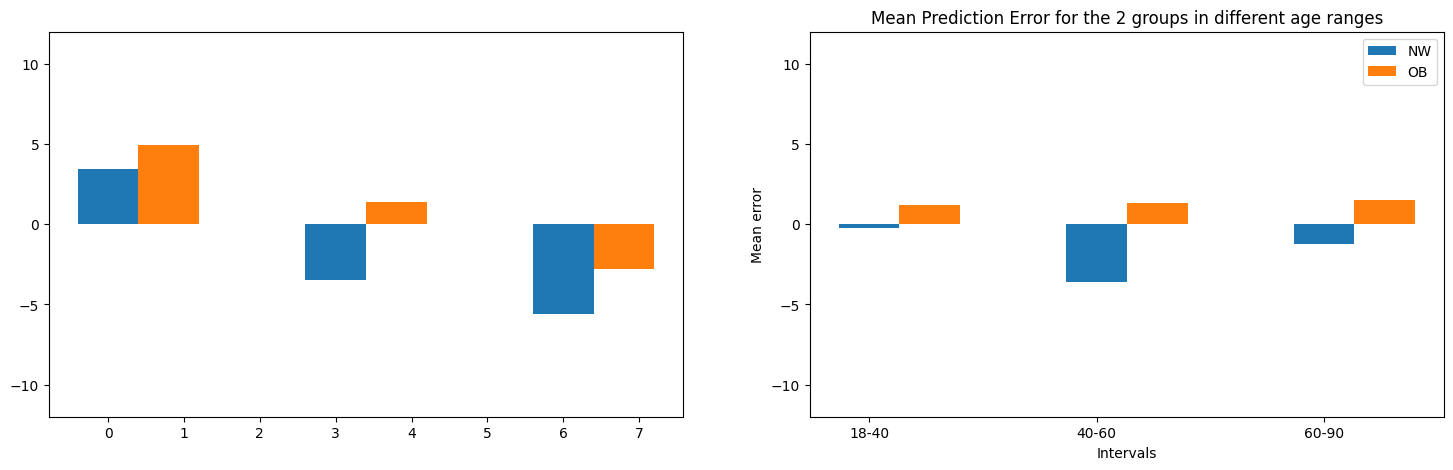

In [114]:
barfig, axes = plt.subplots(ncols=2, figsize=(18, 5))
labels_df = ['NW', 'OB']
inter = np.arange(len(intervals)) * 3
for lab in range(len(labels_df)):
    axes[0].bar(inter + lab * 0.8, dataf_means[lab], label=labels_df[lab])
    axes[1].bar(inter + lab * 0.8, corr_dataf_means[lab], label=labels_df[lab])
axes[0].set_ylim(-12, 12)
axes[1].set_ylim(-12, 12)
plt.xticks(inter, intervals)
plt.xlabel("Intervals")
plt.ylabel("Mean error")
plt.title("Mean Prediction Error for the 2 groups in different age ranges")
plt.legend()
plt.show()

###Representation (Correlation)

In [115]:
corr_nw_40_60 = correction_nw_df[(40 <= correction_nw_df['true age']) & (correction_nw_df['true age'] < 60)]
corr_ob_40_60 = correction_ob_df[(40 <= correction_ob_df['true age']) & (correction_ob_df['true age'] < 60)]

In [116]:
corr_nw_40_60['BMI'] = data.loc[corr_nw_40_60.index].BMI
corr_ob_40_60['BMI'] = data.loc[corr_ob_40_60.index].BMI

<ipython-input-116-92ba2063840e>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-116-92ba2063840e>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



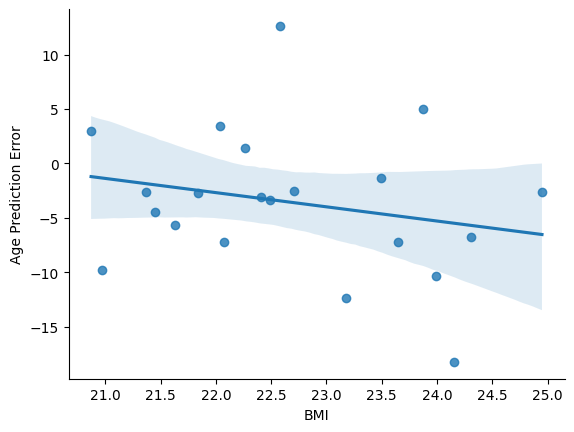

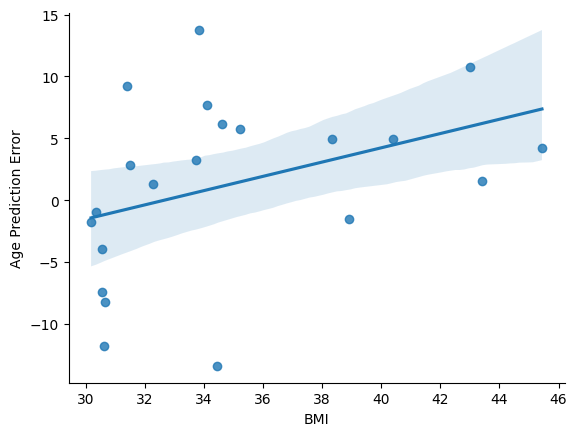

In [117]:
sns.regplot(corr_nw_40_60, x='BMI', y='corr_res')
plt.ylabel('Age Prediction Error')
sns.despine(left=False, bottom=False, right=True)
plt.show()
sns.regplot(corr_ob_40_60, x='BMI', y='corr_res')
plt.ylabel('Age Prediction Error')
sns.despine(left=False, bottom=False, right=True)
plt.show()

In [118]:
np.corrcoef(corr_nw_40_60['BMI'], corr_nw_40_60['corr_res'])

array([[ 1.        , -0.22947293],
       [-0.22947293,  1.        ]])

In [119]:
np.corrcoef(corr_ob_40_60['BMI'], corr_ob_40_60['corr_res'])

array([[1.        , 0.38369759],
       [0.38369759, 1.        ]])

In [120]:
stats.pearsonr(corr_ob_40_60['BMI'], corr_ob_40_60['corr_res'], alternative='greater')

PearsonRResult(statistic=0.3836975883265427, pvalue=0.04298117077710252)

# Classification

MRI-derived measures yielding significant differences in age prediction error (only GM) between O and NWc were also used to train models for classification of the obesity status.

In [121]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn import metrics
from typing import final
from typing_extensions import final
from sklearn.linear_model import LogisticRegressionCV

In [122]:
norm_ob_index = np.concatenate((norm_test.index, obese_ss.index))
print(norm_ob_index.shape)

(166,)


In [123]:
norm_ob_data = data.loc[norm_ob_index]
norm_ob_label = norm_ob_data.Group
norm_ob_ages = norm_ob_data.Age.values
norm_ob_gender = norm_ob_data.Sex.values
norm_ages = (norm_ob_ages - np.mean(norm_ob_ages)) / np.std(norm_ob_ages)

In [124]:
final_labels = []
for i in range(len(norm_ob_label)):
    if norm_ob_label.iloc[i] == 1:
        final_labels.append(0)
    else:
        final_labels.append(1)
final_labels = np.array(final_labels)

## GM

In [125]:
norm_ob_data = data.loc[norm_ob_index]
norm_ob_label = norm_ob_data.Group
norm_ob_ages = norm_ob_data.Age.values
norm_ob_gender = norm_ob_data.Sex.values


In [126]:
norm_ob_gm = gm_values[norm_ob_index]


In [127]:
norm_ob_gm.shape

(166, 48)

Area under the curve (AUC), sensitivity (SE) and specificity (SP) were utilized to evaluate the predictive performance of the different models.

This was done using the following implemented function (calculate_metrics).

In [128]:
from sklearn.metrics import roc_auc_score, recall_score, confusion_matrix

In [129]:
def calculate_metrics(y_true, y_pred_prob):
    # Convert probabilities to binary predictions based on the threshold
    fpr, tpr, threshold = metrics.roc_curve(y_true, y_pred_prob)
    difference_tpr_fpr = tpr - fpr  ##jouden j statistics is a statistic that captures the performance of a dichotomous diagnostic test
    optimal_threshold = threshold[np.argmax(difference_tpr_fpr)]
    y_pred = (y_pred_prob >= optimal_threshold).astype(int)

    # Calculate AUC
    auc = metrics.auc(fpr, tpr)
    tn, fp, fn, tp = metrics.confusion_matrix(y_true, y_pred).ravel()

    # Compute sensitivity (TPR) and specificity (1 - FPR)
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    return auc, sensitivity, specificity

In [130]:
np.isnan(np.full(norm_ob_gm.shape[0], np.nan)).any()

True

In [131]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

In [132]:
final_labels[norm_ob_ages < 40].shape

(24,)

 The dataset was split into 10 folds with a k-fold cross-validation scheme stratified by age. To ensure more stable results, this process was repeated 10 times using RepeatedStratifiedKFold function

In [133]:
classifiers = ['XGBClassifier', 'Logistic Regression', 'SVC']
classifier = classifiers[1]
rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=10)
rskf.get_n_splits(norm_ob_gm, final_labels)
test_preds = np.full(norm_ob_gm.shape[0], np.nan)
results = []
model_coefficients = []
aucs_age_range = [[], [], []]
specificity_age_range = [[], [], []]
sensitivity_age_range = [[], [], []]
for i, (train_index, test_index) in enumerate(rskf.split(norm_ob_gm, final_labels)):
    print(f"Fold {i}:")
    #print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")
    norm_ages = (norm_ob_ages - np.mean(norm_ob_ages[train_index])) / np.std(norm_ob_ages[train_index])
    norm_gm_values = (norm_ob_gm - np.mean(norm_ob_gm[train_index])) / np.std(norm_ob_gm[train_index], axis=None)
    x_class = np.array(
        [np.concatenate((norm_gm_values[i, :], np.array([norm_ages[i]]), np.array([norm_ob_gender[i]]))) for i in
         range(norm_gm_values.shape[0])])
    if classifier == 'Logistic Regression':
        #model = LogisticRegressionCV(cv=10, Cs=np.logspace(-4, 4, num=20), max_iter=2000, class_weight='balanced')
        model = LogisticRegression(max_iter=2000, class_weight='balanced')
        model = GridSearchCV(model, param_grid={'C': np.logspace(-4, 4, num=30),
                                                'tol': [3, 2, 1, 0.5, 0.05, 0.1, 0.01, 0.005, 0.001, 0.0001]},
                             # 3, 2, 1, 0.5, 0.005, 0.001, 0.0001]},
                             scoring='neg_log_loss', cv=10)
    elif classifier == 'XGBClassifier':
        model = XGBClassifier()  #scale_pos_weight = np.sum(np.array(final_labels)==0)/np.sum(np.array(final_labels)==1))
        model = GridSearchCV(model, param_grid={'n_estimators': [5, 10, 15, 20], 'max_depth': [2, 3, 4, 5, 6, 7],
                                                'learning_rate': [0.05, 0.1, 0.3, 0.5]},
                             scoring='neg_log_loss', cv=10,
                             refit=True)  #scoring: neg_log_loss, n_est: [5,10,15], max_depth: [2,3,4,5,6,7]
    elif classifier == 'SVC':
        model = SVC(kernel='linear', class_weight='balanced', probability=True, max_iter=10000)
        model = GridSearchCV(model, param_grid={'C': np.logspace(-4, 4, num=20), 'tol': [0.01, 0.001, 0.0001]},
                             scoring='neg_log_loss', cv=10)
    else:
        raise ValueError('Wrong classifier')

    model.fit(x_class[train_index], np.array(final_labels)[train_index])
    #model_Cs.append(model.C_)
    #coeffs.append(model.coef_)
    #model_parameters.append(model.get_params())
    test_preds[test_index] = model.predict_proba(x_class[test_index])[:, 1]
    if not np.isnan(test_preds).any():
        auc_0, sensitivity_0, specificity_0 = calculate_metrics(np.array(final_labels), test_preds)
        print('AUC:', auc_0)
        print('Sensitivity:', sensitivity_0)
        print('Specificity:', specificity_0)
        if classifier == 'XGBClassifier':
            print(model.best_params_)
        results.append({'AUC': auc_0,
                        'sensitivity': sensitivity_0,
                        'specificity': specificity_0,
                        })
        results.append(model.best_params_)
        model_coefficients.append(model.best_estimator_.coef_)
        age_ranges = [18, 40, 60, 90]
        for age_range_i in range(len(age_ranges) - 1):
            auc_1, sensitivity_1, specificity_1 = calculate_metrics(
                np.array(final_labels)[(norm_ob_ages >= age_ranges[age_range_i])
                                       & (norm_ob_ages < age_ranges[age_range_i + 1])],
                test_preds[(norm_ob_ages >= age_ranges[age_range_i]) & (norm_ob_ages < age_ranges[age_range_i + 1])])
            aucs_age_range[age_range_i].append(auc_1)
            sensitivity_age_range[age_range_i].append(sensitivity_1)
            specificity_age_range[age_range_i].append(specificity_1)
        test_preds = np.full(norm_ob_gm.shape[0], np.nan)

results = pd.DataFrame(results)
print(f'Mean AUC: {results.AUC.mean()}')
print(f'Mean sensitivity: {results.sensitivity.mean()}')
print(f'Mean specificity: {results.specificity.mean()}')

Fold 0:
  Test:  index=[  1  19  20  29  33  43  63  67  74 103 112 125 131 142 149 156 158]
Fold 1:
  Test:  index=[  6   8  10  30  35  41  58  71  81  89  90  91 136 137 148 150 152]
Fold 2:
  Test:  index=[ 14  18  23  27  51  59  61  66  79  83  96 107 135 140 155 157 163]
Fold 3:
  Test:  index=[ 16  24  26  36  42  56  62  75  93  95 100 117 119 122 129 141 143]
Fold 4:
  Test:  index=[  2  38  45  46  47  57  72  76  85  86 106 121 124 133 151 159 165]
Fold 5:
  Test:  index=[  0   9  13  17  21  37  50  82 114 116 126 127 128 132 161 162 164]
Fold 6:
  Test:  index=[  4  15  32  49  60  65  78  80  92  97 101 134 138 139 147 160]
Fold 7:
  Test:  index=[  5  11  34  39  40  64  73  77  84  94 104 111 113 123 145 153]
Fold 8:
  Test:  index=[  3  12  25  28  31  44  48  53  88  98 110 115 118 120 144 146]
Fold 9:
  Test:  index=[  7  22  52  54  55  68  69  70  87  99 102 105 108 109 130 154]
AUC: 0.6858760342575121
Sensitivity: 0.5662650602409639
Specificity: 0.746987951807228

In [134]:
print('C = (', round(results.C.mean(), 3), '±', round(results.C.std(), 3), ')')
print('tol = (', round(results.tol.mean(), 3), '±', round(results.tol.std(), 3), ')')

C = ( 0.789 ± 0.339 )
tol = ( 0.017 ± 0.018 )


In [135]:
print('AUC mean:', results.AUC.mean())
print('AUC std', results.AUC.std())
print('Sensitivity mean:', results.sensitivity.mean())
print('Sensitivity std', results.sensitivity.std())
print('Specificity mean:', results.specificity.mean())
print('Specificity std', results.specificity.std())

AUC mean: 0.694150094353317
AUC std 0.011127380035974278
Sensitivity mean: 0.6951807228915663
Sensitivity std 0.08872684864291132
Specificity mean: 0.6566265060240963
Specificity std 0.08077182875951312


In [136]:
print('Mean AUC 18-40', np.array(aucs_age_range[0]).mean())
print('SD AUC 18_40', np.array(aucs_age_range[0]).std())
print('Mean AUC 40-60', np.array(aucs_age_range[1]).mean())
print('SD AUC 40-60', np.array(aucs_age_range[1]).std())
print('Mean AUC 60-90', np.array(aucs_age_range[2]).mean())
print('SD AUC 60-90', np.array(aucs_age_range[2]).std())

Mean AUC 18-40 0.54375
SD AUC 18_40 0.028808984045404922
Mean AUC 40-60 0.8891156462585034
SD AUC 40-60 0.013004490665704905
Mean AUC 60-90 0.6416000000000001
SD AUC 60-90 0.014477568856683058


In [137]:
np.array(specificity_age_range[1])

array([0.9047619 , 0.9047619 , 0.9047619 , 0.9047619 , 0.9047619 ,
       0.9047619 , 0.9047619 , 0.9047619 , 0.85714286, 0.9047619 ])

In [138]:
print('Mean specificity 18-40', np.array(specificity_age_range[0]).mean())
print('SD specificity 18-40', np.array(specificity_age_range[0]).std())
print('Mean specificity 40-60', np.array(specificity_age_range[1]).mean())
print('SD specificity 40-60', np.array(specificity_age_range[1]).std())
print('Mean specificity 60-90', np.array(specificity_age_range[2]).mean())
print('SD specificity 60-90', np.array(specificity_age_range[2]).std())

Mean specificity 18-40 0.8083333333333333
SD specificity 18-40 0.12388390622765419
Mean specificity 40-60 0.9
SD specificity 40-60 0.014285714285714301
Mean specificity 60-90 0.592
SD specificity 60-90 0.1417603611733548


In [139]:
print('Mean sensitivity 18-40', np.array(sensitivity_age_range[0]).mean())
print('SD sensitivity 18-40', np.array(sensitivity_age_range[0]).std())
print('Mean sensitivity 40-60', np.array(sensitivity_age_range[1]).mean())
print('SD sensitivity 40-60', np.array(sensitivity_age_range[1]).std())
print('Mean sensitivity 60-90', np.array(sensitivity_age_range[2]).mean())
print('SD sensitivity 60-90', np.array(sensitivity_age_range[2]).std())

Mean sensitivity 18-40 0.4083333333333333
SD sensitivity 18-40 0.1416666666666667
Mean sensitivity 40-60 0.838095238095238
SD sensitivity 40-60 0.023328473740792142
Mean sensitivity 60-90 0.696
SD sensitivity 60-90 0.1504127654157053


In [140]:
fin_coeffs = np.median(model_coefficients, axis=0)
fin_coeffs[0]

array([-0.10578602, -0.09112354,  0.37444503,  0.02845081, -0.09355238,
       -0.62335655, -0.01524135, -0.20494387,  0.09013243,  0.07515671,
        0.06639565, -0.24705401, -0.06689168, -0.13532895,  0.04985745,
       -0.16160959,  1.11115178, -0.44185703, -0.08856578,  0.25814051,
       -0.08565006, -0.06374133, -0.30081733, -0.15304225,  0.58148523,
       -0.11577375,  0.07805097, -0.31422518,  0.02953144, -0.14708876,
       -0.13593878, -0.2746206 , -0.75308314, -0.6240061 ,  0.08118075,
       -0.11115443, -0.32219666, -0.13098911, -0.30327221, -0.0050219 ,
       -0.01548094, -0.14616366, -0.04622741, -0.06033778, -0.35148932,
       -0.07671873,  0.14138265, -0.11775   , -0.62739156,  0.25845102])

In [141]:
weight_areas = {
    gm.loc[0].index[i + 1]: round(fin_coeffs[0][i], 4) for i in range(len(fin_coeffs[0][0:48]))
}

In [142]:
gm_coefs1 = pd.DataFrame.from_dict(weight_areas, orient='index', columns=['coef'])


In [143]:
gm_coefs1.to_excel('coefs.xlsx')

In [144]:
gm_coefs = pd.DataFrame.from_dict(weight_areas, orient='index', columns=['coef'])
gm_coefs.sort_values(by='coef')

coef
PostCent        -0.7531
Prec_Gyrus      -0.6240
Frontal_Pole    -0.6234
Lingual         -0.4419
Temp_Pole       -0.3515
SMG_Ant         -0.3222
Parahipp_Ant    -0.3142
SPL             -0.3033
MTG_TempOccip   -0.3008
Planum_Temp     -0.2746
Intracalc       -0.2471
Heschl_Gyrus    -0.2049
Lat_Occip_Inf   -0.1616
Occip_Fusiform  -0.1530
Pariet_Operc    -0.1471
Subcallosal     -0.1462
Planum_Polare   -0.1359
ITG_Post        -0.1353
SMG_Post        -0.1310
TOF             -0.1177
OFC             -0.1158
SMA             -0.1112
Ang_Gyrus       -0.1058
Cuneus          -0.0936
Cent_Operc      -0.0911
MFG             -0.0886
MTG_Ant         -0.0857
TFC_Ant         -0.0767
ITG_Ant         -0.0669
MTG_Post        -0.0637
Supracalc       -0.0603
Sup_Front_Gyrus -0.0462
STS_Post        -0.0155
Front_Operc     -0.0152
STA_Ant         -0.0050
Cing_Post        0.0285
Parahipp_Post    0.0295
ITG_TempOccip    0.0499
Insular_pole     0.0664
IFG_Tri          0.0752
Paracing         0.0781
Precuneus        0.0812
IFG_Oper         0.0901
TFC_Post         0.1414
Mid_Front_gyrus  0.2581
Cing_Ant         0.3744
Occip_Pole       0.5815
Lat_Occip_Sup    1.1112

## JET BRAIN

In this final part of the notebook there is a rapresentation of the ROIs that had more impact, according to our model, on the obesity status.

Nilearn is very useful for plotting brain maps coming from Nifti-like images.

In [145]:
!pip install nilearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 46.6 MB/s eta 0:00:00


In [146]:
import nilearn
from nilearn import datasets
from nilearn import plotting
from nilearn import image
from nilearn import masking
from nilearn.image import resample_to_img

The following excel file contains the extended name of the ROIs, according to the Harvard-Oxford atlas.

In [147]:
jet_brain_data1 = pd.read_excel('drive/MyDrive/SC/CCO/GM/oxf_jet_brain_data.xlsx')
jet_brain_data1['coef'] = gm_coefs['coef'].values

In [148]:
mask = image.load_img('drive/MyDrive/SC/CCO/GM/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz')
mask_data = image.get_data('drive/MyDrive/SC/CCO/GM/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz')

Coefficients from the model were standardized and only the largest ones (Z-score>±1.5) were also projected on a glass brain.

In [149]:
jet_brain_data1['p_coef'] = jet_brain_data1['coef'] / np.std(jet_brain_data1['coef'])
jet_brain_data1['std_coef'] = (jet_brain_data1['coef'] - np.mean(jet_brain_data1['coef'])) / jet_brain_data1[
    'coef'].std()

In [150]:
jet_brain_data1['coef'].std()

0.2911809161667645

In [151]:
sorted_jbdata = jet_brain_data1.sort_values(by='p_coef')
sorted_jbdata.rename(columns={'Unnamed: 0': 'region'}, inplace=True)
sorted_jbdata

region    coef  n. area  \
32         PostCent -0.7531       17   
33       Prec_Gyrus -0.6240        7   
5      Frontal_Pole -0.6234        1   
17          Lingual -0.4419       36   
44        Temp_Pole -0.3515        8   
36          SMG_Ant -0.3222       19   
27     Parahipp_Ant -0.3142       34   
38              SPL -0.3033       18   
22    MTG_TempOccip -0.3008       13   
31      Planum_Temp -0.2746       46   
11        Intracalc -0.2471       24   
7      Heschl_Gyrus -0.2049       45   
15    Lat_Occip_Inf -0.1616       23   
23   Occip_Fusiform -0.1530       40   
29     Pariet_Operc -0.1471       43   
41      Subcallosal -0.1462       27   
30    Planum_Polare -0.1359       44   
13         ITG_Post -0.1353       15   
37         SMG_Post -0.1310       20   
47              TOF -0.1177       39   
25              OFC -0.1158       33   
35              SMA -0.1112       26   
0         Ang_Gyrus -0.1058       21   
4            Cuneus -0.0936       32   
1        Cent_Operc -0.0911       42   
18              MFG -0.0886       25   
20          MTG_Ant -0.0857       11   
45          TFC_Ant -0.0767       37   
12          ITG_Ant -0.0669       14   
21         MTG_Post -0.0637       12   
43        Supracalc -0.0603       47   
42  Sup_Front_Gyrus -0.0462        3   
40         STS_Post -0.0155       10   
6       Front_Operc -0.0152       41   
39          STA_Ant -0.0050        9   
3         Cing_Post  0.0285       30   
28    Parahipp_Post  0.0295       35   
14    ITG_TempOccip  0.0499       16   
10     Insular_pole  0.0664        2   
9           IFG_Tri  0.0752        5   
26         Paracing  0.0781       28   
34        Precuneus  0.0812       31   
8          IFG_Oper  0.0901        6   
46         TFC_Post  0.1414       38   
19  Mid_Front_gyrus  0.2581        4   
2          Cing_Ant  0.3744       29   
24       Occip_Pole  0.5815       48   
16    Lat_Occip_Sup  1.1112       22   

                                      oxf_region    p_coef  std_coef  
32                             Postcentral Gyrus -2.613734 -2.302706  
33                              Precentral Gyrus -2.165675 -1.859339  
5                                   Frontal Pole -2.163593 -1.857279  
17                                 Lingual Gyrus -1.533673 -1.233955  
44                                 Temporal Pole -1.219928 -0.923495  
36        Supramarginal Gyrus, anterior division -1.118238 -0.822870  
27      Parahippocampal Gyrus, anterior division -1.090473 -0.795396  
38                      Superior Parietal Lobule -1.052643 -0.757962  
22  Middle Temporal Gyrus, temporooccipital part -1.043967 -0.749377  
31                              Planum Temporale -0.953036 -0.659398  
11                         Intracalcarine Cortex -0.857594 -0.564955  
7            Heschl's Gyrus (includes H1 and H2) -0.711133 -0.420028  
15   Lateral Occipital Cortex, inferior division -0.560854 -0.271323  
23                      Occipital Fusiform Gyrus -0.531007 -0.241788  
29                     Parietal Operculum Cortex -0.510530 -0.221526  
41                            Subcallosal Cortex -0.507407 -0.218435  
30                                 Planum Polare -0.471659 -0.183062  
13            Inferior Temporal Gyrus, posterior -0.469577 -0.181001  
37       Supramarginal Gyrus, posterior division -0.454653 -0.166234  
47            Temporal Occipital Fusiform Cortex -0.408494 -0.120558  
25                        Frontal Orbital Cortex -0.401899 -0.114033  
35                    Supplementary Motor Cortex -0.385934 -0.098235  
0                                  Angular Gyrus -0.367193 -0.079690  
4                                  Cuneal Cortex -0.324851 -0.037792  
1                       Central Opercular Cortex -0.316175 -0.029206  
18                         Frontal Medial Cortex -0.307498 -0.020620  
20      Middle Temporal Gyrus, anterior division -0.297433 -0.010661  
45   Temporal Fusiform Cortex, anterior division -0.266198  0.02

In [152]:
sorted_jbdata = jet_brain_data1.sort_values(by='p_coef')
sorted_jbdata.rename(columns={'Unnamed: 0': 'region'}, inplace=True)
sorted_jbdata

region    coef  n. area  \
32         PostCent -0.7531       17   
33       Prec_Gyrus -0.6240        7   
5      Frontal_Pole -0.6234        1   
17          Lingual -0.4419       36   
44        Temp_Pole -0.3515        8   
36          SMG_Ant -0.3222       19   
27     Parahipp_Ant -0.3142       34   
38              SPL -0.3033       18   
22    MTG_TempOccip -0.3008       13   
31      Planum_Temp -0.2746       46   
11        Intracalc -0.2471       24   
7      Heschl_Gyrus -0.2049       45   
15    Lat_Occip_Inf -0.1616       23   
23   Occip_Fusiform -0.1530       40   
29     Pariet_Operc -0.1471       43   
41      Subcallosal -0.1462       27   
30    Planum_Polare -0.1359       44   
13         ITG_Post -0.1353       15   
37         SMG_Post -0.1310       20   
47              TOF -0.1177       39   
25              OFC -0.1158       33   
35              SMA -0.1112       26   
0         Ang_Gyrus -0.1058       21   
4            Cuneus -0.0936       32   
1        Cent_Operc -0.0911       42   
18              MFG -0.0886       25   
20          MTG_Ant -0.0857       11   
45          TFC_Ant -0.0767       37   
12          ITG_Ant -0.0669       14   
21         MTG_Post -0.0637       12   
43        Supracalc -0.0603       47   
42  Sup_Front_Gyrus -0.0462        3   
40         STS_Post -0.0155       10   
6       Front_Operc -0.0152       41   
39          STA_Ant -0.0050        9   
3         Cing_Post  0.0285       30   
28    Parahipp_Post  0.0295       35   
14    ITG_TempOccip  0.0499       16   
10     Insular_pole  0.0664        2   
9           IFG_Tri  0.0752        5   
26         Paracing  0.0781       28   
34        Precuneus  0.0812       31   
8          IFG_Oper  0.0901        6   
46         TFC_Post  0.1414       38   
19  Mid_Front_gyrus  0.2581        4   
2          Cing_Ant  0.3744       29   
24       Occip_Pole  0.5815       48   
16    Lat_Occip_Sup  1.1112       22   

                                      oxf_region    p_coef  std_coef  
32                             Postcentral Gyrus -2.613734 -2.302706  
33                              Precentral Gyrus -2.165675 -1.859339  
5                                   Frontal Pole -2.163593 -1.857279  
17                                 Lingual Gyrus -1.533673 -1.233955  
44                                 Temporal Pole -1.219928 -0.923495  
36        Supramarginal Gyrus, anterior division -1.118238 -0.822870  
27      Parahippocampal Gyrus, anterior division -1.090473 -0.795396  
38                      Superior Parietal Lobule -1.052643 -0.757962  
22  Middle Temporal Gyrus, temporooccipital part -1.043967 -0.749377  
31                              Planum Temporale -0.953036 -0.659398  
11                         Intracalcarine Cortex -0.857594 -0.564955  
7            Heschl's Gyrus (includes H1 and H2) -0.711133 -0.420028  
15   Lateral Occipital Cortex, inferior division -0.560854 -0.271323  
23                      Occipital Fusiform Gyrus -0.531007 -0.241788  
29                     Parietal Operculum Cortex -0.510530 -0.221526  
41                            Subcallosal Cortex -0.507407 -0.218435  
30                                 Planum Polare -0.471659 -0.183062  
13            Inferior Temporal Gyrus, posterior -0.469577 -0.181001  
37       Supramarginal Gyrus, posterior division -0.454653 -0.166234  
47            Temporal Occipital Fusiform Cortex -0.408494 -0.120558  
25                        Frontal Orbital Cortex -0.401899 -0.114033  
35                    Supplementary Motor Cortex -0.385934 -0.098235  
0                                  Angular Gyrus -0.367193 -0.079690  
4                                  Cuneal Cortex -0.324851 -0.037792  
1                       Central Opercular Cortex -0.316175 -0.029206  
18                         Frontal Medial Cortex -0.307498 -0.020620  
20      Middle Temporal Gyrus, anterior division -0.297433 -0.010661  
45   Temporal Fusiform Cortex, anterior division -0.266198  0.02

In [153]:
sorted_jbdata['region'].iloc[0]

'PostCent'

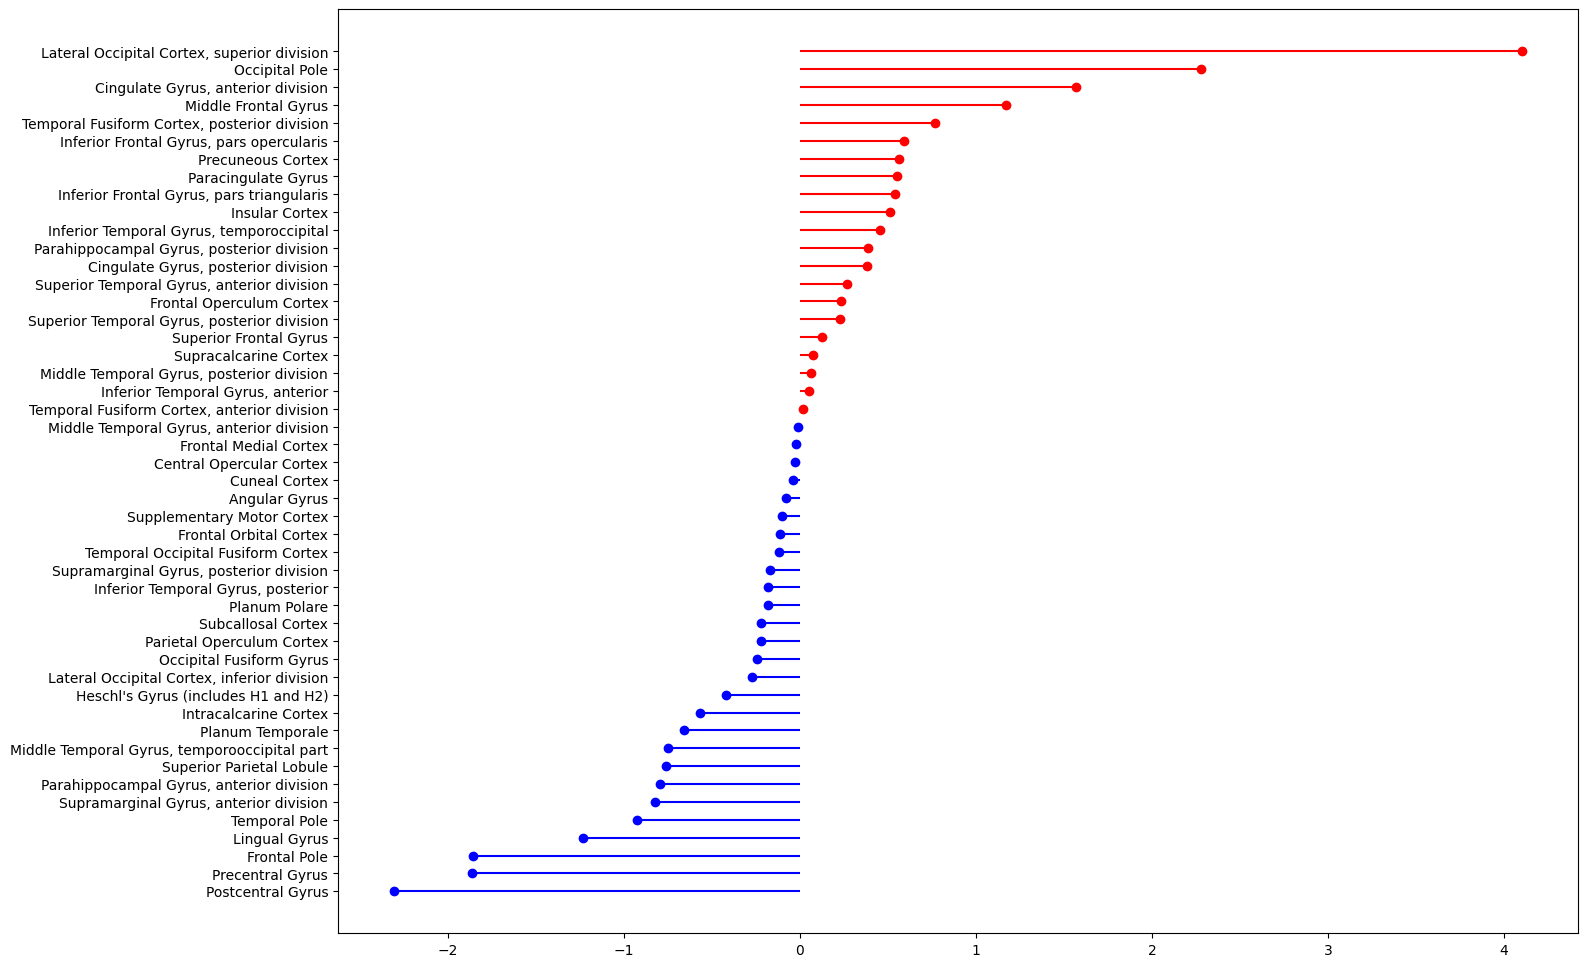

In [154]:
figure_coefficients = plt.figure(figsize=(16, 12))
threshold_plot = 0
for region in range(48):
    if sorted_jbdata['std_coef'].iloc[region] > threshold_plot:
        color_line = 'red'
        plt.hlines(y=sorted_jbdata['oxf_region'].iloc[region], xmin=0, xmax=sorted_jbdata['std_coef'].iloc[region],
                   colors=color_line)
        plt.scatter(x=sorted_jbdata['std_coef'].iloc[region], y=sorted_jbdata['oxf_region'].iloc[region],
                    color=color_line)
    elif sorted_jbdata['std_coef'].iloc[region] < - threshold_plot:
        color_line = 'blue'
        plt.hlines(y=sorted_jbdata['oxf_region'].iloc[region], xmin=0, xmax=sorted_jbdata['std_coef'].iloc[region],
                   colors=color_line)
        plt.scatter(x=sorted_jbdata['std_coef'].iloc[region], y=sorted_jbdata['oxf_region'].iloc[region],
                    color=color_line)
    #plt.gca().set_yticklabels(gm.loc[0].index[1:49])

In [155]:
#jet_brain_im_data = mask_data
std_jet_brain_im_data = np.zeros(mask_data.shape)
for x in range(mask_data.shape[0]):
    for y in range(mask_data.shape[1]):
        for z in range(mask_data.shape[2]):
            if mask_data[x, y, z] == 0:
                0
            else:
                std_jet_brain_im_data[x, y, z] = jet_brain_data1[jet_brain_data1['n. area'] == mask_data[x, y, z]][
                    'std_coef'].values

<ipython-input-155-9c5d25781a66>:9: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



In [156]:
import nibabel as nib


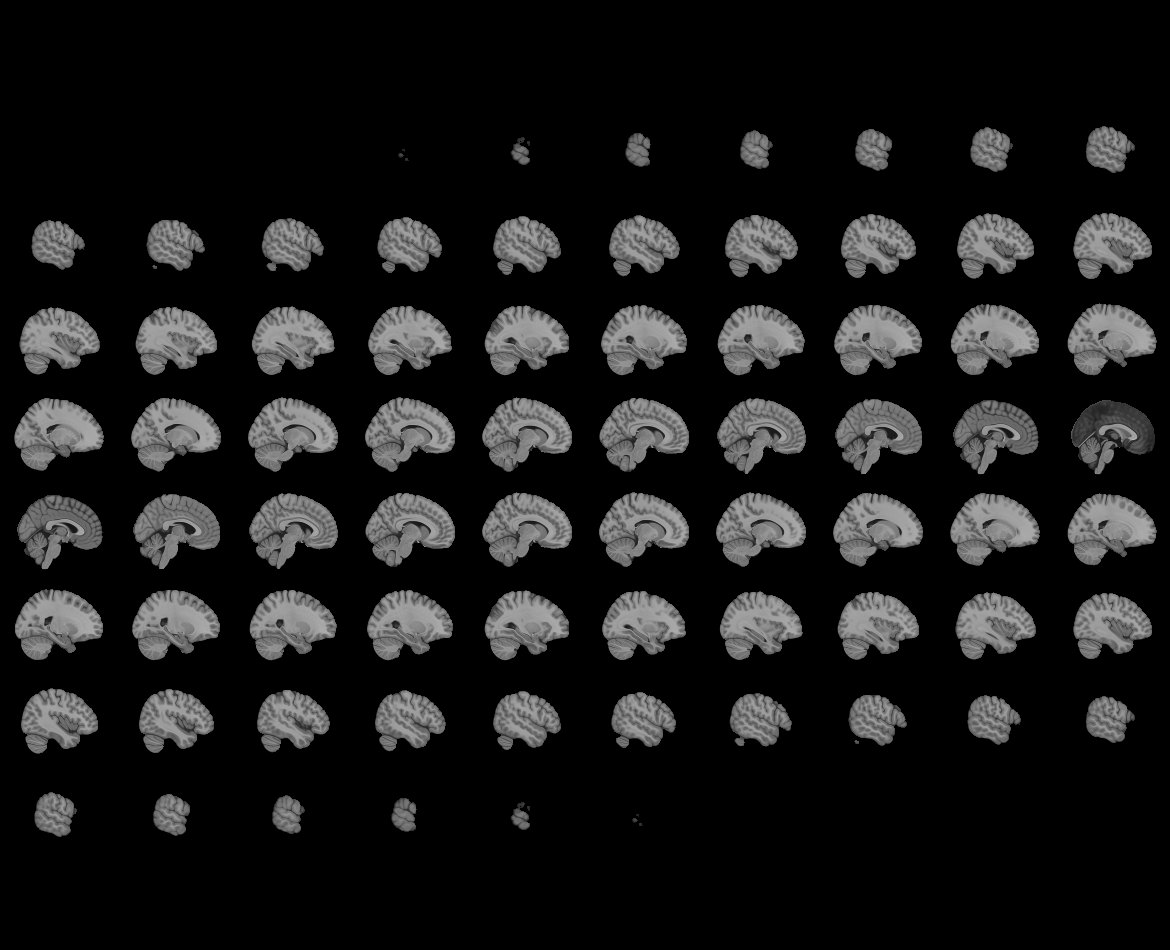
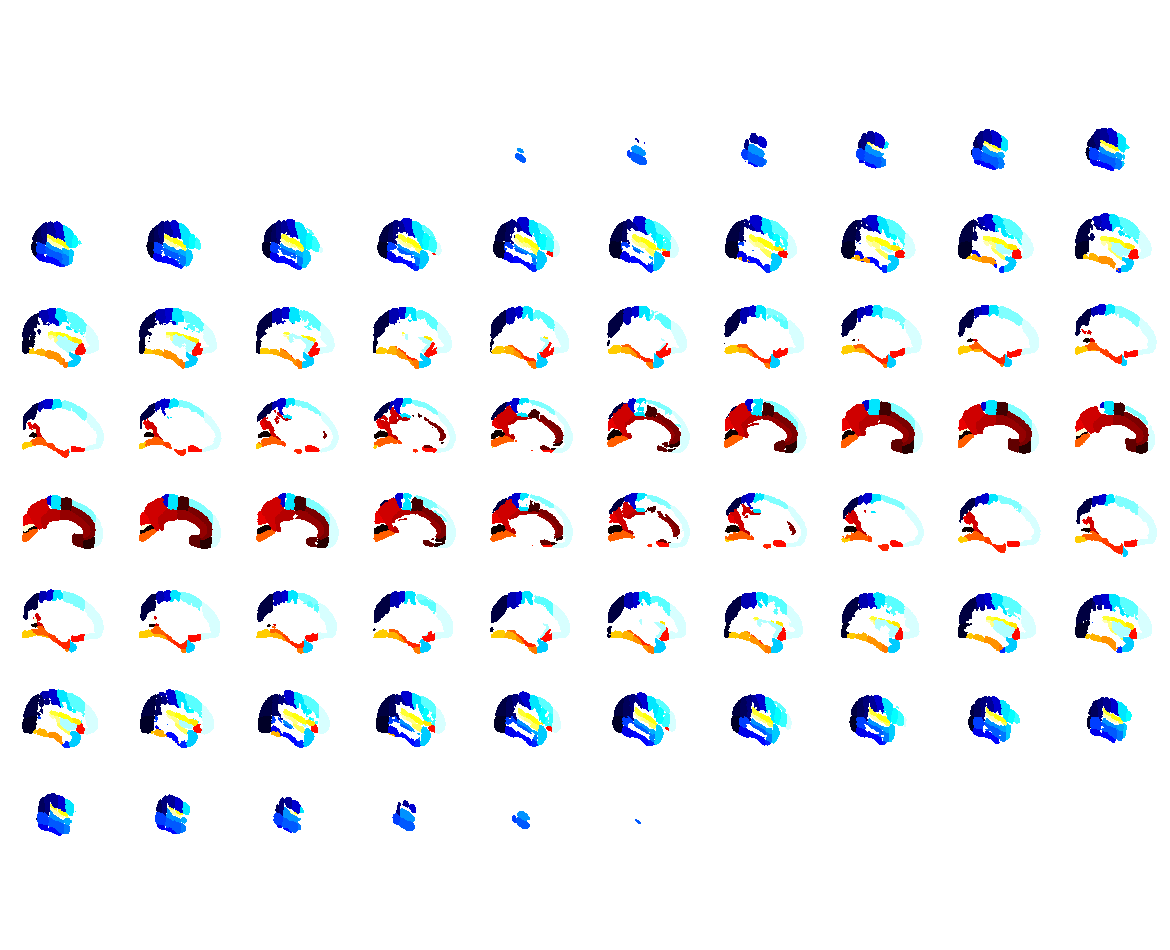

In [157]:
plotting.view_img(mask, black_bg=True, symmetric_cmap=False)

In [158]:
std_jb_img = nib.Nifti2Image(std_jet_brain_im_data, affine=mask.affine)
threshold_jet_brain = 1.5

Below some libraries that help create customized color maps have been imported

In [159]:
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap

In [160]:
colors = [(0, 1, 1),  # Yellow for lowest negative values
          (0, 0, 0.6),  # Red for low values
          (1, 0.25, 0),  # Dark blue for high values
          (1, 1, 0)]  # Light blue for highest values
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=100)


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:771: UserWarning:





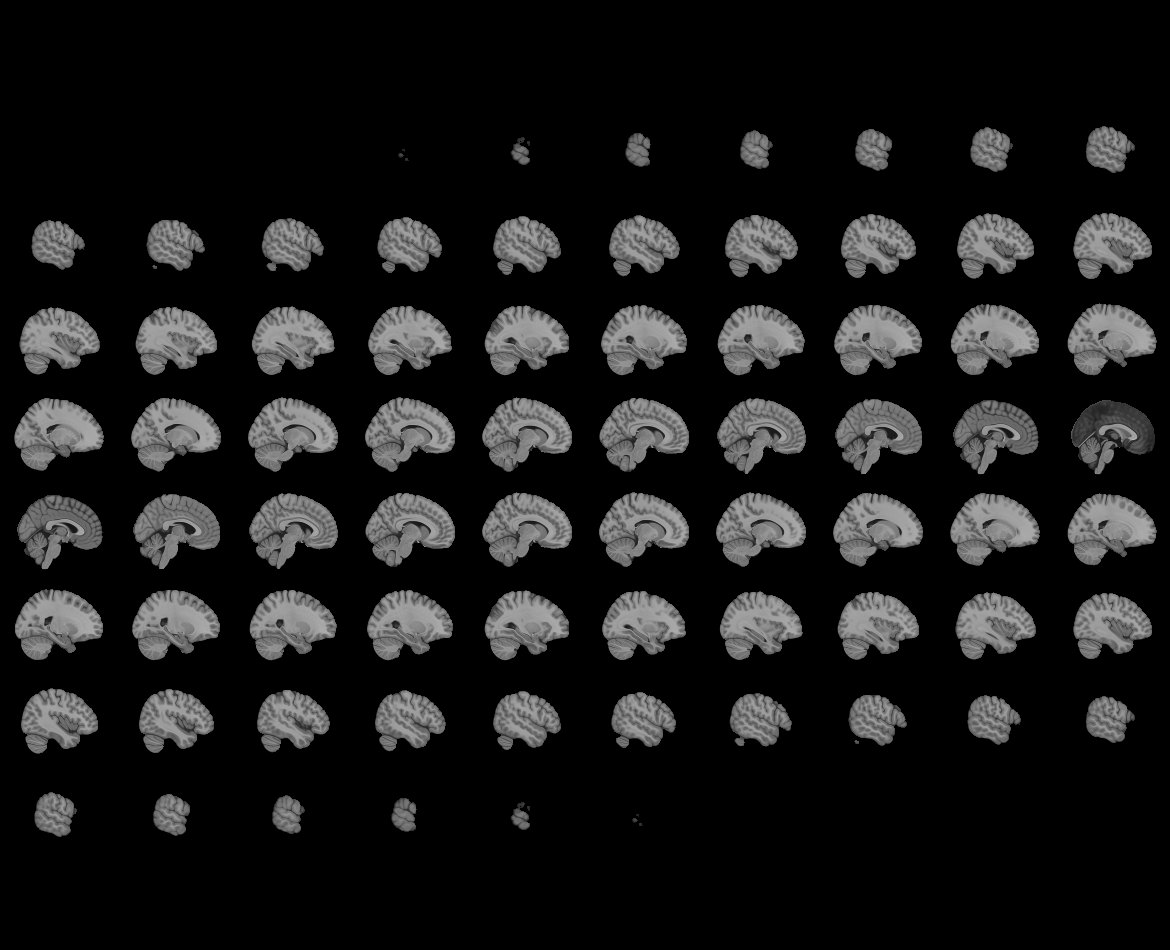
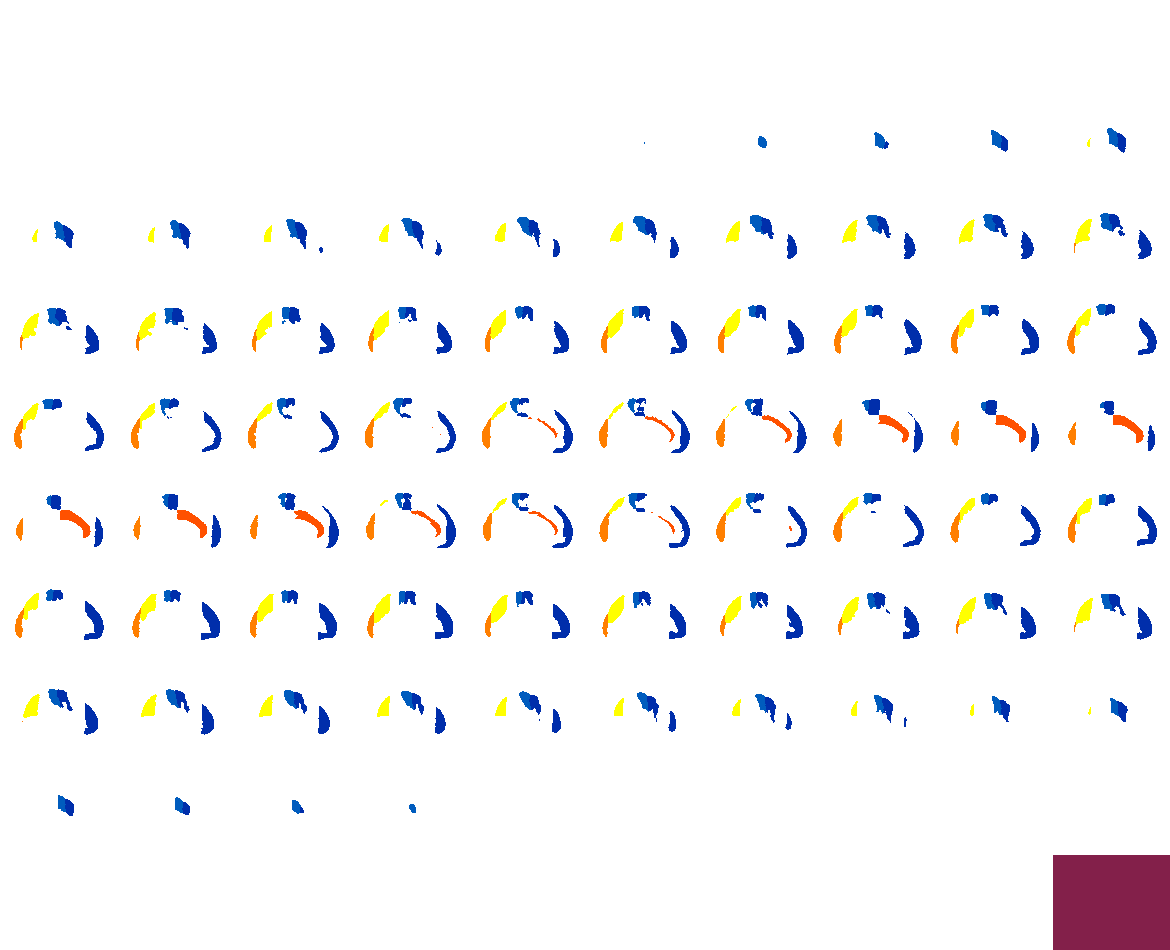

In [161]:
plotting.view_img(std_jb_img, draw_cross=False, threshold=threshold_jet_brain, cut_coords=(2, 16, 18), cmap=custom_cmap)

In [162]:
from nilearn import surface

red to yellow (max) e blue light blue(max)
- standardizzazione con e senza sottrazione media

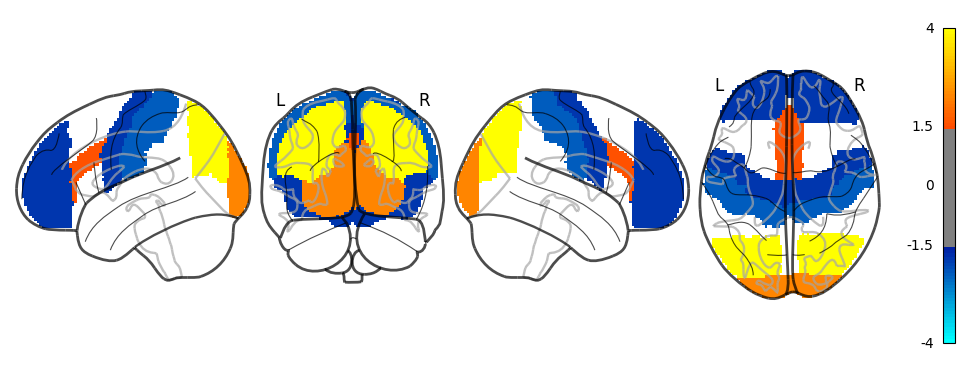

In [163]:
plotting.plot_glass_brain(std_jb_img, plot_abs=False, threshold=threshold_jet_brain, display_mode='lyrz', colorbar=True,
                          vmax=4, cmap=custom_cmap)

In [164]:
regions = [
    "Frontal Pole",
    "Insular Cortex",
    "Superior Frontal Gyrus",
    "Middle Frontal Gyrus",
    "Inferior Frontal Gyrus, pars triangularis",
    "Inferior Frontal Gyrus, pars opercularis",
    "Precentral Gyrus",
    "Temporal Pole",
    "Superior Temporal Gyrus, anterior division",
    "Superior Temporal Gyrus, posterior division",
    "Middle Temporal Gyrus, anterior division",
    "Middle Temporal Gyrus, posterior division",
    "Middle Temporal Gyrus, temporooccipital part",
    "Inferior Temporal Gyrus, anterior",
    "Inferior Temporal Gyrus, posterior",
    "Inferior Temporal Gyrus, temporoccipital",
    "Postcentral Gyrus",
    "Superior Parietal Lobule",
    "Supramarginal Gyrus, anterior division",
    "Supramarginal Gyrus, posterior division",
    "Angular Gyrus",
    "Lateral Occipital Cortex, superior division",
    "Lateral Occipital Cortex, inferior division",
    "Intracalcarine Cortex",
    "Frontal Medial Cortex",
    "Juxtapositional Lobule Cortex (formerly Supplementary Motor Cortex)",
    "Subcallosal Cortex",
    "Paracingulate Gyrus",
    "Cingulate Gyrus, anterior division",
    "Cingulate Gyrus, posterior division",
    "Precuneous Cortex",
    "Cuneal Cortex",
    "Frontal Orbital Cortex",
    "Parahippocampal Gyrus, anterior division",
    "Parahippocampal Gyrus, posterior division",
    "Lingual Gyrus",
    "Temporal Fusiform Cortex, anterior division",
    "Temporal Fusiform Cortex, posterior division",
    "Temporal Occipital Fusiform Cortex",
    "Occipital Fusiform Gyrus",
    "Frontal Operculum Cortex",
    "Central Opercular Cortex",
    "Parietal Operculum Cortex",
    "Planum Polare",
    "Heschl's Gyrus (includes H1 and H2)",
    "Planum Temporale",
    "Supracalcarine Cortex",
    "Occipital Pole"
]